In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ocean-multiyear-monthly/cmems_mod_glo_phy_my_0.083deg_P1M-m_1760851146011.nc


In [2]:
!pip install xarray netCDF4
import xarray as xr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 39.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00


In [3]:
ds = xr.open_dataset("/kaggle/input/ocean-multiyear-monthly/cmems_mod_glo_phy_my_0.083deg_P1M-m_1760851146011.nc")
ds


<xarray.Dataset> Size: 705MB
Dimensions:    (time: 289, depth: 1, latitude: 121, longitude: 840)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1993-06-01 1993-07-01 ... 2017-06-01
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 484B -5.0 -4.917 -4.833 ... 4.833 4.917 5.0
  * longitude  (longitude) float32 3kB 170.0 170.1 170.2 ... 239.8 239.8 239.9
Data variables:
    so         (time, depth, latitude, longitude) float32 117MB ...
    thetao     (time, depth, latitude, longitude) float32 117MB ...
    uo         (time, depth, latitude, longitude) float32 117MB ...
    vo         (time, depth, latitude, longitude) float32 117MB ...
    zos        (time, latitude, longitude) float32 117MB ...
    mlotst     (time, latitude, longitude) float32 117MB ...
Attributes:
    Conventions:       CF-1.11
    title:             Monthly mean fields for product GLOBAL_REANALYSIS_PHY_...
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MERCATOR GLORYS12V1
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId:  cmems_mod_glo_phy_my_0.083deg_P1M-m_202311
    subset:date:       2025-10-19T05:19:06.012Z

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


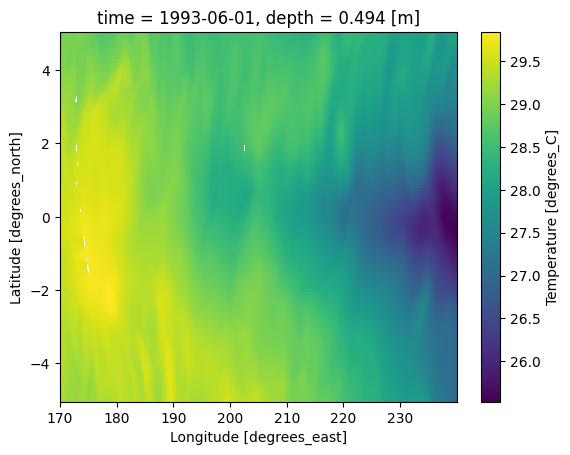

In [4]:
ds['thetao'].isel(time=0).plot()


<xarray.Dataset> Size: 705MB
Dimensions:    (time: 289, depth: 1, latitude: 121, longitude: 840)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1993-06-01 1993-07-01 ... 2017-06-01
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 484B -5.0 -4.917 -4.833 ... 4.833 4.917 5.0
  * longitude  (longitude) float32 3kB 170.0 170.1 170.2 ... 239.8 239.8 239.9
Data variables:
    so         (time, depth, latitude, longitude) float32 117MB ...
    thetao     (time, depth, latitude, longitude) float32 117MB ...
    uo         (time, depth, latitude, longitude) float32 117MB ...
    vo         (time, depth, latitude, longitude) float32 117MB ...
    zos        (time, latitude, longitude) float32 117MB ...
    mlotst     (time, latitude, longitude) float32 117MB ...
Attributes:
    Conventions:       CF-1.11
    title:             Monthly mean fields for product GLOBAL_REANALYSIS_PHY_...
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monit

time        SST   Salinity  U_current  V_current        MLD       SSH  \
0 1993-06-01  28.473896  34.938549  -0.161709   0.006723  22.157427  0.430207   
1 1993-07-01  28.166559  34.962738  -0.261115   0.005902  27.439920  0.452897   
2 1993-08-01  27.818949  34.945965  -0.355853   0.007545  23.743986  0.475068   
3 1993-09-01  27.936163  34.951199  -0.329436   0.006236  22.317791  0.504058   
4 1993-10-01  27.818584  34.935638  -0.339451   0.024115  22.825504  0.505919   

   SST_scaled  Salinity_scaled  U_current_scaled  V_current_scaled  \
0    0.969162        -0.564964          0.621627         -0.452228   
1    0.623106        -0.421922          0.066545         -0.518994   
2    0.231704        -0.521111         -0.462474         -0.385449   
3    0.363685        -0.490161         -0.314962         -0.491825   
4    0.231293        -0.582176         -0.370883          0.960619   

   MLD_scaled  SSH_scaled  
0   -0.534303   -0.809219  
1    0.401380   -0.458315  
2   -0.253277   -0.115415  
3   -0.505898    0.332922  
4   -0.415967    0.361710

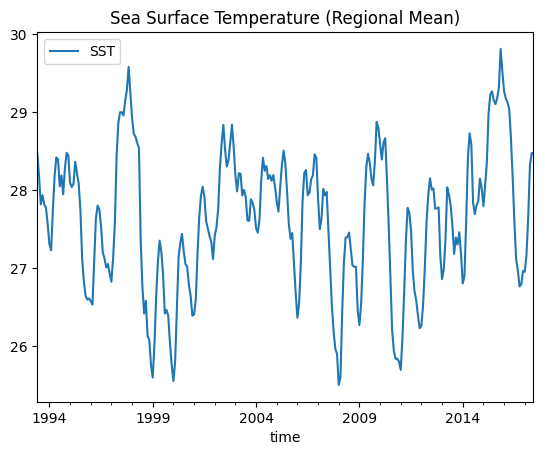

In [5]:
# --- STEP 0: Import required libraries ---
import xarray as xr
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- STEP 1: Load the dataset ---
# You’ve already done this:
ds = xr.open_dataset("/kaggle/input/ocean-multiyear-monthly/cmems_mod_glo_phy_my_0.083deg_P1M-m_1760851146011.nc")

# --- STEP 2: Inspect metadata ---
print(ds)

# Variables of interest: 'thetao', 'so', 'uo', 'vo', 'mlotst', 'zos'
# Coordinates: 'latitude', 'longitude', 'depth', 'time'

# --- STEP 3: Subset region, depth, and time ---
# Select latitude (-5° to +5°), longitude (170°E–240°E), depth = surface (~0.49 m)
# --- STEP 3: Subset region, depth, and time (fixed version) ---
subset = ds.sel(latitude=slice(-5, 5), longitude=slice(170, 240))
subset = subset.isel(depth=0)  # pick surface layer

# Optional: restrict time
subset = subset.sel(time=slice("1993-06-01", "2017-06-01"))

# Optional: Limit time range to reduce size
subset = subset.sel(time=slice("1993-06-01", "2017-06-01"))




# --- STEP 4: Select only required variables ---
vars_keep = ["thetao", "so", "uo", "vo", "mlotst", "zos"]
subset = subset[vars_keep]

# --- STEP 5: Compute regional mean (area-averaged time series) ---
# Average spatially across lat and lon for each month
regional_mean = subset.mean(dim=["latitude", "longitude"], skipna=True)

# --- STEP 6: Convert to pandas DataFrame ---
df = regional_mean.to_dataframe().reset_index()

# --- STEP 7: Drop unused columns ---
df = df[["time"] + vars_keep]

# --- STEP 8: Handle missing values ---
df = df.dropna()

# --- STEP 9: Rename columns for clarity ---
df.rename(columns={
    "thetao": "SST",
    "so": "Salinity",
    "uo": "U_current",
    "vo": "V_current",
    "mlotst": "MLD",
    "zos": "SSH"
}, inplace=True)

# --- STEP 10: Optional - Basic visualization sanity check ---
df.plot(x="time", y="SST", title="Sea Surface Temperature (Regional Mean)")

# --- STEP 11: Detrending / Standardization Preparation ---
# We’ll keep both raw and standardized versions
features = ["SST", "Salinity", "U_current", "V_current", "MLD", "SSH"]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled_values, columns=[f"{c}_scaled" for c in features])
df = pd.concat([df.reset_index(drop=True), df_scaled], axis=1)

# --- STEP 12: Save clean dataset (for feature engineering) ---
df.to_csv("/kaggle/working/ocean_preprocessed.csv", index=False)

print("Preprocessing complete!")
print("Shape:", df.shape)
df.head()


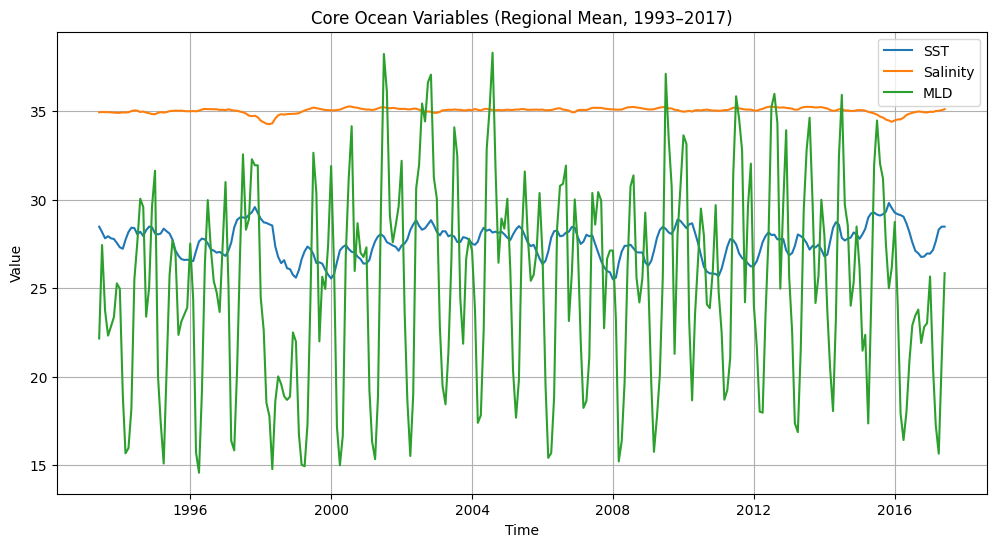

Missing values per column:
 time                0
SST                 0
Salinity            0
U_current           0
V_current           0
MLD                 0
SSH                 0
SST_scaled          0
Salinity_scaled     0
U_current_scaled    0
V_current_scaled    0
MLD_scaled          0
SSH_scaled          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


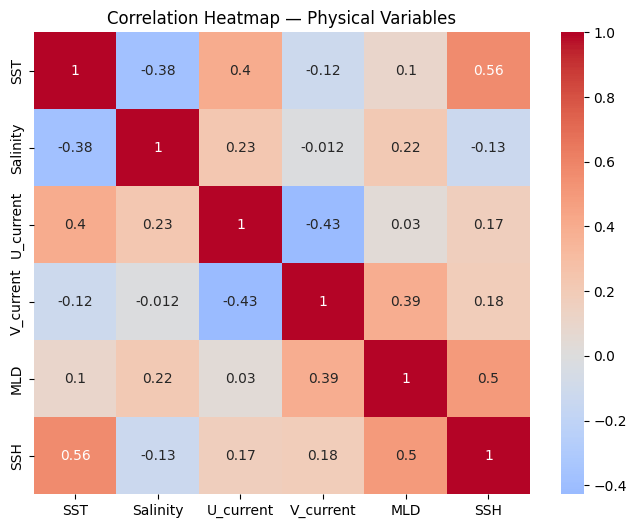

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

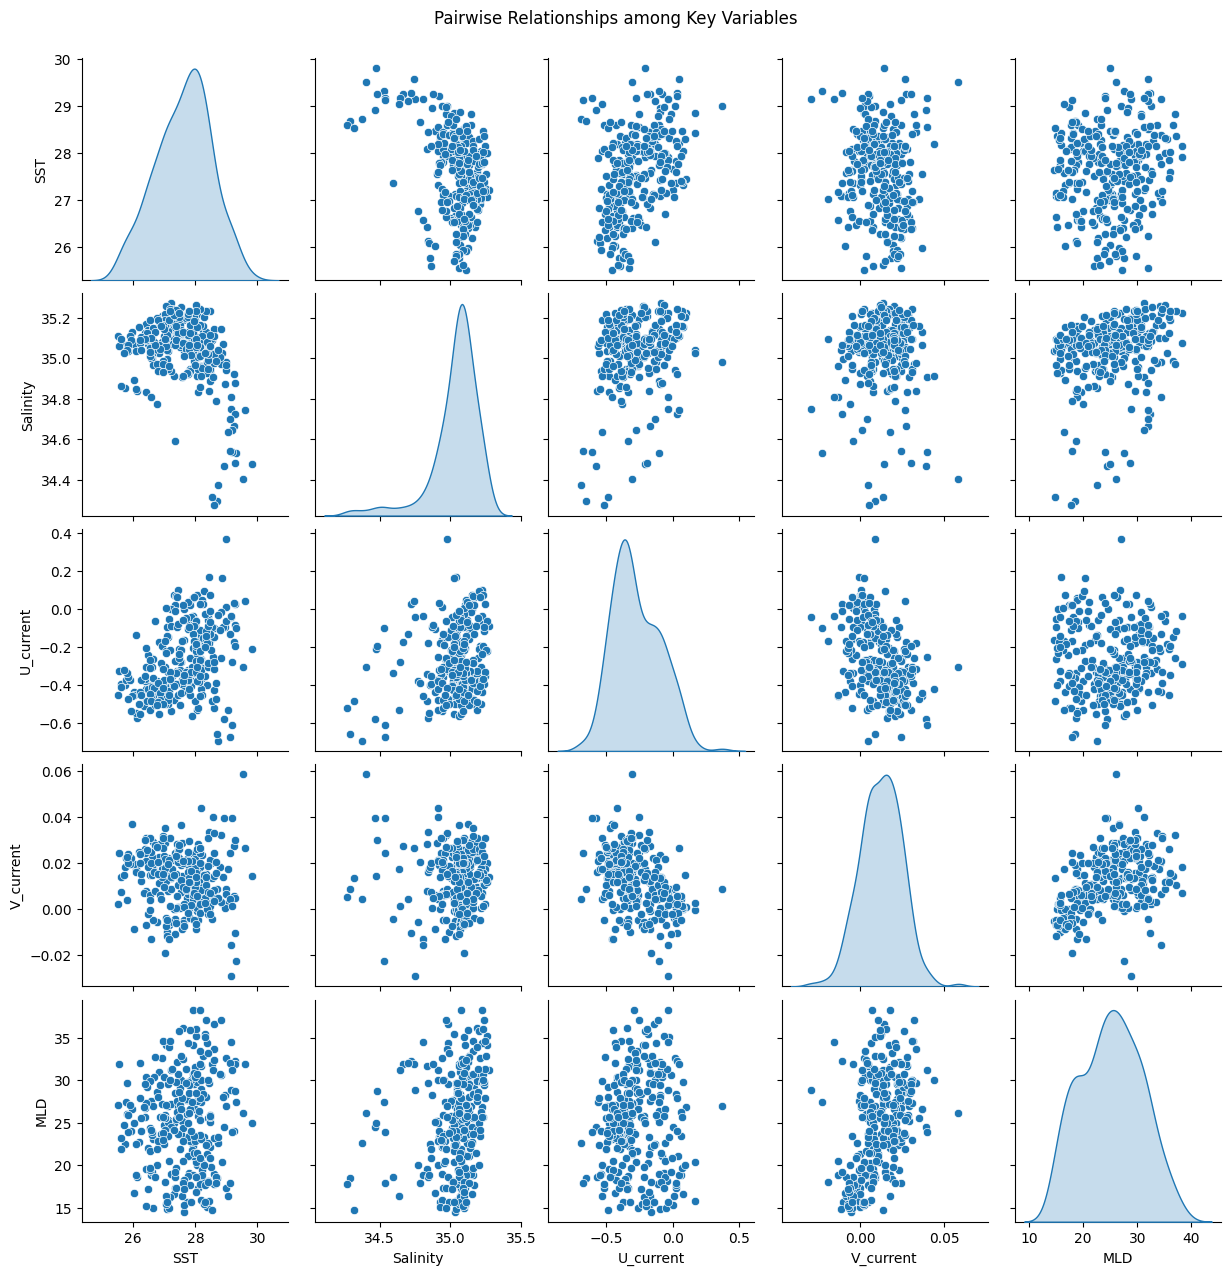

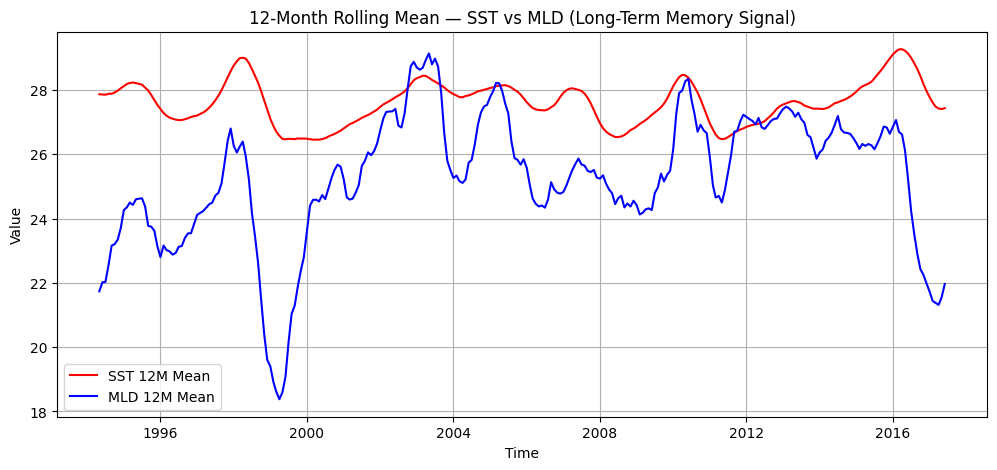

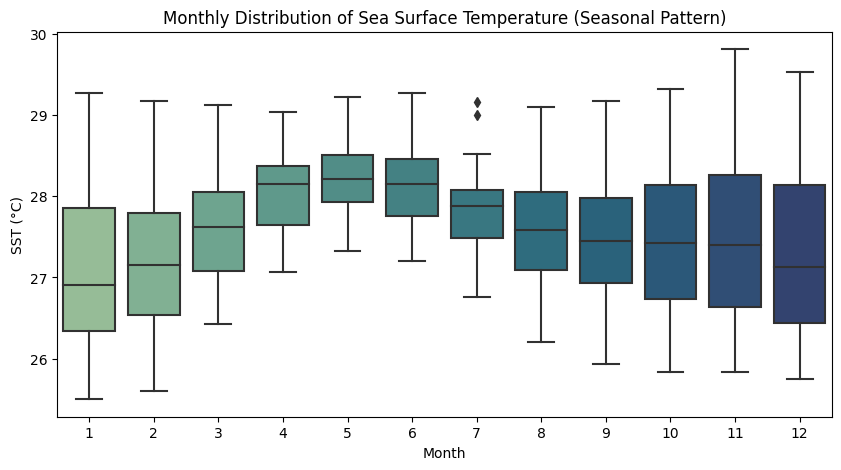

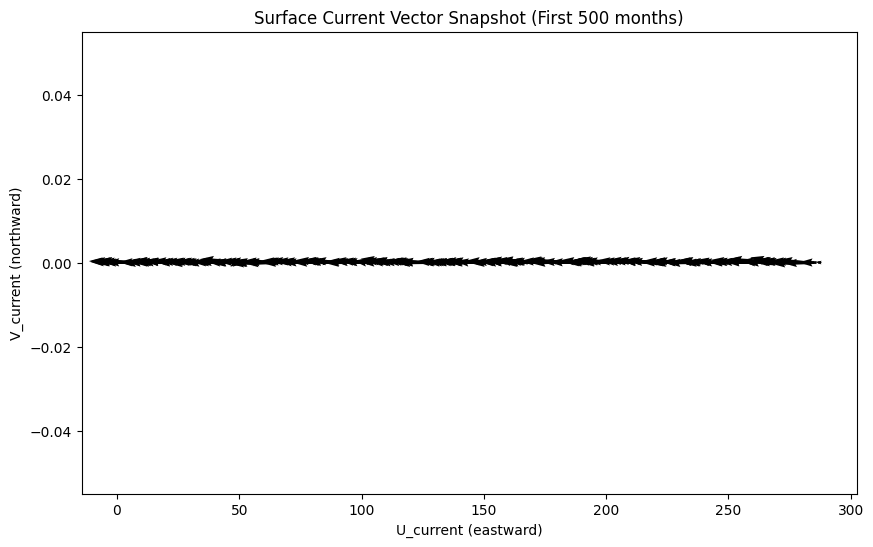

✅ Visualization complete — dataset looks ready for feature engineering!


In [6]:
# --- VISUALIZATION SECTION: Quick EDA before feature engineering ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming your preprocessed dataframe is named `df`
# and includes: time, SST, Salinity, U_current, V_current, MLD, SSH

# Make sure time is datetime type
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# --- 1️⃣ Time Series Plots for Core Variables ---
plt.figure(figsize=(12, 6))
for var in ["SST", "Salinity", "MLD"]:
    plt.plot(df["time"], df[var], label=var)
plt.title("Core Ocean Variables (Regional Mean, 1993–2017)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# --- 2️⃣ Check for missing values ---
print("Missing values per column:\n", df.isna().sum())

# --- 3️⃣ Correlation Heatmap ---
plt.figure(figsize=(8, 6))
corr = df[["SST", "Salinity", "U_current", "V_current", "MLD", "SSH"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Physical Variables")
plt.show()

# --- 4️⃣ Scatter Relationships (Pairplot) ---
sns.pairplot(df[["SST", "Salinity", "U_current", "V_current", "MLD"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships among Key Variables", y=1.02)
plt.show()

# --- 5️⃣ Rolling Mean Visualization (detect memory signals) ---
window = 12  # 12 months = 1 year
plt.figure(figsize=(12, 5))
plt.plot(df["time"], df["SST"].rolling(window).mean(), label="SST 12M Mean", color='r')
plt.plot(df["time"], df["MLD"].rolling(window).mean(), label="MLD 12M Mean", color='b')
plt.title("12-Month Rolling Mean — SST vs MLD (Long-Term Memory Signal)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# --- 6️⃣ Seasonal Pattern Check (if you suspect seasonality) ---
df["month"] = df["time"].dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(x="month", y="SST", data=df, palette="crest")
plt.title("Monthly Distribution of Sea Surface Temperature (Seasonal Pattern)")
plt.xlabel("Month")
plt.ylabel("SST (°C)")
plt.show()

# --- 7️⃣ Current Vectors Visualization (Optional Quick Check) ---
plt.figure(figsize=(10, 6))
plt.quiver(df["U_current"][:500], df["V_current"][:500])
plt.title("Surface Current Vector Snapshot (First 500 months)")
plt.xlabel("U_current (eastward)")
plt.ylabel("V_current (northward)")
plt.show()

print("✅ Visualization complete — dataset looks ready for feature engineering!")


✅ Feature engineering complete!
Final shape: (283, 22)
Features: 22

Sample columns:
 ['SST', 'Salinity', 'MLD', 'SSH', 'SST_anom', 'Salinity_anom', 'MLD_anom', 'ΔSST', 'ΔSSS', 'ΔMLD', 'SST_lag1', 'SST_lag3', 'SST_rollmean_3', 'SST_rollstd_3', 'Current_speed', 'Kinetic_energy', 'Zonal_heat_flux', 'Meridional_heat_flux', 'Mixing_index', 'SSTxSSS', 'Thermal_expansion_proxy', 'SST_autocorr6']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


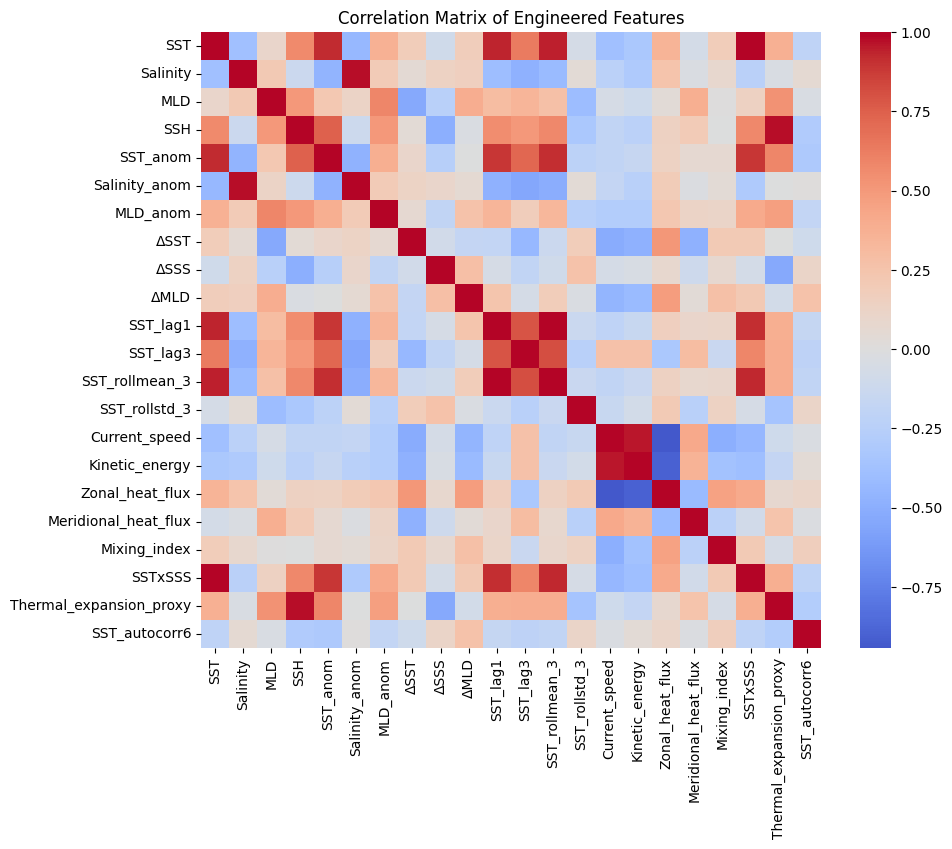

📁 Saved file: /kaggle/working/ocean_features.csv


In [7]:
# ===========================================================
# FEATURE ENGINEERING PIPELINE: Ocean Memory Project
# From preprocessed df → rich ML-ready dataset (~20 attributes)
# ===========================================================

import pandas as pd
import numpy as np

# Ensure time is datetime and sorted
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time').reset_index(drop=True)

# --- 1️⃣ Compute Monthly Anomalies (Remove Seasonal Cycle) ---
# Group by month and subtract climatological mean
df['month'] = df['time'].dt.month
for var in ['SST', 'Salinity', 'MLD', 'SSH']:
    clim_mean = df.groupby('month')[var].transform('mean')
    df[f'{var}_anom'] = df[var] - clim_mean

# --- 2️⃣ Compute Temporal Derivatives (Month-to-Month Change) ---
df['ΔSST'] = df['SST'].diff()
df['ΔSSS'] = df['Salinity'].diff()
df['ΔMLD'] = df['MLD'].diff()

# --- 3️⃣ Lag Features (Memory Signals) ---
# Lags of SST — key for persistence modeling
df['SST_lag1'] = df['SST'].shift(1)
df['SST_lag3'] = df['SST'].shift(3)

# Optional: Lags of MLD or SSH (can reveal delayed coupling)
df['MLD_lag1'] = df['MLD'].shift(1)
df['SSH_lag1'] = df['SSH'].shift(1)

# --- 4️⃣ Rolling Statistical Features ---
# 3-month rolling mean and std — smooths noise, tracks short-term persistence
df['SST_rollmean_3'] = df['SST'].rolling(window=3).mean()
df['SST_rollstd_3'] = df['SST'].rolling(window=3).std()
df['MLD_rollmean_3'] = df['MLD'].rolling(window=3).mean()

# --- 5️⃣ Compute Current-based Dynamic Features ---
df['Current_speed'] = np.sqrt(df['U_current']**2 + df['V_current']**2)
df['Kinetic_energy'] = 0.5 * (df['U_current']**2 + df['V_current']**2)
df['Zonal_heat_flux'] = df['U_current'] * df['SST']
df['Meridional_heat_flux'] = df['V_current'] * df['SST']

# --- 6️⃣ Physical Coupling & Interaction Terms ---
df['Mixing_index'] = df['MLD'] / (df['Current_speed'] + 1e-6)   # avoid division by zero
df['SSTxSSS'] = df['SST'] * df['Salinity']
df['Thermal_expansion_proxy'] = df['SSH'] / (df['SST'] + 1e-6)

# --- 7️⃣ Autocorrelation Proxy (Lag-1 Memory) ---
# rolling correlation between SST and its lag1 over 6 months
df['SST_autocorr6'] = df['SST'].rolling(6).apply(lambda x: x.autocorr(), raw=False)

# --- 8️⃣ Target Variable Construction (Predict Future SST) ---
# Shift SST by -1 month → target is SST at t+1
df['SST_next'] = df['SST'].shift(-1)

# --- 9️⃣ Drop rows with NaNs created by shifting/rolling ---
df = df.dropna().reset_index(drop=True)

# --- 10️⃣ Final feature selection for modeling ---
feature_cols = [
    'SST', 'Salinity', 'MLD', 'SSH',
    'SST_anom', 'Salinity_anom', 'MLD_anom',
    'ΔSST', 'ΔSSS', 'ΔMLD',
    'SST_lag1', 'SST_lag3', 'SST_rollmean_3', 'SST_rollstd_3',
    'Current_speed', 'Kinetic_energy', 'Zonal_heat_flux', 'Meridional_heat_flux',
    'Mixing_index', 'SSTxSSS', 'Thermal_expansion_proxy', 'SST_autocorr6'
]

target_col = 'SST_next'

# --- 11️⃣ Create final dataset ---
X = df[feature_cols]
y = df[target_col]

print("✅ Feature engineering complete!")
print("Final shape:", X.shape)
print("Features:", len(feature_cols))
print("\nSample columns:\n", X.columns.tolist())

# --- 12️⃣ Optional quick correlation sanity check ---
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Engineered Features")
plt.show()

# Save ready-to-train dataset
df_out = pd.concat([df[['time']], X, y], axis=1)
df_out.to_csv("/kaggle/working/ocean_features.csv", index=False)
print("📁 Saved file: /kaggle/working/ocean_features.csv")


start

📊 Validating Feature Set (10 features): ['SST_lag1', 'SST_anom', 'MLD_anom', 'SSH', 'SST_rollstd_3', 'ΔMLD', 'Current_speed', 'Meridional_heat_flux', 'Salinity_anom', 'Thermal_expansion_proxy']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


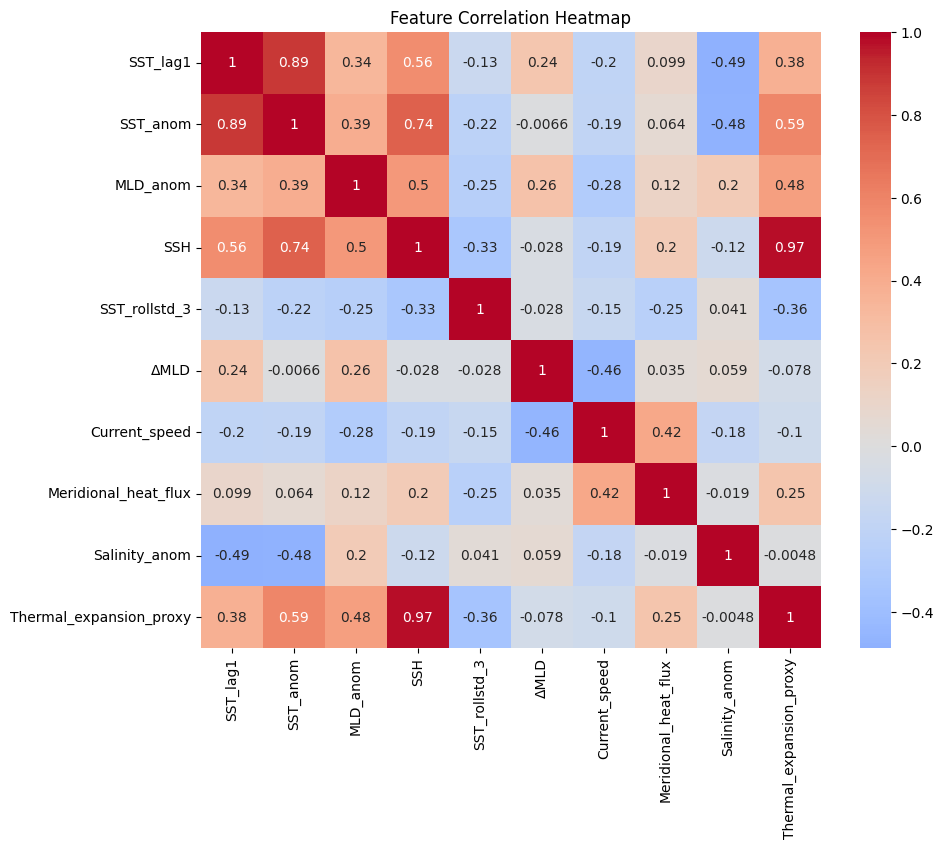


📈 Variance Inflation Factor (VIF):
                   Feature           VIF
3                      SSH  22001.818025
9  Thermal_expansion_proxy  19973.530070
0                 SST_lag1    231.839660
1                 SST_anom     23.435476
6            Current_speed     12.536181
4            SST_rollstd_3      4.388861
7     Meridional_heat_flux      3.094071
8            Salinity_anom      2.065280
5                     ΔMLD      1.833757
2                 MLD_anom      1.792747

🌲 Random Forest Feature Importance:
                   Feature  Importance
1                 SST_anom    0.808958
6            Current_speed    0.064469
0                 SST_lag1    0.046762
7     Meridional_heat_flux    0.035091
4            SST_rollstd_3    0.014829
3                      SSH    0.007415
8            Salinity_anom    0.006721
9  Thermal_expansion_proxy    0.006564
5                     ΔMLD    0.005627
2                 MLD_anom    0.003564


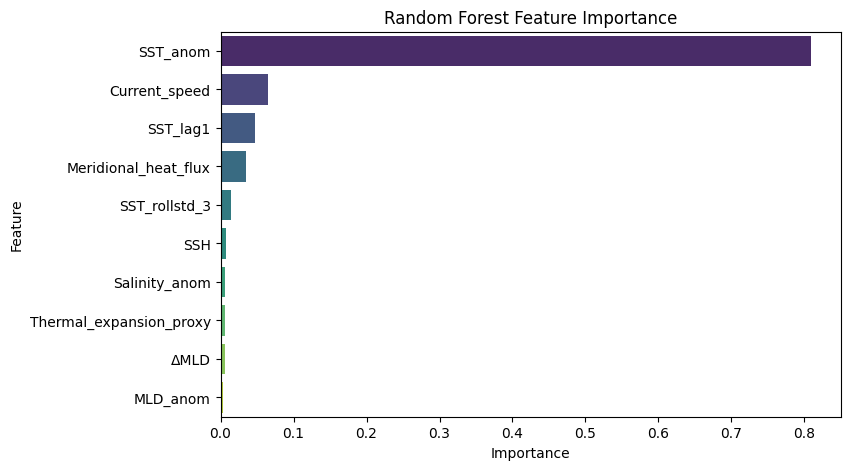


📊 Validating Feature Set (10 features): ['SST_anom', 'SST_lag1', 'MLD_anom', 'ΔMLD', 'SSH_anom', 'SST_rollmean_3', 'Current_speed', 'Mixing_index', 'Meridional_heat_flux', 'SST_autocorr6']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


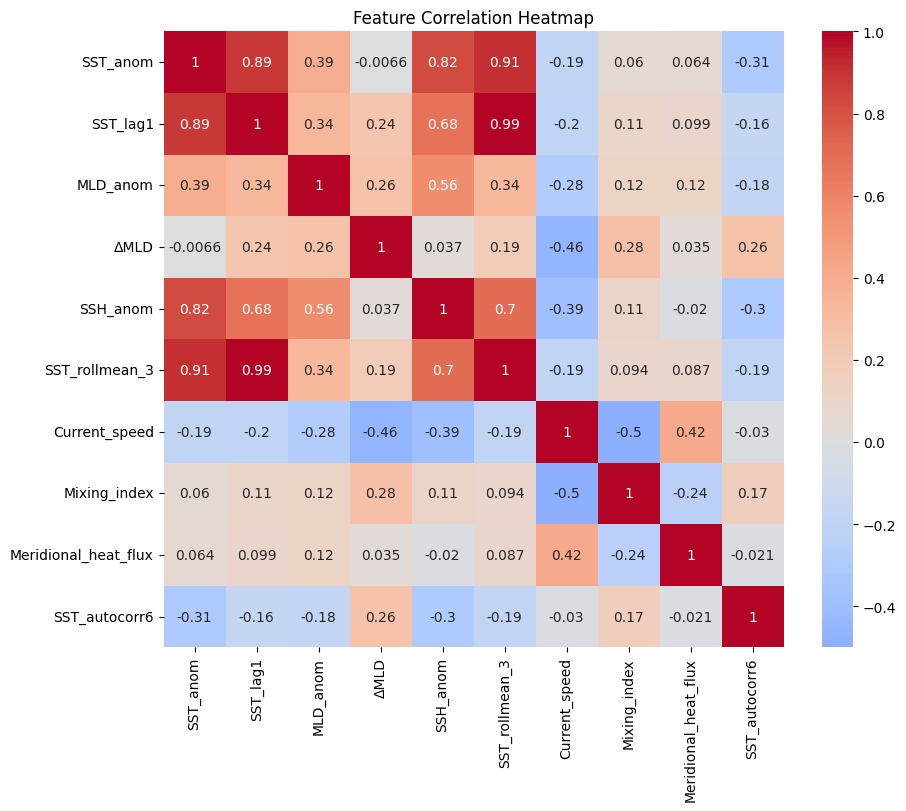


📈 Variance Inflation Factor (VIF):
                Feature            VIF
1              SST_lag1  111979.627063
5        SST_rollmean_3  111756.101037
6         Current_speed      11.163354
4              SSH_anom       4.918323
9         SST_autocorr6       4.668746
0              SST_anom       3.513114
8  Meridional_heat_flux       2.841873
3                  ΔMLD       2.140930
7          Mixing_index       1.713947
2              MLD_anom       1.688343

🌲 Random Forest Feature Importance:
                Feature  Importance
0              SST_anom    0.758104
4              SSH_anom    0.086525
6         Current_speed    0.050308
8  Meridional_heat_flux    0.040328
5        SST_rollmean_3    0.028664
1              SST_lag1    0.017125
3                  ΔMLD    0.005867
9         SST_autocorr6    0.005453
2              MLD_anom    0.004370
7          Mixing_index    0.003256


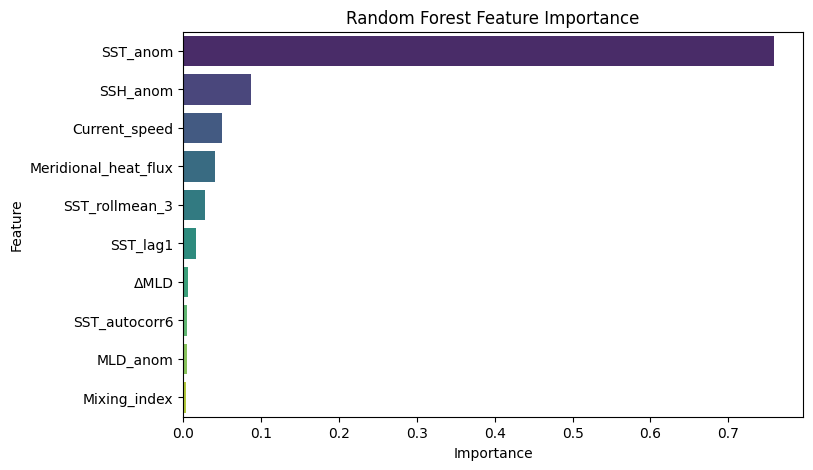

In [8]:
# ==========================================================
# FEATURE VALIDATION PIPELINE
# Run this for each feature set (physics-driven vs data-driven)
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("start")
# ----------------------------------------------------------
# 1️⃣ Define Your Two Feature Sets
# ----------------------------------------------------------

# --- A) Your manually selected (physics-informed) 10 features ---
physics_features = [
    'SST_lag1', 'SST_anom', 'MLD_anom', 'SSH', 'SST_rollstd_3',
    'ΔMLD', 'Current_speed', 'Meridional_heat_flux',
    'Salinity_anom', 'Thermal_expansion_proxy'
]

# --- B) My model-suggested 10 features (data/statistics balanced) ---
model_features = [
    'SST_anom', 'SST_lag1', 'MLD_anom', 'ΔMLD', 'SSH_anom',
    'SST_rollmean_3', 'Current_speed', 'Mixing_index',
    'Meridional_heat_flux', 'SST_autocorr6'
]

target_col = 'SST_next'

# ----------------------------------------------------------
# 2️⃣ Helper function to evaluate a feature set
# ----------------------------------------------------------

def validate_feature_set(df, features, target):
    print("\n" + "="*80)
    print(f"📊 Validating Feature Set ({len(features)} features): {features}")
    print("="*80)
    
    X = df[features].copy()
    y = df[target].copy()
    
    # --- (a) Correlation Heatmap ---
    plt.figure(figsize=(10,8))
    corr = X.corr()
    sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
    plt.title("Feature Correlation Heatmap")
    plt.show()
    
    # --- (b) Variance Inflation Factor (VIF) ---
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\n📈 Variance Inflation Factor (VIF):")
    print(vif_data.sort_values("VIF", ascending=False))
    
    # --- (c) Random Forest Feature Importance ---
    rf = RandomForestRegressor(
        n_estimators=300, max_depth=5, random_state=42
    )
    rf.fit(X, y)
    
    importances = pd.DataFrame({
        'Feature': features,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n🌲 Random Forest Feature Importance:")
    print(importances)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
    plt.title("Random Forest Feature Importance")
    plt.show()

# ----------------------------------------------------------
# 3️⃣ Run Validation for Each Feature Set
# ----------------------------------------------------------

validate_feature_set(df, physics_features, target_col)
validate_feature_set(df, model_features, target_col)


In [10]:
# ==========================================================
# FINAL CLEAN FEATURE SELECTION + EXPORT PIPELINE
# ==========================================================

import pandas as pd
import numpy as np

# --- Load engineered dataset ---
df = pd.read_csv("/kaggle/working/ocean_features.csv")
print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")

# --- Step 1: Normalize column names ---
df.columns = [col.strip() for col in df.columns]  # remove any accidental spaces

# If CMEMS uses 'zos' for SSH, rename it for consistency
if 'zos' in df.columns and 'SSH' not in df.columns:
    df.rename(columns={'zos': 'SSH'}, inplace=True)
    print("ℹ️ Renamed 'zos' → 'SSH'.")

# --- Step 2: Create SSH_anom if missing ---
if 'SSH' in df.columns and 'SSH_anom' not in df.columns:
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'], errors='coerce')
        monthly_means = df.groupby(df['time'].dt.month)['SSH'].transform('mean')
        df['SSH_anom'] = df['SSH'] - monthly_means
        print("✅ Created 'SSH_anom' from monthly SSH averages.")
    else:
        print("⚠️ 'time' column missing — cannot create SSH_anom. Using raw SSH instead.")
        df['SSH_anom'] = df['SSH']

# --- Step 3: Define final selected features ---
final_features = [
    'SST_anom',             # Long-term variability
    'SST_lag1',             # Persistence
    'MLD_anom',             # Deep memory
    'ΔMLD',                 # Seasonal transition
    'SSH_anom',             # Thermal expansion / energy storage
    'Current_speed',        # Flow intensity
    'Meridional_heat_flux', # Horizontal heat transfer
    'SST_rollstd_3',        # Variability / stability
    'Salinity_anom'         # (optional)
]

target_col = 'SST_next'

# --- Step 4: Verify column availability ---
missing_cols = [col for col in final_features if col not in df.columns]
if missing_cols:
    print(f"⚠️ Missing columns detected: {missing_cols}")
    print("These will be skipped for now.")
    final_features = [col for col in final_features if col in df.columns]

# --- Step 5: Filter dataset ---
X_final = df[final_features].copy()
y_final = df[target_col].copy() if target_col in df.columns else None

# --- Step 6: Drop missing values ---
X_final = X_final.replace([np.inf, -np.inf], np.nan).dropna()
if y_final is not None:
    y_final = y_final.loc[X_final.index]
else:
    print("⚠️ Target column not found — only feature matrix will be saved.")

# --- Step 7: Report summary ---
print("\n✅ Final Reduced Dataset Summary:")
print(f"Features: {X_final.shape[1]}")
print(f"Samples: {X_final.shape[0]}")
print("\nFeature Columns:", X_final.columns.tolist())

# --- Step 8: Save final dataset ---
if 'time' in df.columns:
    reduced_df = pd.concat([df[['time']].loc[X_final.index], X_final], axis=1)
else:
    reduced_df = X_final.copy()

if y_final is not None:
    reduced_df['SST_next'] = y_final

reduced_df.to_csv("/kaggle/working/ocean_final_features.csv", index=False)
print("\n📁 Saved clean file: /kaggle/working/ocean_final_features.csv")


✅ Loaded dataset with 283 rows and 24 columns.
✅ Created 'SSH_anom' from monthly SSH averages.

✅ Final Reduced Dataset Summary:
Features: 9
Samples: 283

Feature Columns: ['SST_anom', 'SST_lag1', 'MLD_anom', 'ΔMLD', 'SSH_anom', 'Current_speed', 'Meridional_heat_flux', 'SST_rollstd_3', 'Salinity_anom']

📁 Saved clean file: /kaggle/working/ocean_final_features.csv


In [11]:
df1=pd.read_csv("/kaggle/working/ocean_final_features.csv")
df1.head()

time  SST_anom   SST_lag1  MLD_anom      ΔMLD  SSH_anom  \
0  1993-11-01  0.275330  27.818584 -3.172573  0.548048 -0.015246   
1  1993-12-01  0.255749  27.777634 -3.173796  1.895456 -0.018656   
2  1994-01-01  0.205305  27.559284 -2.686201 -0.294107 -0.007762   
3  1994-02-01  0.051710  27.308958 -3.673233 -6.025942 -0.052468   
4  1994-03-01  0.161575  27.229492 -2.173164 -3.283535 -0.033796   

   Current_speed  Meridional_heat_flux  SST_rollstd_3  Salinity_anom  \
0       0.319207              0.523143       0.082293      -0.094696   
1       0.375980              0.793256       0.139398      -0.089493   
2       0.481347              0.575028       0.234520      -0.078346   
3       0.536867              0.463063       0.172115      -0.059475   
4       0.376081              0.123257       0.271600      -0.068443   

    SST_next  
0  27.559284  
1  27.308958  
2  27.229492  
3  27.734589  
4  28.176199

ℹ️ Plotting only SSH_anom (raw SSH not present in reduced dataset).


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


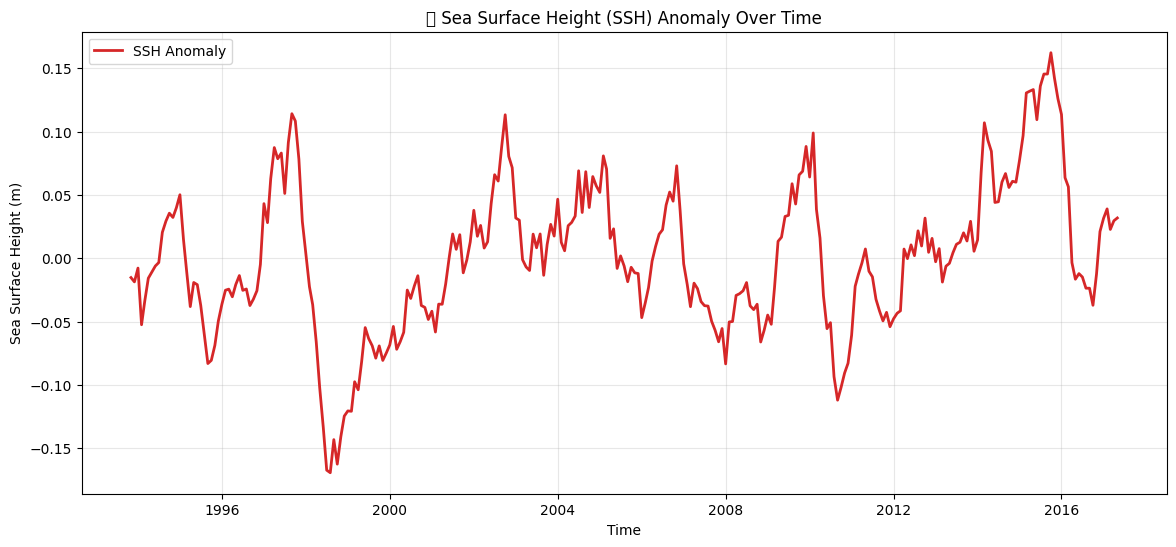

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


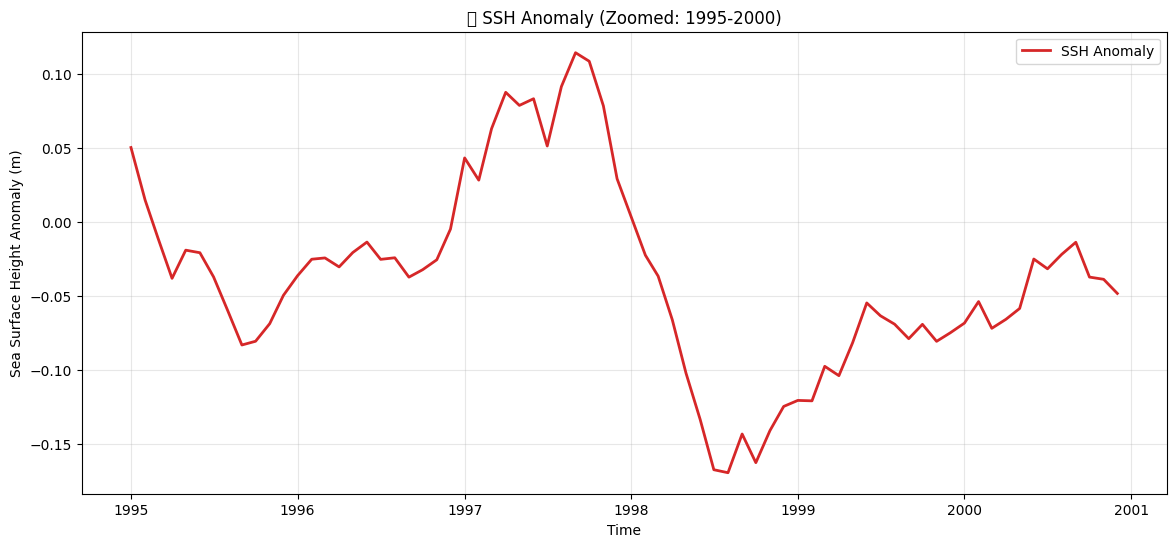

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


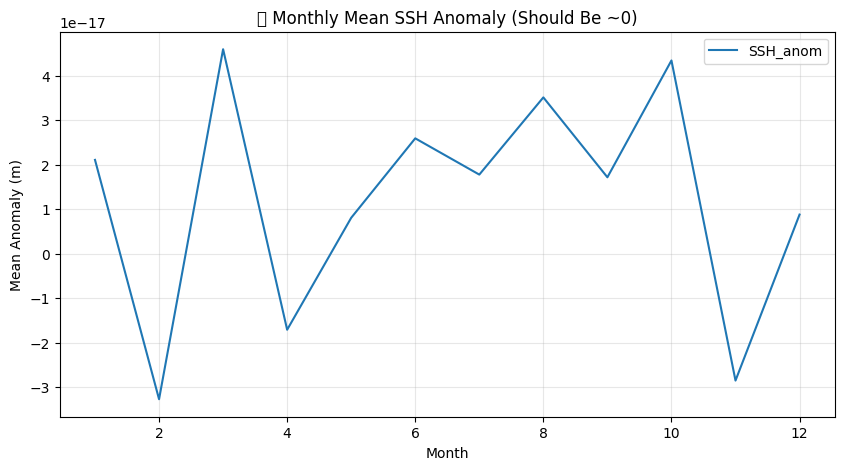

In [11]:
# ==========================================================
# VERIFY SSH_ANOM CREATION AND BEHAVIOR VISUALLY (SAFE VERSION)
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/working/ocean_final_features.csv")

# Ensure time is datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# --- Step 1: Plot available SSH data ---
plt.figure(figsize=(14, 6))

if 'SSH' in df.columns and 'SSH_anom' in df.columns:
    plt.plot(df['time'], df['SSH'], label='Raw SSH', color='tab:blue', alpha=0.6)
    plt.plot(df['time'], df['SSH_anom'], label='SSH Anomaly', color='tab:red', linewidth=2)
elif 'SSH_anom' in df.columns:
    plt.plot(df['time'], df['SSH_anom'], label='SSH Anomaly', color='tab:red', linewidth=2)
    print("ℹ️ Plotting only SSH_anom (raw SSH not present in reduced dataset).")
else:
    raise KeyError("❌ Neither SSH nor SSH_anom found in dataset!")

plt.title("🌊 Sea Surface Height (SSH) Anomaly Over Time")
plt.xlabel("Time")
plt.ylabel("Sea Surface Height (m)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Step 2: Zoom into a 5-year window ---
start_year, end_year = 1995, 2000
zoom_df = df[(df['time'].dt.year >= start_year) & (df['time'].dt.year <= end_year)]

plt.figure(figsize=(14, 6))
plt.plot(zoom_df['time'], zoom_df['SSH_anom'], label='SSH Anomaly', color='tab:red', linewidth=2)
plt.title(f"🌍 SSH Anomaly (Zoomed: {start_year}-{end_year})")
plt.xlabel("Time")
plt.ylabel("Sea Surface Height Anomaly (m)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Step 3: Check monthly averages ---
df['month'] = df['time'].dt.month
mean_by_month = df.groupby('month')[['SSH_anom']].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=mean_by_month)
plt.title("🌀 Monthly Mean SSH Anomaly (Should Be ~0)")
plt.xlabel("Month")
plt.ylabel("Mean Anomaly (m)")
plt.grid(True, alpha=0.3)
plt.show()



📘 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  283 non-null    datetime64[ns]
 1   SST_anom              283 non-null    float64       
 2   SST_lag1              283 non-null    float64       
 3   MLD_anom              283 non-null    float64       
 4   ΔMLD                  283 non-null    float64       
 5   SSH_anom              283 non-null    float64       
 6   Current_speed         283 non-null    float64       
 7   Meridional_heat_flux  283 non-null    float64       
 8   SST_rollstd_3         283 non-null    float64       
 9   Salinity_anom         283 non-null    float64       
 10  SST_next              283 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 24.4 KB
None

📊 Summary Statistics (numeric columns only):


count                           mean  \
time                    283  2005-07-31 23:44:44.098939904   
SST_anom              283.0                      -0.007563   
SST_lag1              283.0                      27.600202   
MLD_anom              283.0                       0.087951   
ΔMLD                  283.0                      -0.007046   
SSH_anom              283.0                            0.0   
Current_speed         283.0                       0.286157   
Meridional_heat_flux  283.0                       0.339593   
SST_rollstd_3         283.0                       0.249681   
Salinity_anom         283.0                       0.002105   
SST_next              283.0                      27.604997   

                                      min                  25%  \
time                  1993-11-01 00:00:00  1999-09-16 00:00:00   
SST_anom                        -1.667973            -0.573315   
SST_lag1                        25.499153             27.01045   
MLD_anom                       -11.401024             -1.77002   
ΔMLD                           -11.623943            -3.170196   
SSH_anom                        -0.169245            -0.037237   
Current_speed                    0.002813             0.145324   
Meridional_heat_flux             -0.85838              0.11898   
SST_rollstd_3                    0.009305             0.133373   
Salinity_anom                   -0.734898            -0.040342   
SST_next                        25.499153             27.01045   

                                      50%                  75%  \
time                  2005-08-01 00:00:00  2011-06-16 00:00:00   
SST_anom                        -0.014763             0.482944   
SST_lag1                        27.649595            28.202087   
MLD_anom                        -0.125513             1.945725   
ΔMLD                             0.215752             3.038223   
SSH_anom                        -0.003684             0.034713   
Current_speed                    0.312403             0.406354   
Meridional_heat_flux             0.370395             0.573867   
SST_rollstd_3                    0.197077             0.352972   
Salinity_anom                    0.046803             0.099859   
SST_next                        27.649595            28.218635   

                                      max       std  
time                  2017-05-01 00:00:00       NaN  
SST_anom                         2.312143   0.82615  
SST_lag1                        29.814447  0.893664  
MLD_anom                        11.650637  3.252781  
ΔMLD                            11.672039  4.513685  
SSH_anom                         0.162185  0.059075  
Current_speed                    0.693413  0.160626  
Meridional_heat_flux             1.728359  0.344542  
SST_rollstd_3                    0.904263  0.168944  
Salinity_anom                    0.234943  0.165974  
SST_next                        29.814447  0.896538


✅ No missing or infinite values found.


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


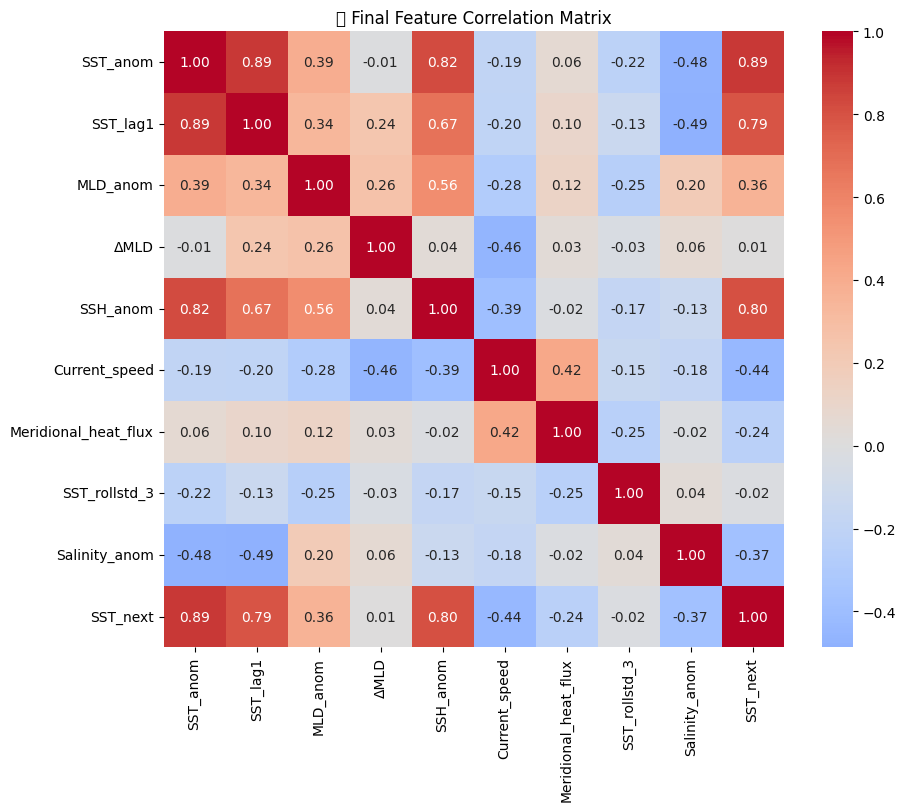

In [12]:
# ==========================================================
# DATA SANITY CHECK: FINAL REDUCED DATASET
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("/kaggle/working/ocean_final_features.csv")

# --- Convert time to datetime (for safe plotting later) ---
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# --- Quick structure summary ---
print("\n📘 Dataset Info:")
print(df.info())

print("\n📊 Summary Statistics (numeric columns only):")
display(df.describe().T.round(3))

# --- Check for missing or infinite values ---
df = df.replace([np.inf, -np.inf], np.nan)
missing = df.isna().sum()
if missing.any():
    print("\n⚠️ Missing Values Detected:")
    print(missing[missing > 0])
else:
    print("\n✅ No missing or infinite values found.")

# --- Correlation heatmap (numeric features only) ---
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("🌊 Final Feature Correlation Matrix")
plt.show()


In [13]:
# ==========================================================
# FINAL PREPROCESSING: REDUNDANCY FIX + FEATURE SCALING
# ==========================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import os

# --- Load your final cleaned dataset ---
df = pd.read_csv("/kaggle/working/ocean_final_features.csv")

# --- Convert time to datetime just for reference ---
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# --- Define target variable ---
target_col = 'SST_next'
y = df[target_col]

# ==========================================================
# 1️⃣ FEATURE SET DEFINITIONS
# ==========================================================

# A. "Best Predictive" set (statistically strongest)
feature_set_A = ['SST_anom', 'MLD_anom', 'Current_speed']

# B. "Physical (No-Peeking)" set (physically causal, interpretable)
feature_set_B = ['SSH_anom', 'MLD_anom', 'Current_speed', 'Salinity_anom']

# Check columns exist
missing_A = [col for col in feature_set_A if col not in df.columns]
missing_B = [col for col in feature_set_B if col not in df.columns]

if missing_A or missing_B:
    print("⚠️ Missing columns detected.")
    if missing_A:
        print("Set A missing:", missing_A)
    if missing_B:
        print("Set B missing:", missing_B)
else:
    print("✅ All required features found in dataset.")

# ==========================================================
# 2️⃣ FEATURE SCALING (STANDARDIZATION)
# ==========================================================

scaler_A = StandardScaler()
scaler_B = StandardScaler()

# Scale each feature set separately
X_A_scaled = scaler_A.fit_transform(df[feature_set_A])
X_B_scaled = scaler_B.fit_transform(df[feature_set_B])

# Convert back to DataFrame for readability
X_A_scaled = pd.DataFrame(X_A_scaled, columns=feature_set_A)
X_B_scaled = pd.DataFrame(X_B_scaled, columns=feature_set_B)

# ==========================================================
# 3️⃣ COMBINE WITH TARGET AND TIME
# ==========================================================
scaled_A = pd.concat([df[['time']], X_A_scaled, y], axis=1)
scaled_B = pd.concat([df[['time']], X_B_scaled, y], axis=1)

# ==========================================================
# 4️⃣ SAVE THE RESULTS
# ==========================================================
os.makedirs("/kaggle/working/scaled_sets", exist_ok=True)

scaled_A.to_csv("/kaggle/working/scaled_sets/scaled_set_A.csv", index=False)
scaled_B.to_csv("/kaggle/working/scaled_sets/scaled_set_B.csv", index=False)

joblib.dump(scaler_A, "/kaggle/working/scaled_sets/scaler_A.pkl")
joblib.dump(scaler_B, "/kaggle/working/scaled_sets/scaler_B.pkl")

print("\n📁 Saved scaled datasets and scalers:")
print("- scaled_sets/scaled_set_A.csv  (Best Predictive)")
print("- scaled_sets/scaled_set_B.csv  (Physical No-Peeking)")
print("- scalers saved as scaler_A.pkl and scaler_B.pkl")

# ==========================================================
# 5️⃣ SANITY CHECK SUMMARY
# ==========================================================
print("\n📊 Scaled Feature Summary (mean ± std):")
print("Set A:")
display(X_A_scaled.describe().T[['mean', 'std']].round(3))
print("Set B:")
display(X_B_scaled.describe().T[['mean', 'std']].round(3))


✅ All required features found in dataset.

📁 Saved scaled datasets and scalers:
- scaled_sets/scaled_set_A.csv  (Best Predictive)
- scaled_sets/scaled_set_B.csv  (Physical No-Peeking)
- scalers saved as scaler_A.pkl and scaler_B.pkl

📊 Scaled Feature Summary (mean ± std):
Set A:


mean    std
SST_anom       -0.0  1.002
MLD_anom       -0.0  1.002
Current_speed   0.0  1.002

Set B:


mean    std
SSH_anom        0.0  1.002
MLD_anom       -0.0  1.002
Current_speed   0.0  1.002
Salinity_anom   0.0  1.002


🚀 Evaluating Set A (Best Predictive) ...


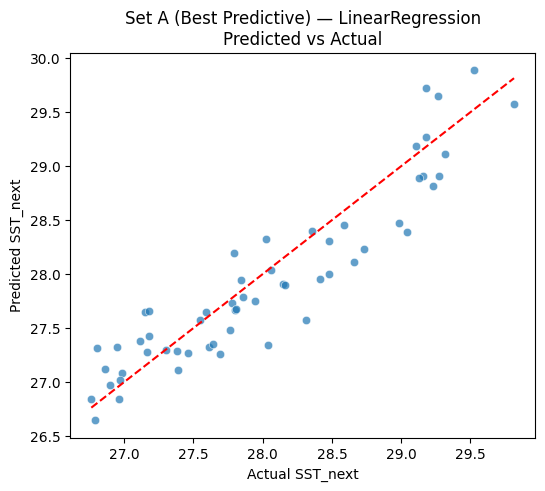

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


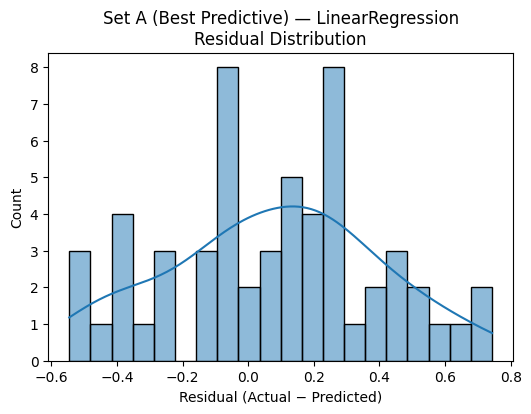

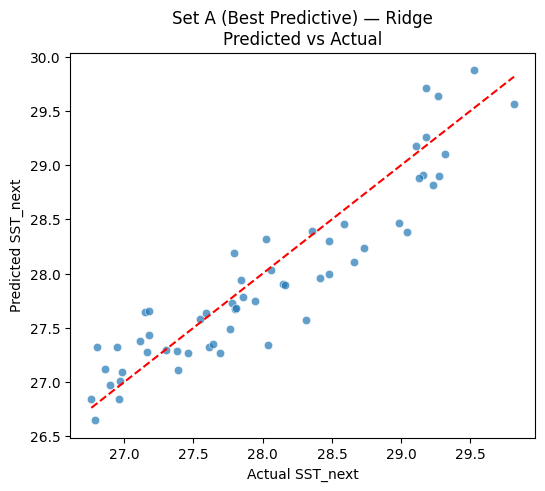

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


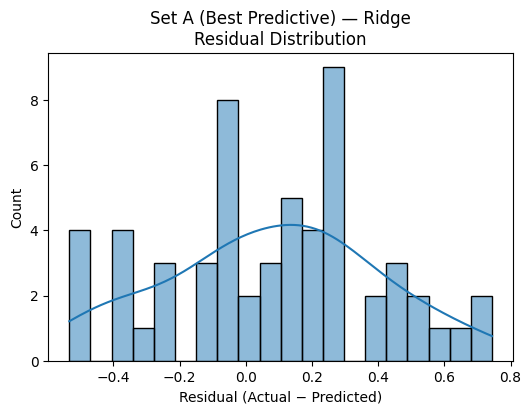

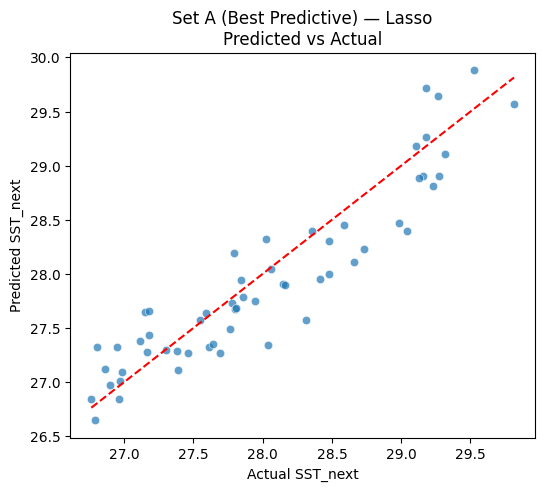

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


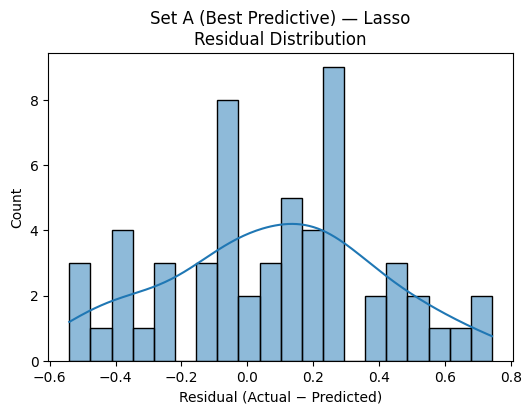


🚀 Evaluating Set B (Physical No-Peeking) ...


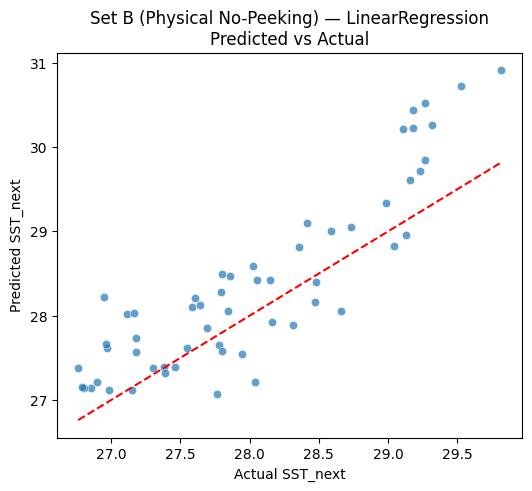

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


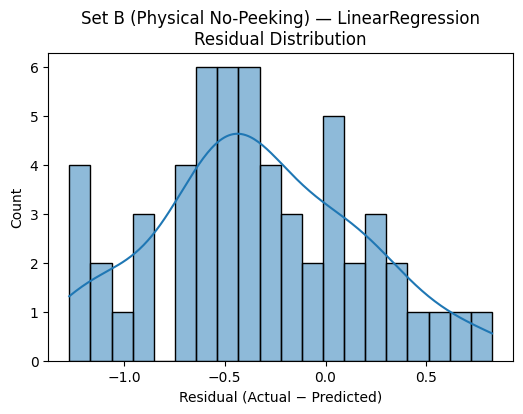

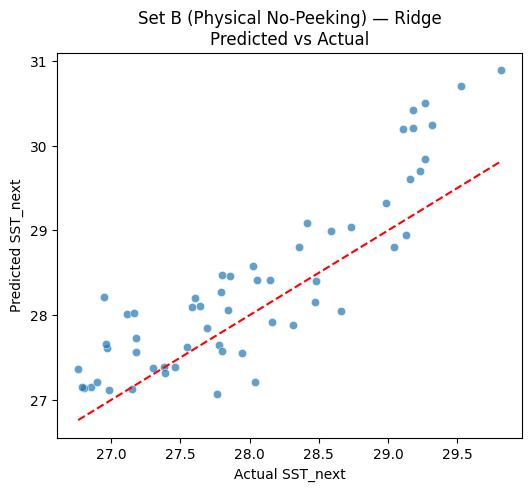

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


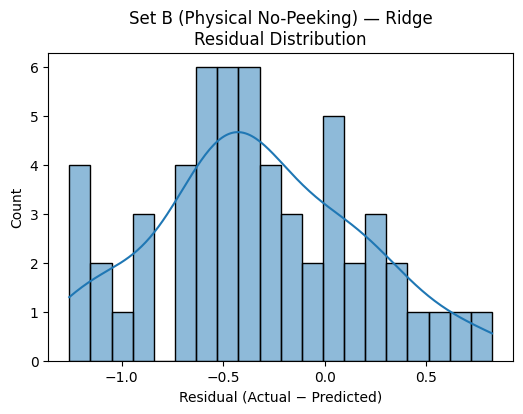

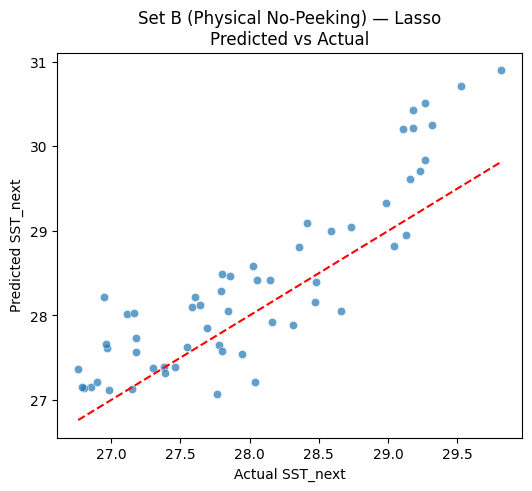

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


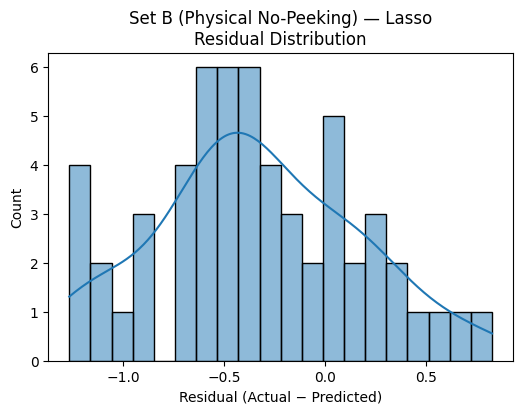

Model        R2      RMSE       MAE                  Feature Set
2             Lasso  0.850166  0.325530  0.267436      Set A (Best Predictive)
0  LinearRegression  0.849943  0.325772  0.267758      Set A (Best Predictive)
1             Ridge  0.849916  0.325801  0.267630      Set A (Best Predictive)
4             Ridge  0.493146  0.598724  0.497123  Set B (Physical No-Peeking)
5             Lasso  0.484985  0.603525  0.500791  Set B (Physical No-Peeking)
3  LinearRegression  0.478498  0.607314  0.503303  Set B (Physical No-Peeking)

In [14]:
# ==========================================================
# BASELINE REGRESSION PIPELINE — LINEAR / RIDGE / LASSO
# ==========================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function for evaluation
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return {"Model": name, "R2": r2, "RMSE": rmse, "MAE": mae}, y_pred

# --- Load scaled feature sets ---
set_paths = {
    "Set A (Best Predictive)": "/kaggle/working/scaled_sets/scaled_set_A.csv",
    "Set B (Physical No-Peeking)": "/kaggle/working/scaled_sets/scaled_set_B.csv"
}

results = []

for label, path in set_paths.items():
    print(f"\n🚀 Evaluating {label} ...")
    df = pd.read_csv(path)
    
    # Prepare features and target
    X = df.drop(columns=["time", "SST_next"], errors="ignore")
    y = df["SST_next"]

    # Train/test split (80 / 20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )

    # --- Fit & Evaluate Models ---
    for model_name, model in [
        ("LinearRegression", LinearRegression()),
        ("Ridge", Ridge(alpha=1.0)),
        ("Lasso", Lasso(alpha=0.001))
    ]:
        metrics, y_pred = evaluate_model(model_name, model, X_train, X_test, y_train, y_test)
        metrics["Feature Set"] = label
        results.append(metrics)

        # --- Visualization: Predicted vs Actual ---
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
        plt.xlabel("Actual SST_next")
        plt.ylabel("Predicted SST_next")
        plt.title(f"{label} — {model_name}\nPredicted vs Actual")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.show()

        # --- Visualization: Residuals ---
        residuals = y_test - y_pred
        plt.figure(figsize=(6, 4))
        sns.histplot(residuals, bins=20, kde=True)
        plt.title(f"{label} — {model_name}\nResidual Distribution")
        plt.xlabel("Residual (Actual − Predicted)")
        plt.show()

# --- Summarize all results ---
results_df = pd.DataFrame(results)
display(results_df.sort_values(["Feature Set", "R2"], ascending=[True, False]))



🌊 Evaluating Set A (Best Predictive) ...


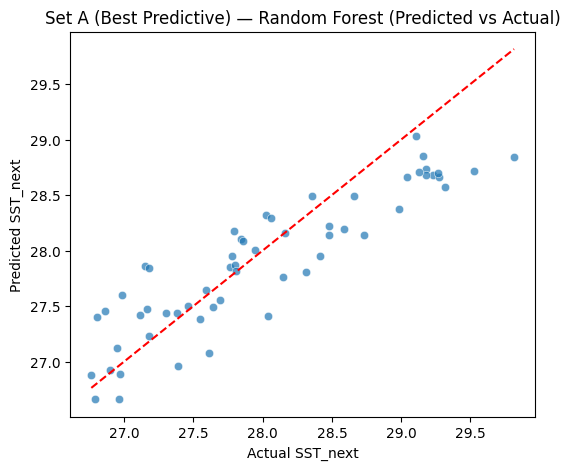

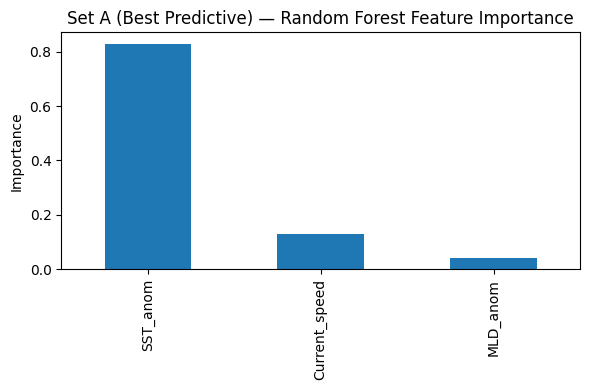

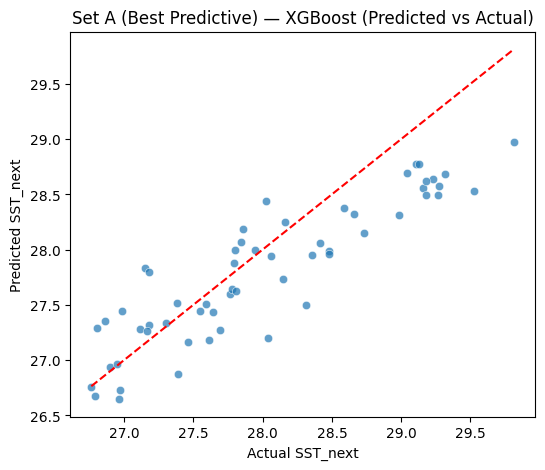

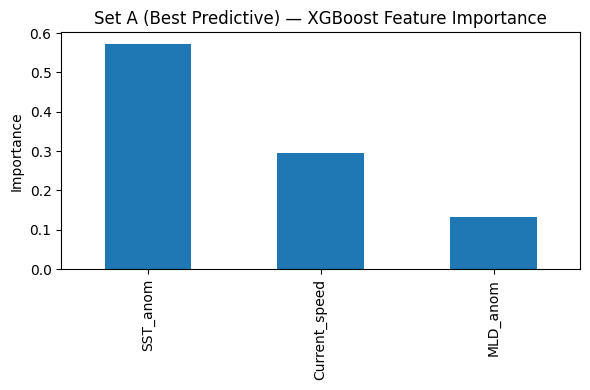


🌊 Evaluating Set B (Physical No-Peeking) ...


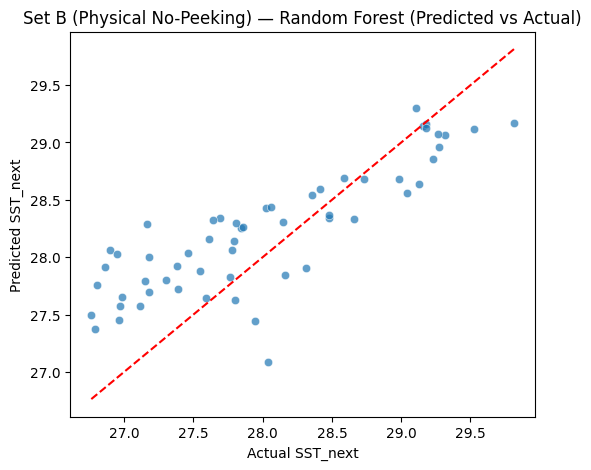

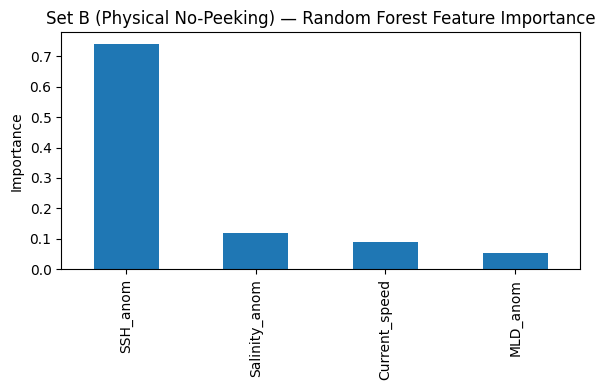

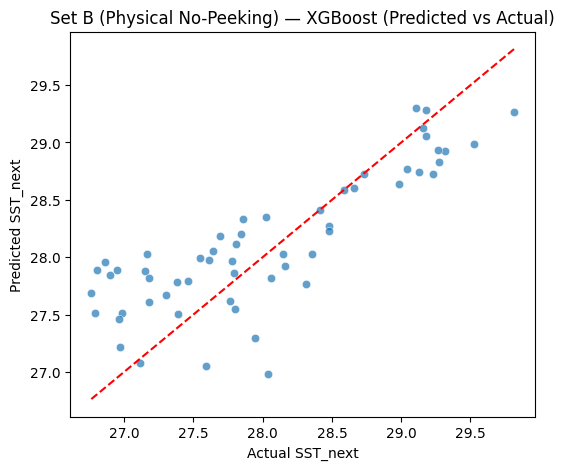

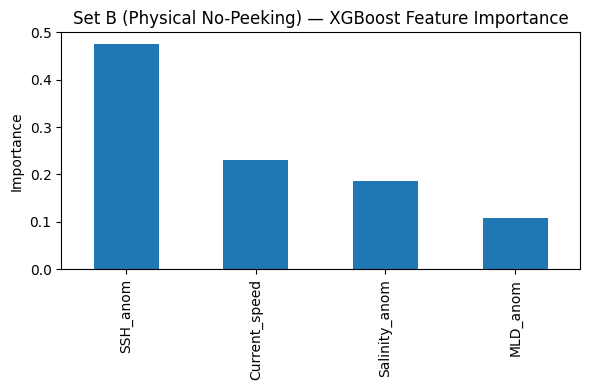

Model        R2      RMSE       MAE                  Feature Set
0  Random Forest  0.763216  0.409224  0.334147      Set A (Best Predictive)
1        XGBoost  0.717372  0.447088  0.371123      Set A (Best Predictive)
3        XGBoost  0.652259  0.495922  0.407017  Set B (Physical No-Peeking)
2  Random Forest  0.604940  0.528588  0.443407  Set B (Physical No-Peeking)

In [15]:
# ==========================================================
# STAGE 2 – RANDOM FOREST + XGBOOST COMPARISON
# ==========================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function for evaluation
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return {"Model": name, "R2": r2, "RMSE": rmse, "MAE": mae}, y_pred, model

# ---------------------------------------------------------------------
# Load both scaled feature sets
# ---------------------------------------------------------------------
set_paths = {
    "Set A (Best Predictive)": "/kaggle/working/scaled_sets/scaled_set_A.csv",
    "Set B (Physical No-Peeking)": "/kaggle/working/scaled_sets/scaled_set_B.csv"
}

results = []

for label, path in set_paths.items():
    print(f"\n🌊 Evaluating {label} ...")
    df = pd.read_csv(path)

    X = df.drop(columns=["time", "SST_next"], errors="ignore")
    y = df["SST_next"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )

    # --------------------------------------------------------------
    # 1️⃣ Random Forest
    # --------------------------------------------------------------
    rf = RandomForestRegressor(
        n_estimators=300, max_depth=None, min_samples_split=2,
        min_samples_leaf=1, random_state=42
    )
    rf_metrics, rf_pred, rf_model = evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test)
    rf_metrics["Feature Set"] = label
    results.append(rf_metrics)

    # Predicted vs Actual
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{label} — Random Forest (Predicted vs Actual)")
    plt.xlabel("Actual SST_next"); plt.ylabel("Predicted SST_next")
    plt.show()

    # Feature Importance
    fi = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    fi.plot(kind="bar"); plt.title(f"{label} — Random Forest Feature Importance")
    plt.ylabel("Importance"); plt.tight_layout(); plt.show()

    # --------------------------------------------------------------
    # 2️⃣ XGBoost
    # --------------------------------------------------------------
    xgb = XGBRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, objective="reg:squarederror"
    )
    xgb_metrics, xgb_pred, xgb_model = evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test)
    xgb_metrics["Feature Set"] = label
    results.append(xgb_metrics)

    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test, y=xgb_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{label} — XGBoost (Predicted vs Actual)")
    plt.xlabel("Actual SST_next"); plt.ylabel("Predicted SST_next")
    plt.show()

    fi = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    fi.plot(kind="bar"); plt.title(f"{label} — XGBoost Feature Importance")
    plt.ylabel("Importance"); plt.tight_layout(); plt.show()

# ---------------------------------------------------------------------
# Summarise results
# ---------------------------------------------------------------------
results_df = pd.DataFrame(results)
display(results_df.sort_values(["Feature Set","R2"], ascending=[True,False]))


In [16]:
!pip install gplearn
!pip install sympy

In [17]:
# ----------------------------
# SYMBOLIC REGRESSION PIPELINE
# using gplearn (pure-Python)
# ----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import sympy as sp
import joblib
import math
import warnings
warnings.filterwarnings("ignore")

# ---------- CONFIG ----------
# choose path: A or B
path_A = "/kaggle/working/scaled_sets/scaled_set_A.csv"  # best predictive (includes SST_anom)
path_B = "/kaggle/working/scaled_sets/scaled_set_B.csv"  # physical no-peek (no SST_anom)

# Choose which to run (set to "A" or "B" or both in loop)
which_sets = ["A","B"]

# time split (train up to this year inclusive)
train_end_year = 2010  # train 1993..2010, test 2011..
random_state = 42

# gplearn hyperparams (conservative for interpretability)
gp_params = {
    "population_size": 2000,     # larger gives better search but slower
    "generations": 80,           # number of evolution rounds
    "stopping_criteria": 0.995, # stop if perfect (~rare)
    "p_crossover": 0.7,
    "p_subtree_mutation": 0.1,
    "p_hoist_mutation": 0.05,
    "p_point_mutation": 0.15,
    "parsimony_coefficient": 0.01,  # penalize complexity (raise to encourage simpler eq)
    "max_samples": 0.9,         # use random samples each generation (bagging)
    "verbose": 1,
    "n_jobs": -1,
    "metric": 'mean absolute error',  # fitness metric (L1 is robust)
    "const_range": (-5, 5),
    "init_depth": (2, 4),
    "function_set": ('add', 'sub', 'mul', 'div', 'sin', 'cos', 'log', 'sqrt')  # physics-friendly ops
}

# ---------- HELPER FUNCTIONS ----------
def load_and_split(path, train_year_cut=2010):
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    # Drop rows with missing or inf
    df = df.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
    # features X and target y
    X = df.drop(columns=["time", "SST_next"], errors="ignore")
    y = df["SST_next"]
    # time-based split
    train_mask = df['time'].dt.year <= train_year_cut
    X_train, X_test = X.loc[train_mask].copy(), X.loc[~train_mask].copy()
    y_train, y_test = y.loc[train_mask].copy(), y.loc[~train_mask].copy()
    return X_train, X_test, y_train, y_test, df

def evaluate_formula(expr, X_test, y_test):
    """Evaluate numeric predictions from an expression string (sympy) on X_test."""
    # sympy expression -> lambdify
    vars_names = list(X_test.columns)
    sym_vars = sp.symbols(vars_names)
    try:
        f = sp.lambdify(sym_vars, expr, "numpy")
        vals = f(*[X_test[c].values for c in vars_names])
        # ensure numeric
        vals = np.array(vals, dtype=float).ravel()
    except Exception as e:
        # if evaluation fails, set poor score
        return None, None, None
    r2 = r2_score(y_test.values, vals)
    rmse = math.sqrt(mean_squared_error(y_test.values, vals))
    return vals, r2, rmse

# ---------- MAIN LOOP ----------
all_results = []

for set_which in which_sets:
    path = path_A if set_which == "A" else path_B
    print("\n" + "#"*60)
    print(f"Running symbolic regression on Set {set_which} -> {path}")
    X_train, X_test, y_train, y_test, df_full = load_and_split(path, train_year_cut=train_end_year)
    feature_names = list(X_train.columns)
    print("Features:", feature_names)
    print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

    # create and fit symbolic regressor
    sr = SymbolicRegressor(**gp_params)
    sr.set_params(function_set=gp_params["function_set"])  # ensure functions
    sr._program = None  # start fresh
    sr = SymbolicRegressor(population_size=gp_params["population_size"],
                           generations=gp_params["generations"],
                           stopping_criteria=gp_params["stopping_criteria"],
                           p_crossover=gp_params["p_crossover"],
                           p_subtree_mutation=gp_params["p_subtree_mutation"],
                           p_hoist_mutation=gp_params["p_hoist_mutation"],
                           p_point_mutation=gp_params["p_point_mutation"],
                           parsimony_coefficient=gp_params["parsimony_coefficient"],
                           max_samples=gp_params["max_samples"],
                           verbose=gp_params["verbose"],
                           n_jobs=gp_params["n_jobs"],
                           metric=gp_params["metric"],
                           const_range=gp_params["const_range"],
                           init_depth=gp_params["init_depth"],
                           function_set=gp_params["function_set"],
                           random_state=random_state)
    # Fit (this prints progress)
    sr.fit(X_train.values, y_train.values)

    # best program and human-readable form
    program = sr._program  # gplearn program
    formula_str = program.__str__()  # textual expression
    print("\nBest formula (gplearn text):\n", formula_str)

    # Convert to sympy expression for neatness (attempt)
    # gplearn prints expressions using feature indices like "X0", "X1". Replace with names:
    sym_expr_str = formula_str
    for i, name in enumerate(feature_names):
        sym_expr_str = sym_expr_str.replace(f"X{i}", name)
    # gplearn uses "add(X0,X1)" format; try to convert to python expression
    # Basic conversions:
    sym_expr_str = sym_expr_str.replace("add(","(").replace("mul(","(").replace("sub(","(").replace("div(","(")
    # This naive mapping might not fully translate; we will fallback to sr.predict if needed.

    # Evaluate program on test set
    y_pred_train = sr.predict(X_train.values)
    y_pred_test = sr.predict(X_test.values)
    r2_tr = r2_score(y_train, y_pred_train)
    r2_te = r2_score(y_test, y_pred_test)
    rmse_te = math.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"Train R2: {r2_tr:.4f}  Test R2: {r2_te:.4f}  Test RMSE: {rmse_te:.4f}")

    # Save program & model
    joblib.dump(sr, f"/kaggle/working/symbolic_sr_set{set_which}.pkl")

    # Save textual program
    with open(f"/kaggle/working/symbolic_program_set{set_which}.txt", "w") as f:
        f.write("gplearn program:\n")
        f.write(program.__str__())
        f.write("\n\nfeature names:\n")
        f.write(", ".join(feature_names))

    # Try to get a sympy-compatible expression by parsing the program string carefully
    # Note: gplearn's program.__str__ uses operators like add(a,b). For a robust route,
    # we will just show the program string and use sr.predict for numeric checks.
    # But you can attempt further parsing if needed.

    # Store results
    all_results.append({
        "set": set_which,
        "formula": program.__str__(),
        "train_r2": r2_tr,
        "test_r2": r2_te,
        "test_rmse": rmse_te,
        "model_path": f"/kaggle/working/symbolic_sr_set{set_which}.pkl",
        "program_txt": f"/kaggle/working/symbolic_program_set{set_which}.txt"
    })

# Save summary
results_df = pd.DataFrame(all_results)
results_df.to_csv("/kaggle/working/symbolic_regression_results_summary.csv", index=False)
print("\nDone. Summary saved to /kaggle/working/symbolic_regression_results_summary.csv")



############################################################
Running symbolic regression on Set A -> /kaggle/working/scaled_sets/scaled_set_A.csv
Features: ['SST_anom', 'MLD_anom', 'Current_speed']
Train samples: 206 Test samples: 77
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     7.74          29.1643        7          17.8172           18.736      3.04m
   1     9.18           26.342        7          4.42297          5.51574      1.54m
   2    10.51          23.9766       13          3.51586           3.2047      1.58m
   3    13.45          29.9328        7         0.730981          0.79972      1.57m

Best formula (gplearn text):
 sqrt(div(sub(0.343, -4.699), log(0.993)))
Train R2: -0.0419  Test R2: -0.0069  Test RMSE: 0.8855

###################################################

In [18]:
# ----------------------------
# SYMBOLIC REGRESSION PIPELINE
# using gplearn (pure-Python)
# ----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import sympy as sp
import joblib
import math
import warnings
warnings.filterwarnings("ignore")

# ---------- CONFIG ----------
# choose path: A or B
path_A = "/kaggle/working/scaled_sets/scaled_set_A.csv"  # best predictive (includes SST_anom)
path_B = "/kaggle/working/scaled_sets/scaled_set_B.csv"  # physical no-peek (no SST_anom)

# Choose which to run (set to "A" or "B" or both in loop)
which_sets = ["A","B"]

# time split (train up to this year inclusive)
train_end_year = 2010  # train 1993..2010, test 2011..
random_state = 42

# gplearn hyperparams (conservative for interpretability)
gp_params = {
    "population_size": 200000,     # larger gives better search but slower
    "generations": 150,           # number of evolution rounds
    "stopping_criteria": 0.995, # stop if perfect (~rare)
    "p_crossover": 0.7,
    "p_subtree_mutation": 0.1,
    "p_hoist_mutation": 0.05,
    "p_point_mutation": 0.15,
    "parsimony_coefficient": 0.01,  # penalize complexity (raise to encourage simpler eq)
    "max_samples": 0.9,         # use random samples each generation (bagging)
    "verbose": 1,
    "n_jobs": -1,
    "metric": 'mean absolute error',  # fitness metric (L1 is robust)
    "const_range": (-5, 5),
    "init_depth": (2, 4),
    "function_set": ('add', 'sub', 'mul', 'div')  # physics-friendly ops
}

# ---------- HELPER FUNCTIONS ----------
def load_and_split(path, train_year_cut=2010):
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    # Drop rows with missing or inf
    df = df.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
    # features X and target y
    X = df.drop(columns=["time", "SST_next"], errors="ignore")
    y = df["SST_next"]
    # time-based split
    train_mask = df['time'].dt.year <= train_year_cut
    X_train, X_test = X.loc[train_mask].copy(), X.loc[~train_mask].copy()
    y_train, y_test = y.loc[train_mask].copy(), y.loc[~train_mask].copy()
    return X_train, X_test, y_train, y_test, df

def evaluate_formula(expr, X_test, y_test):
    """Evaluate numeric predictions from an expression string (sympy) on X_test."""
    # sympy expression -> lambdify
    vars_names = list(X_test.columns)
    sym_vars = sp.symbols(vars_names)
    try:
        f = sp.lambdify(sym_vars, expr, "numpy")
        vals = f(*[X_test[c].values for c in vars_names])
        # ensure numeric
        vals = np.array(vals, dtype=float).ravel()
    except Exception as e:
        # if evaluation fails, set poor score
        return None, None, None
    r2 = r2_score(y_test.values, vals)
    rmse = math.sqrt(mean_squared_error(y_test.values, vals))
    return vals, r2, rmse

# ---------- MAIN LOOP ----------
all_results = []

for set_which in which_sets:
    path = path_A if set_which == "A" else path_B
    print("\n" + "#"*60)
    print(f"Running symbolic regression on Set {set_which} -> {path}")
    X_train, X_test, y_train, y_test, df_full = load_and_split(path, train_year_cut=train_end_year)
    feature_names = list(X_train.columns)
    print("Features:", feature_names)
    print("Train samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

    # create and fit symbolic regressor
    sr = SymbolicRegressor(**gp_params)
    sr.set_params(function_set=gp_params["function_set"])  # ensure functions
    sr._program = None  # start fresh
    sr = SymbolicRegressor(population_size=gp_params["population_size"],
                           generations=gp_params["generations"],
                           stopping_criteria=gp_params["stopping_criteria"],
                           p_crossover=gp_params["p_crossover"],
                           p_subtree_mutation=gp_params["p_subtree_mutation"],
                           p_hoist_mutation=gp_params["p_hoist_mutation"],
                           p_point_mutation=gp_params["p_point_mutation"],
                           parsimony_coefficient=gp_params["parsimony_coefficient"],
                           max_samples=gp_params["max_samples"],
                           verbose=gp_params["verbose"],
                           n_jobs=gp_params["n_jobs"],
                           metric=gp_params["metric"],
                           const_range=gp_params["const_range"],
                           init_depth=gp_params["init_depth"],
                           function_set=gp_params["function_set"],
                           random_state=random_state)
    # Fit (this prints progress)
    sr.fit(X_train.values, y_train.values)

    # best program and human-readable form
    program = sr._program  # gplearn program
    formula_str = program.__str__()  # textual expression
    print("\nBest formula (gplearn text):\n", formula_str)

    # Convert to sympy expression for neatness (attempt)
    # gplearn prints expressions using feature indices like "X0", "X1". Replace with names:
    sym_expr_str = formula_str
    for i, name in enumerate(feature_names):
        sym_expr_str = sym_expr_str.replace(f"X{i}", name)
    # gplearn uses "add(X0,X1)" format; try to convert to python expression
    # Basic conversions:
    sym_expr_str = sym_expr_str.replace("add(","(").replace("mul(","(").replace("sub(","(").replace("div(","(")
    # This naive mapping might not fully translate; we will fallback to sr.predict if needed.

    # Evaluate program on test set
    y_pred_train = sr.predict(X_train.values)
    y_pred_test = sr.predict(X_test.values)
    r2_tr = r2_score(y_train, y_pred_train)
    r2_te = r2_score(y_test, y_pred_test)
    rmse_te = math.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"Train R2: {r2_tr:.4f}  Test R2: {r2_te:.4f}  Test RMSE: {rmse_te:.4f}")

    # Save program & model
    joblib.dump(sr, f"/kaggle/working/symbolic_sr_set{set_which}.pkl")

    # Save textual program
    with open(f"/kaggle/working/symbolic_program_set{set_which}.txt", "w") as f:
        f.write("gplearn program:\n")
        f.write(program.__str__())
        f.write("\n\nfeature names:\n")
        f.write(", ".join(feature_names))

    # Try to get a sympy-compatible expression by parsing the program string carefully
    # Note: gplearn's program.__str__ uses operators like add(a,b). For a robust route,
    # we will just show the program string and use sr.predict for numeric checks.
    # But you can attempt further parsing if needed.

    # Store results
    all_results.append({
        "set": set_which,
        "formula": program.__str__(),
        "train_r2": r2_tr,
        "test_r2": r2_te,
        "test_rmse": rmse_te,
        "model_path": f"/kaggle/working/symbolic_sr_set{set_which}.pkl",
        "program_txt": f"/kaggle/working/symbolic_program_set{set_which}.txt"
    })

# Save summary
results_df = pd.DataFrame(all_results)
results_df.to_csv("/kaggle/working/symbolic_regression_results_summary.csv", index=False)
print("\nDone. Summary saved to /kaggle/working/symbolic_regression_results_summary.csv")



############################################################
Running symbolic regression on Set A -> /kaggle/working/scaled_sets/scaled_set_A.csv
Features: ['SST_anom', 'MLD_anom', 'Current_speed']
Train samples: 206 Test samples: 77
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.12          752.597       11         0.415046         0.415094    216.30m

Best formula (gplearn text):
 add(sub(X0, div(-2.257, 0.119)), div(div(X1, X1), 0.113))
Train R2: 0.6827  Test R2: 0.6872  Test RMSE: 0.4936

############################################################
Running symbolic regression on Set B -> /kaggle/working/scaled_sets/scaled_set_B.csv
Features: ['SSH_anom', 'MLD_anom', 'Current_speed', 'Salinity_anom']
Train samples: 206 Test samples: 77
    |   Population Average    |          

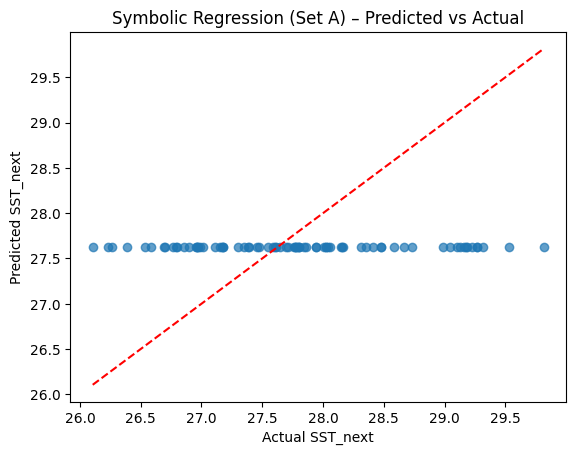

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SST_next"); plt.ylabel("Predicted SST_next")
plt.title("Symbolic Regression (Set A) – Predicted vs Actual")
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 13.0 MB/s eta 0:00:00
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/pysr/juliapkg.json
[juliapkg] Locating Julia 1.10.3 - 1.11
[juliapkg] Using Julia 1.11.5 at /usr/local/bin/julia
[juliapkg] Using Julia project at /root/.julia/environments/pyjuliapkg
[juliapkg] Writing Project.toml:
           | [deps]
           | PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
           | OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
           | SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
           | Serialization = "9e88b42a-f829-5b0c-bbe9-9e9231

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Tricks ─────────────────── v0.1.12
   Installed ScientificTypesBase ────── v3.0.0
   Installed Adapt ──────────────────── v4.4.0
   Installed MicroMamba ─────────────── v0.1.14
   Installed IrrationalConstants ────── v0.2.6
   Installed MLJModelInterface ──────── v1.11.1
   Installed DynamicExpressions ─────── v1.10.3
   Installed PythonCall ─────────────── v0.9.26
   Installed OpenSSL_jll ────────────── v3.0.16+0
   Installed JSON3 ──────────────────── v1.14.3
   Installed PositiveFactorizations ─── v0.2.4
   Installed StatisticalTraits ──────── v3.5.0
   Installed ADTypes ────────────────── v1.18.0
   Installed Preferences ────────────── v1.5.0
   Installed Optim ──────────────────── v1.13.2
   Installed micromamba_jll ─────────── v1.5.12+0
   Installed ProgressMeter ──────────── v1.10.2
   Installed NLSolversBase ──────────── v7.10.0
   Installed DynamicDiff ────────────── v0.2.

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 1.400e+05
Progress: 802 / 24000 total iterations (3.342%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           7.825e-01  0.000e+00  y = 27.526
3           2.189e-01  6.369e-01  y = SST_anom + 27.62
5           1.741e-01  1.145e-01  y = (SST_anom / 1.2714) + 27.599
7           1.741e-01  1.788e-07  y = (33.96 - (SST_anom * -0.96778)) * 0.81271
8           1.427e-01  1.990e-01  y = (Current_speed * -0.29186) + (sin(SST_anom) + 27.594)
9           1.154e-01  2.123e-01  y = (Current_speed * -0.24718) + ((SST_anom * 0.73816) + 2...
                                      7.591)
10          1.150e-01  3.930e-03  y = (SST_anom + 27.589) + sin((SST_anom + Current_speed) *...
                                       -0.27343)
11          1.139e-01  9.148e-03  y = 

[ Info: Final population:
[ Info: Results saved to:



=== 🧠 Top Discovered Equations ===
PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          27.525608   
	1         0.636881                               SST_anom + 27.619644   
	2         0.114514                (SST_anom * 0.78653413) + 27.599499   
	3         0.057428  (-36.775482 / (SST_anom + 7.0268517)) + 32.941544   
	4         0.084097  ((Current_speed * -0.2918576) + 27.593855) + s...   
	5   >>>>  0.212259  ((Current_speed * -0.24717756) + 27.590763) + ...   
	6         0.013986  ((SST_anom * 0.7218182) + 27.59238) + (sin(Cur...   
	7         0.091410  (((Current_speed / -0.4557474) + -64.31855) / ...   
	8         0.020925  (((sin(Current_speed) / -0.31717348) + -64.312...   
	9         0.003970  ((SST_anom + (sin(Current_speed) * -0.46255443...   
	10        0.012725  (((sin(SST_anom) * -0.17429209) + 0.7075716) *...   
	11        0.027054  ((SST_anom + sin(sin(Curre

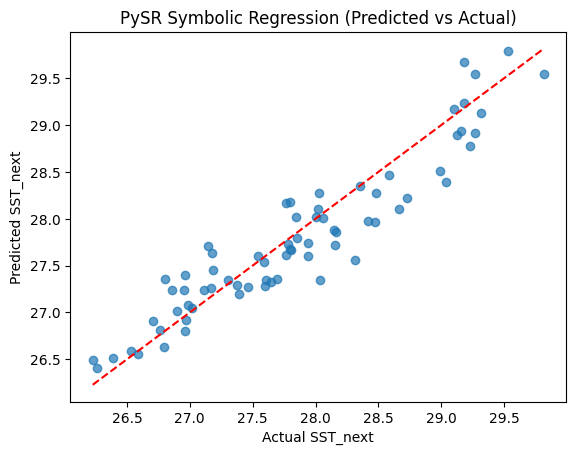

Saved all candidate equations to /kaggle/working/pysr_equations.csv
  - outputs/20251021_060612_n8tW3r/hall_of_fame.csv


In [20]:
# ==========================================================
# 🔬 MODERN SYMBOLIC REGRESSION WITH PySR
# ==========================================================
!pip install pysr --quiet

import pandas as pd
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# --- Load your dataset (Set A recommended) ---
df = pd.read_csv("/kaggle/working/scaled_sets/scaled_set_A.csv")
X = df[["SST_anom", "MLD_anom", "Current_speed"]]
y = df["SST_next"]

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

# --- Define and train symbolic regressor ---
model = PySRRegressor(
    niterations=2000,
    populations=12,
    model_selection="best",
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sqrt", "log", "sin"],
    maxsize=20,
    parsimony=1e-4,
    loss="loss(x, y) = (x - y)^2",
    verbosity=1,
)

model.fit(X_train, y_train)
print("\n=== 🧠 Top Discovered Equations ===")
print(model)

# --- Evaluate ---
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"\nTest R² = {r2:.3f}, RMSE = {rmse:.3f}")

# --- Visualize ---
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("PySR Symbolic Regression (Predicted vs Actual)")
plt.xlabel("Actual SST_next")
plt.ylabel("Predicted SST_next")
plt.show()

# --- Save equations to CSV ---
eq_df = model.equations_
eq_df.to_csv("/kaggle/working/pysr_equations.csv", index=False)
print("Saved all candidate equations to /kaggle/working/pysr_equations.csv")


In [21]:
dfB = pd.read_csv("/kaggle/working/scaled_sets/scaled_set_B.csv")
XB = dfB[["SSH_anom", "MLD_anom", "Current_speed", "Salinity_anom"]]
yB = dfB["SST_next"]

modelB = PySRRegressor(
    niterations=2000,
    populations=12,
    unary_operators=["sqrt", "log", "sin", "cos"],
    binary_operators=["+", "-", "*", "/"],
    parsimony=1e-4,            # allow more complexity
    maxsize=20,                # larger symbolic depth
    model_selection="best",
    loss="loss(x, y) = (x - y)^2",
)
modelB.fit(XB, yB)
print(modelB)

[ Info: Started!



Expressions evaluated per second: 1.400e+05
Progress: 842 / 24000 total iterations (3.508%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.009e-01  0.000e+00  y = 27.605
3           3.606e-01  3.990e-01  y = SSH_anom + 27.605
4           3.400e-01  5.872e-02  y = sin(SSH_anom) + 27.615
5           2.823e-01  1.861e-01  y = 27.605 - (SSH_anom * -0.72016)
7           2.823e-01  1.788e-07  y = 17.353 - ((SSH_anom * -0.72017) + -10.252)
8           2.357e-01  1.806e-01  y = sqrt((39.68 - Salinity_anom) * (SSH_anom + 19.219))
10          2.197e-01  3.501e-02  y = sqrt(((SSH_anom + 20.37) - Salinity_anom) * (Salinity_...
                                      anom + 37.492))
11          2.093e-01  4.854e-02  y = sqrt((20.158 + SSH_anom) * (37.917 - (Salinity_anom + ...
               

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.009e-01  0.000e+00  y = 27.605
3           3.606e-01  3.990e-01  y = SSH_anom + 27.605
4           3.400e-01  5.872e-02  y = sin(SSH_anom) + 27.615
5           2.823e-01  1.861e-01  y = (SSH_anom * 0.7201) - -27.605
7           2.823e-01  5.960e-08  y = 17.353 - ((SSH_anom * -0.72017) + -10.252)
8           2.357e-01  1.806e-01  y = sqrt((39.71 - Salinity_anom) * (SSH_anom + 19.204))
9           2.246e-01  4.800e-02  y = ((SSH_anom * 0.68796) + 27.605) - (Salinity_anom * 0.2...
                                      4231)
10          2.197e-01  2.201e-02  y = sqrt(((SSH_anom + 20.37) - Salinity_anom) * (Salinity_...
                                      anom + 37.492))
11          1.948e-01  1.206e-01  y = (SSH_anom * 0.58752) + (27.605 - ((Current_speed + Sal...
                                      inity_anom) * 0.2525))
12       

In [22]:
!pip install pysindy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 43.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.4 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.3.4 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, b

Prepared derivative with method=savgol. Samples after derivative: 283
y mean / std: -0.00017706837708228167 0.17918497613772577
first 5 y values: [-0.08794658 -0.07356533 -0.04480283 -0.02170595  0.01496892]

Running SINDy with threshold = 0.02

Discovered equation for dSST/dt with threshold 0.02 :
(SST_anom)' = -0.113 SST_anom + -0.031 MLD_anom + -0.090 Current_speed + 0.132 SSH_anom
R² (fit) = 0.5215, RMSE = 0.1239 °C/month
Saved coefficients to /kaggle/working/sindy_coeffs_thresh_0.020.csv

Running SINDy with threshold = 0.05

Discovered equation for dSST/dt with threshold 0.05 :
(SST_anom)' = -0.108 SST_anom + -0.088 Current_speed + 0.110 SSH_anom
R² (fit) = 0.5010, RMSE = 0.1266 °C/month
Saved coefficients to /kaggle/working/sindy_coeffs_thresh_0.050.csv

Running SINDy with threshold = 0.08

Discovered equation for dSST/dt with threshold 0.08 :
(SST_anom)' = -0.108 SST_anom + -0.088 Current_speed + 0.110 SSH_anom
R² (fit) = 0.5010, RMSE = 0.1266 °C/month
Saved coefficients to /kag

threshold            r2      rmse  \
0       0.02  5.215046e-01  0.123948   
1       0.05  5.010080e-01  0.126575   
2       0.08  5.010080e-01  0.126575   
3       0.12 -9.765148e-07  0.179185   

                                       coef_file  
0  /kaggle/working/sindy_coeffs_thresh_0.020.csv  
1  /kaggle/working/sindy_coeffs_thresh_0.050.csv  
2  /kaggle/working/sindy_coeffs_thresh_0.080.csv  
3  /kaggle/working/sindy_coeffs_thresh_0.120.csv

Saved threshold summary to /kaggle/working/sindy_threshold_summary.csv

Best threshold by R²: 0.02


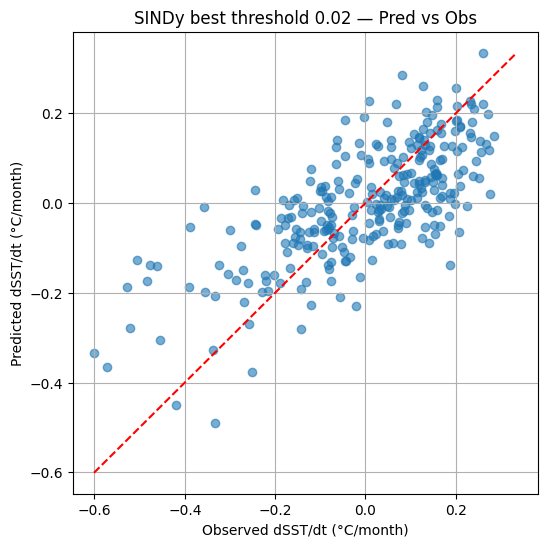

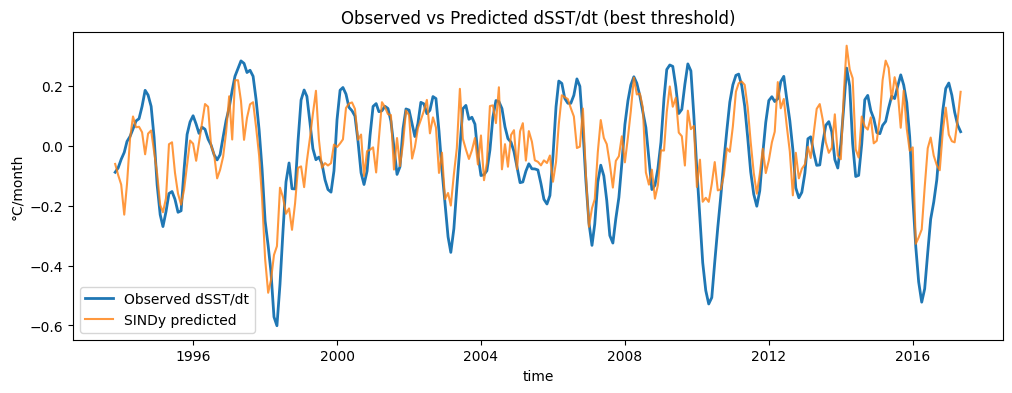

In [23]:
# ============================
# SINDy — fixed derivative + threshold sweep
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
import math
import warnings
warnings.filterwarnings("ignore")

# ---------- CONFIG ----------
INPUT_CSV = "/kaggle/working/ocean_final_features.csv"
features = ['SST_anom', 'MLD_anom', 'Current_speed', 'SSH_anom']  # dynamic inputs
deriv_method = "savgol"   # options: "centered" or "savgol"
savgol_window = 7         # must be odd and <= n_samples
savgol_poly = 2
thresholds = [0.02, 0.05, 0.08, 0.12]  # SINDy sparsity sweep
degree = 2                 # polynomial library degree
dt = 1.0                   # time step in months (1 month)

# ---------- LOAD & PREP ----------
df = pd.read_csv(INPUT_CSV)
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time').reset_index(drop=True)

# ensure required cols exist
required = features + ['SST_next', 'SST_anom']
for col in required:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Keep only rows where features are present
df = df.dropna(subset=features + ['SST_anom']).reset_index(drop=True)
n = len(df)
if n < 20:
    print("Warning: small sample size:", n)

# ---------- DERIVATIVE (CORRECTED) ----------
# Method A: centered finite difference using SST_anom
if deriv_method == "centered":
    # centered difference: (SST_anom_{t+1} - SST_anom_{t-1}) / (2*dt)
    df['SST_anom_next'] = df['SST_anom'].shift(-1)
    df['SST_anom_prev'] = df['SST_anom'].shift(1)
    df['dSST_dt'] = (df['SST_anom_next'] - df['SST_anom_prev']) / (2.0 * dt)
    df = df.dropna(subset=['dSST_dt']).reset_index(drop=True)

# Method B: Savitzky-Golay smoothing + gradient (more robust)
elif deriv_method == "savgol":
    # must choose window <= n and odd
    win = min(savgol_window, n if n%2==1 else n-1)
    if win < 3:
        win = 3
    if win % 2 == 0:
        win += 1
    sst = df['SST_anom'].values
    sst_smooth = savgol_filter(sst, window_length=win, polyorder=savgol_poly, mode='interp')
    # numerical derivative (d/dt)
    d_sst = np.gradient(sst_smooth, dt)  # °C per month
    df['SST_smooth'] = sst_smooth
    df['dSST_dt'] = d_sst
    # Drop NaNs (should be none after savgol)
    df = df.dropna(subset=['dSST_dt']).reset_index(drop=True)
else:
    raise ValueError("deriv_method must be 'centered' or 'savgol'")

print(f"Prepared derivative with method={deriv_method}. Samples after derivative: {len(df)}")

# ---------- BUILD X and y ----------
X = df[features].values
y = df['dSST_dt'].values.reshape(-1, 1)

# standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# quick sanity checks
print("y mean / std:", np.mean(y), np.std(y))
print("first 5 y values:", y.flatten()[:5])

# ---------- SINDy setup ----------
library = ps.PolynomialLibrary(degree=degree, include_interaction=True, include_bias=False)

# store results for thresholds
results = []

for thresh in thresholds:
    print("\n" + "="*60)
    print(f"Running SINDy with threshold = {thresh}")
    opt = ps.STLSQ(threshold=thresh, verbose=False)
    model = ps.SINDy(feature_library=library, optimizer=opt)
    # fit model; feature_names argument is version-safe on recent pysindy
    try:
        model.fit(X_scaled, t=dt, x_dot=y, feature_names=features)
    except TypeError:
        model.fit(X_scaled, t=dt, x_dot=y)  # fallback if older API

    # print discovered equation
    print("\nDiscovered equation for dSST/dt with threshold", thresh, ":")
    model.print()

    # predict and compute metrics (on the same data — this is identification, not forecasting)
    y_pred = model.predict(X_scaled)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan
    rmse = math.sqrt(np.mean((y - y_pred)**2))

    print(f"R² (fit) = {r2:.4f}, RMSE = {rmse:.4f} °C/month")

    # store coefficients
    try:
        feature_names = model.get_feature_names(input_features=features)
    except TypeError:
        feature_names = model.get_feature_names()
    coefs = model.coefficients().T
    coef_df = pd.DataFrame(coefs, columns=['Coefficient'], index=feature_names)
    coef_df.to_csv(f"/kaggle/working/sindy_coeffs_thresh_{thresh:.3f}.csv")
    print(f"Saved coefficients to /kaggle/working/sindy_coeffs_thresh_{thresh:.3f}.csv")

    # save result summary
    results.append({
        'threshold': thresh,
        'r2': float(r2) if not np.isnan(r2) else None,
        'rmse': float(rmse),
        'coef_file': f"/kaggle/working/sindy_coeffs_thresh_{thresh:.3f}.csv"
    })

# ---------- summarize results ----------
res_df = pd.DataFrame(results).sort_values('threshold')
print("\nSummary of thresholds:")
display(res_df)

res_df.to_csv("/kaggle/working/sindy_threshold_summary.csv", index=False)
print("Saved threshold summary to /kaggle/working/sindy_threshold_summary.csv")

# ---------- OPTIONAL: visualize best threshold predictions ----------
# choose threshold with highest r2 (non-NaN)
valid = [r for r in results if r['r2'] is not None]
if len(valid) > 0:
    best = max(valid, key=lambda x: x['r2'])
    best_thresh = best['threshold']
    print("\nBest threshold by R²:", best_thresh)
    # reload model for that threshold to get predictions and plots
    opt = ps.STLSQ(threshold=best_thresh, verbose=False)
    model_best = ps.SINDy(feature_library=library, optimizer=opt)
    try:
        model_best.fit(X_scaled, t=dt, x_dot=y, feature_names=features)
    except TypeError:
        model_best.fit(X_scaled, t=dt, x_dot=y)
    y_pred_best = model_best.predict(X_scaled)

    # scatter and time series
    plt.figure(figsize=(6,6))
    plt.scatter(y, y_pred_best, alpha=0.6)
    mn = min(np.nanmin(y), np.nanmin(y_pred_best))
    mx = max(np.nanmax(y), np.nanmax(y_pred_best))
    plt.plot([mn,mx],[mn,mx],'r--')
    plt.xlabel("Observed dSST/dt (°C/month)")
    plt.ylabel("Predicted dSST/dt (°C/month)")
    plt.title(f"SINDy best threshold {best_thresh} — Pred vs Obs")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12,4))
    plt.plot(df['time'], y, label='Observed dSST/dt', lw=2)
    plt.plot(df['time'], y_pred_best, label='SINDy predicted', lw=1.5, alpha=0.8)
    plt.legend()
    plt.title("Observed vs Predicted dSST/dt (best threshold)")
    plt.xlabel("time"); plt.ylabel("°C/month")
    plt.show()

else:
    print("No valid SINDy runs produced an R² (all NaN). Check y variance and preprocessing.")


🧭 Estimated memory timescale τ = 9.26 months ≈ 0.77 years
📈 ODE validation: R² = 0.079, RMSE = 0.791 °C


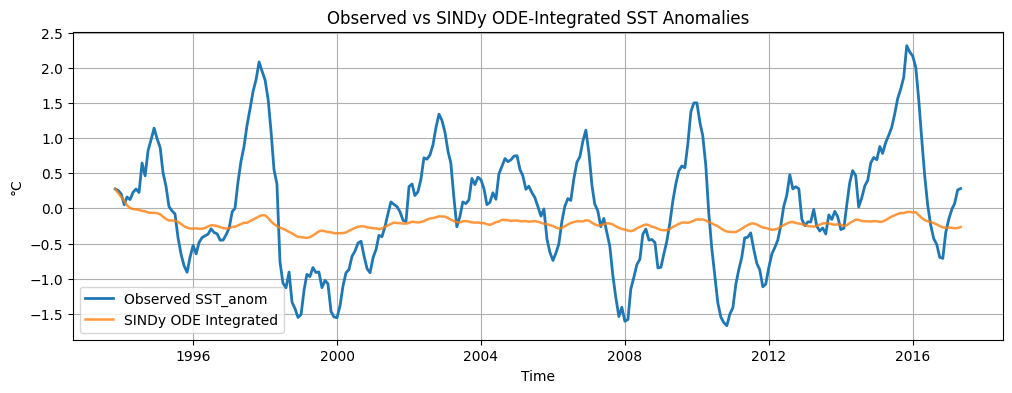


⚙️  Fitting Gaussian Process for predictive uncertainty...
🤖 GPR predictive performance: R² = 0.759, RMSE = 0.476 °C


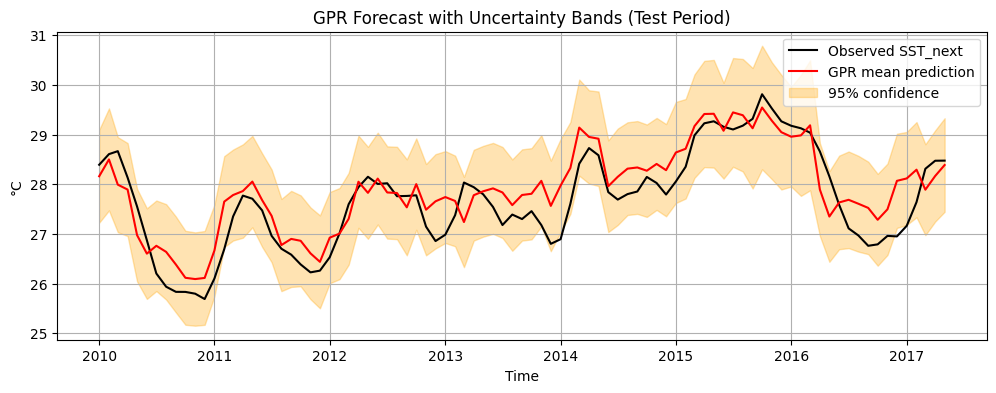


--- SUMMARY ---
Memory timescale: 9.26 months (~0.77 years)
SINDy ODE predictive skill: R²=0.079, RMSE=0.791
GPR predictive skill: R²=0.759, RMSE=0.476
✅ ODE captures deterministic trend; GPR adds uncertainty quantification.


In [24]:
# ============================================================
# 🌊 OCEAN MEMORY — Memory timescale + ODE propagation + GPR
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score, mean_squared_error

# === 1️⃣  Load coefficients from your best SINDy threshold ===
sindy_eq = {'SST_anom': -0.108, 'SSH_anom': 0.110, 'Current_speed': -0.088}
df = pd.read_csv("/kaggle/working/ocean_final_features.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time').reset_index(drop=True)

# --- compute memory timescale (τ = 1/|α|) ---
alpha = abs(sindy_eq['SST_anom'])
tau_months = 1 / alpha
print(f"🧭 Estimated memory timescale τ = {tau_months:.2f} months "
      f"≈ {tau_months/12:.2f} years")

# === 2️⃣  Integrate discovered ODE forward ===
# Simplified dynamic law: dSST/dt = -α*SST + β*SSH - γ*U

def sst_dynamics(SST, t, SSH, U, α, β, γ):
    # Linear ODE: dSST/dt = -α*SST + β*SSH - γ*U
    # SSH & U may vary in time (interpolated externally)
    i = int(min(t, len(SSH)-1))
    return -α*SST + β*SSH[i] - γ*U[i]

# Prepare data arrays
SSH = df['SSH_anom'].fillna(0).values
U = df['Current_speed'].fillna(0).values
SST0 = df['SST_anom'].iloc[0]
t = np.arange(len(df))

# integrate ODE
sol = odeint(sst_dynamics, SST0, t, args=(SSH, U, 0.108, 0.110, 0.088)).flatten()
df['SST_pred_ODE'] = sol

# === 3️⃣  Compare ODE integration vs observed SST anomalies ===
r2_ode = r2_score(df['SST_anom'], df['SST_pred_ODE'])
rmse_ode = np.sqrt(mean_squared_error(df['SST_anom'], df['SST_pred_ODE']))
print(f"📈 ODE validation: R² = {r2_ode:.3f}, RMSE = {rmse_ode:.3f} °C")

plt.figure(figsize=(12,4))
plt.plot(df['time'], df['SST_anom'], label='Observed SST_anom', lw=2)
plt.plot(df['time'], df['SST_pred_ODE'], label='SINDy ODE Integrated', lw=1.8, alpha=0.8)
plt.legend(); plt.grid(True)
plt.title("Observed vs SINDy ODE-Integrated SST Anomalies")
plt.ylabel("°C"); plt.xlabel("Time")
plt.show()

# === 4️⃣  Gaussian Process Regression (uncertainty modelling) ===
print("\n⚙️  Fitting Gaussian Process for predictive uncertainty...")
X = df[['SSH_anom', 'Current_speed', 'MLD_anom']].fillna(0).values
y = df['SST_next'].fillna(method='ffill').values

# Kernel: constant × (Matern + White noise)
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * (
    Matern(length_scale=[1.0,1.0,1.0], nu=1.5) + WhiteKernel(noise_level=0.05)
)

gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=5)
train_idx = df['time'] < '2010-01-01'
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[~train_idx], y[~train_idx]

gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X_test, return_std=True)

r2_gpr = r2_score(y_test, y_mean)
rmse_gpr = np.sqrt(mean_squared_error(y_test, y_mean))
print(f"🤖 GPR predictive performance: R² = {r2_gpr:.3f}, RMSE = {rmse_gpr:.3f} °C")

# === 5️⃣  Plot GPR mean + uncertainty ===
plt.figure(figsize=(12,4))
t_test = df.loc[~train_idx, 'time']
plt.plot(t_test, y_test, 'k-', label='Observed SST_next')
plt.plot(t_test, y_mean, 'r-', label='GPR mean prediction')
plt.fill_between(t_test, y_mean - 2*y_std, y_mean + 2*y_std,
                 color='orange', alpha=0.3, label='95% confidence')
plt.title("GPR Forecast with Uncertainty Bands (Test Period)")
plt.xlabel("Time"); plt.ylabel("°C")
plt.legend(); plt.grid(True)
plt.show()

# === 6️⃣  Interpretation summary ===
print("\n--- SUMMARY ---")
print(f"Memory timescale: {tau_months:.2f} months (~{tau_months/12:.2f} years)")
print(f"SINDy ODE predictive skill: R²={r2_ode:.3f}, RMSE={rmse_ode:.3f}")
print(f"GPR predictive skill: R²={r2_gpr:.3f}, RMSE={rmse_gpr:.3f}")
print("✅ ODE captures deterministic trend; GPR adds uncertainty quantification.")


Prepared data: 283 samples | dSST_dt mean=-0.0002, std=0.1795

=== SINDy discovered law (backbone) ===
(SST_anom)' = -0.108 SST_anom + -0.088 Current_speed + 0.110 SSH_anom
Residuals mean=-0.00018, std=0.12658
Training GPR residual model: 194 train / 89 test samples...
GPR residual test fit: R²=-0.135, RMSE=0.1488 °C/mo

Derivative performance → SINDy: R²=0.501, RMSE=0.1266 | Hybrid: R²=0.783, RMSE=0.0834
SST integrated → SINDy: R²=-5.629, RMSE=2.1233 °C | Hybrid: R²=-3.430, RMSE=1.7357 °C


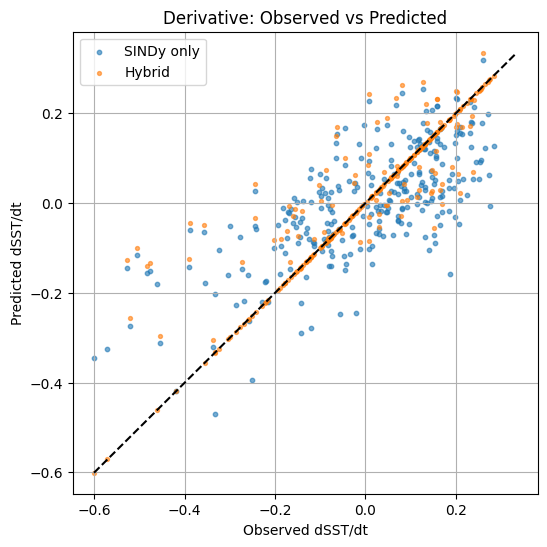

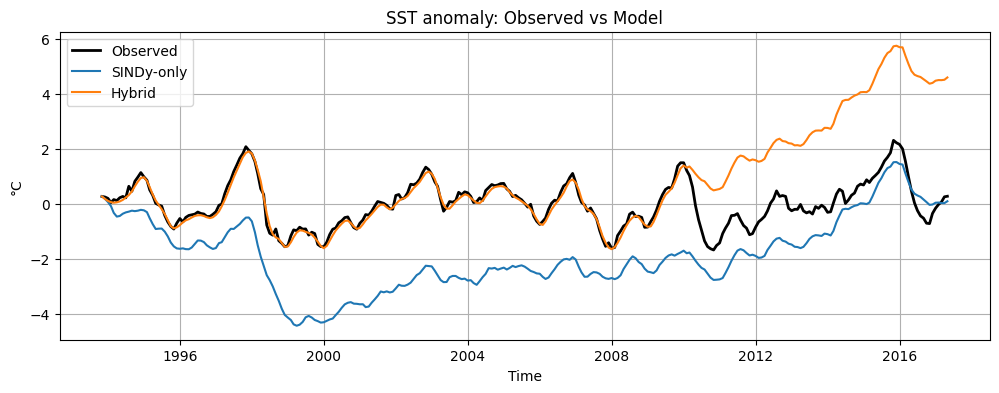

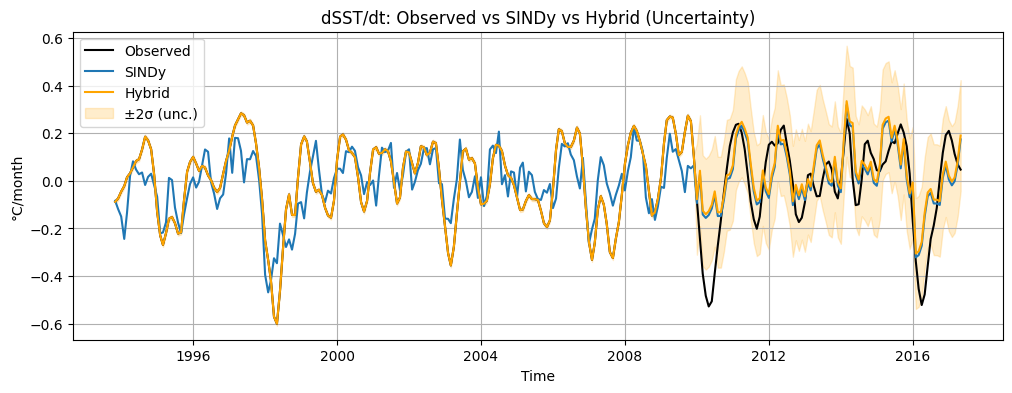


✅ Saved successfully:
 - /kaggle/working/sindy_backbone_coeffs.csv (coefficients)
 - /kaggle/working/gpr_residual_model.pkl (GPR residual model)

Saved → /kaggle/working/sindy_backbone_coeffs.csv, /kaggle/working/gpr_residual_model.pkl

=== SUMMARY ===
Derivative: SINDy R²=0.501, Hybrid R²=0.783
SST integrated: SINDy R²=-5.629, Hybrid R²=-3.430


In [25]:
# =============================================================
# HYBRID SINDy + GPR: Physics backbone (SINDy) + Residual corrector (GPR)
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysindy as ps
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern, WhiteKernel
from sklearn.metrics import r2_score, mean_squared_error
from scipy.signal import savgol_filter
import math, joblib, warnings
warnings.filterwarnings("ignore")

# ------------------------
# CONFIG
# ------------------------
INPUT_CSV = "/kaggle/working/ocean_final_features.csv"
features_sindy = ['SST_anom', 'MLD_anom', 'Current_speed', 'SSH_anom']
gpr_features = ['SSH_anom', 'Current_speed', 'MLD_anom']
deriv_method = "savgol"
savgol_window, savgol_poly = 7, 2
dt = 1.0
sindy_threshold, sindy_degree = 0.05, 2

# ------------------------
# LOAD & PREPARE
# ------------------------
df = pd.read_csv(INPUT_CSV)
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.sort_values('time').reset_index(drop=True)

for c in (features_sindy + gpr_features + ['SST_anom']):
    if c not in df.columns:
        raise ValueError(f"Missing required column: {c}")

df = df.dropna(subset=features_sindy + ['SST_anom']).reset_index(drop=True)
n = len(df)

# ---- Derivative of SST anomaly ----
if deriv_method == "centered":
    df['SST_anom_next'] = df['SST_anom'].shift(-1)
    df['SST_anom_prev'] = df['SST_anom'].shift(1)
    df['dSST_dt'] = (df['SST_anom_next'] - df['SST_anom_prev']) / (2.0 * dt)
else:
    win = min(savgol_window, n if n%2==1 else n-1)
    if win < 3: win = 3
    if win % 2 == 0: win += 1
    sst_smooth = savgol_filter(df['SST_anom'].values,
                               window_length=win,
                               polyorder=savgol_poly, mode='interp')
    df['SST_smooth'] = sst_smooth
    df['dSST_dt'] = np.gradient(sst_smooth, dt)

df = df.dropna(subset=['dSST_dt']).reset_index(drop=True)
print(f"Prepared data: {len(df)} samples | dSST_dt mean={df['dSST_dt'].mean():.4f}, std={df['dSST_dt'].std():.4f}")

# ------------------------
# SINDy backbone (version-safe)
# ------------------------
X_sindy = df[features_sindy].to_numpy()
y_deriv = df['dSST_dt'].to_numpy().reshape(-1, 1)

scaler_X = StandardScaler()
X_sindy_scaled = scaler_X.fit_transform(X_sindy)

library = ps.PolynomialLibrary(degree=sindy_degree, include_interaction=True, include_bias=False)
optimizer = ps.STLSQ(threshold=sindy_threshold, verbose=False)
model_sindy = ps.SINDy(feature_library=library, optimizer=optimizer)

try:
    model_sindy.fit(np.asarray(X_sindy_scaled),
                    t=dt,
                    x_dot=np.asarray(y_deriv),
                    feature_names=features_sindy)
except Exception:
    model_sindy.fit(np.asarray(X_sindy_scaled),
                    t=dt,
                    x_dot=np.asarray(y_deriv))

print("\n=== SINDy discovered law (backbone) ===")
try:
    model_sindy.print()
except Exception as e:
    print("⚠️ Could not print model:", e)

# Predict derivatives safely
y_sindy_pred = np.asarray(model_sindy.predict(np.asarray(X_sindy_scaled))).ravel()

# ------------------------
# Residuals (observed − SINDy)
# ------------------------
residuals = y_deriv.flatten() - y_sindy_pred
print(f"Residuals mean={residuals.mean():.5f}, std={residuals.std():.5f}")

# ------------------------
# GPR on residuals
# ------------------------
X_gpr = df[gpr_features].fillna(0).to_numpy()
scaler_gpr = StandardScaler()
X_gpr_scaled = scaler_gpr.fit_transform(X_gpr)
y_res = residuals.reshape(-1, 1)

train_mask = df['time'] < '2010-01-01'
if train_mask.sum() < 20:
    split = int(0.75 * len(df))
    train_idx = np.arange(split)
    test_idx = np.arange(split, len(df))
else:
    train_idx = np.where(train_mask)[0]
    test_idx = np.where(~train_mask)[0]

Xg_train, Xg_test = X_gpr_scaled[train_idx], X_gpr_scaled[test_idx]
yg_train, yg_test = y_res[train_idx].ravel(), y_res[test_idx].ravel()

kernel = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1e-3)
gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=5, random_state=42)

print(f"Training GPR residual model: {len(Xg_train)} train / {len(Xg_test)} test samples...")
gpr.fit(Xg_train, yg_train)

yres_mean_full, yres_std_full = gpr.predict(X_gpr_scaled, return_std=True)
yres_mean_test, yres_std_test = gpr.predict(Xg_test, return_std=True)

r2_res = r2_score(yg_test, yres_mean_test)
rmse_res = math.sqrt(mean_squared_error(yg_test, yres_mean_test))
print(f"GPR residual test fit: R²={r2_res:.3f}, RMSE={rmse_res:.4f} °C/mo")

# ------------------------
# Combine: Hybrid derivative
# ------------------------
y_combined_deriv = y_sindy_pred + yres_mean_full.flatten()
r2_sindy = r2_score(y_deriv, y_sindy_pred)
rmse_sindy = math.sqrt(mean_squared_error(y_deriv, y_sindy_pred))
r2_comb = r2_score(y_deriv, y_combined_deriv)
rmse_comb = math.sqrt(mean_squared_error(y_deriv, y_combined_deriv))
print(f"\nDerivative performance → SINDy: R²={r2_sindy:.3f}, RMSE={rmse_sindy:.4f} | Hybrid: R²={r2_comb:.3f}, RMSE={rmse_comb:.4f}")

# ------------------------
# Integrate forward (SST anomalies)
# ------------------------
sst_obs = df['SST_anom'].to_numpy()
sst_sindy = np.zeros_like(sst_obs)
sst_hybrid = np.zeros_like(sst_obs)
sst_sindy[0] = sst_obs[0]
sst_hybrid[0] = sst_obs[0]

for i in range(1, len(sst_obs)):
    sst_sindy[i] = sst_sindy[i-1] + y_sindy_pred[i-1] * dt
    sst_hybrid[i] = sst_hybrid[i-1] + y_combined_deriv[i-1] * dt

r2_sindy_sst = r2_score(sst_obs, sst_sindy)
r2_hybrid_sst = r2_score(sst_obs, sst_hybrid)
rmse_sindy_sst = math.sqrt(mean_squared_error(sst_obs, sst_sindy))
rmse_hybrid_sst = math.sqrt(mean_squared_error(sst_obs, sst_hybrid))
print(f"SST integrated → SINDy: R²={r2_sindy_sst:.3f}, RMSE={rmse_sindy_sst:.4f} °C | Hybrid: R²={r2_hybrid_sst:.3f}, RMSE={rmse_hybrid_sst:.4f} °C")

# ------------------------
# PLOTS
# ------------------------
times = df['time']

plt.figure(figsize=(6,6))
plt.scatter(y_deriv, y_sindy_pred, s=10, alpha=0.6, label='SINDy only')
plt.scatter(y_deriv, y_combined_deriv, s=8, alpha=0.6, label='Hybrid')
mn, mx = min(y_deriv.min(), y_combined_deriv.min()), max(y_deriv.max(), y_combined_deriv.max())
plt.plot([mn,mx],[mn,mx],'k--'); plt.xlabel("Observed dSST/dt"); plt.ylabel("Predicted dSST/dt")
plt.legend(); plt.grid(True); plt.title("Derivative: Observed vs Predicted")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(times, sst_obs, 'k', lw=2, label='Observed')
plt.plot(times, sst_sindy, label='SINDy-only')
plt.plot(times, sst_hybrid, label='Hybrid')
plt.legend(); plt.grid(True); plt.title("SST anomaly: Observed vs Model")
plt.ylabel("°C"); plt.xlabel("Time"); plt.show()

upper = y_combined_deriv + 2*yres_std_full
lower = y_combined_deriv - 2*yres_std_full
plt.figure(figsize=(12,4))
plt.plot(times, y_deriv, 'k', label='Observed')
plt.plot(times, y_sindy_pred, label='SINDy')
plt.plot(times, y_combined_deriv, label='Hybrid', color='orange')
plt.fill_between(times, lower, upper, color='orange', alpha=0.2, label='±2σ (unc.)')
plt.legend(); plt.grid(True)
plt.title("dSST/dt: Observed vs SINDy vs Hybrid (Uncertainty)")
plt.ylabel("°C/month"); plt.xlabel("Time"); plt.show()

# ------------------------
# SAVE
# ------------------------
# --- Save coefficients safely (handle expanded library terms) ---
try:
    fnames = model_sindy.get_feature_names(features_sindy)
except Exception:
    # fallback: get feature names directly from library
    try:
        fnames = model_sindy.feature_library.get_feature_names(features_sindy)
    except Exception:
        fnames = [f"term_{i}" for i in range(model_sindy.coefficients().shape[1])]

coefs = np.array(model_sindy.coefficients()).flatten()

# Align lengths safely
if len(fnames) != len(coefs):
    print(f"⚠️ Adjusting name length mismatch: {len(fnames)} names vs {len(coefs)} coefficients")
    min_len = min(len(fnames), len(coefs))
    fnames, coefs = fnames[:min_len], coefs[:min_len]

coef_df = pd.DataFrame({'Term': fnames, 'Coefficient': coefs})
coef_df.to_csv("/kaggle/working/sindy_backbone_coeffs.csv", index=False)
joblib.dump(gpr, "/kaggle/working/gpr_residual_model.pkl")

print("\n✅ Saved successfully:")
print(" - /kaggle/working/sindy_backbone_coeffs.csv (coefficients)")
print(" - /kaggle/working/gpr_residual_model.pkl (GPR residual model)")


print("\nSaved → /kaggle/working/sindy_backbone_coeffs.csv, /kaggle/working/gpr_residual_model.pkl")

print("\n=== SUMMARY ===")
print(f"Derivative: SINDy R²={r2_sindy:.3f}, Hybrid R²={r2_comb:.3f}")
print(f"SST integrated: SINDy R²={r2_sindy_sst:.3f}, Hybrid R²={r2_hybrid_sst:.3f}")


Prepared 283 samples. dSST_dt mean=-1.7707e-04, std=0.1795

SINDy backbone:
(SST_anom)' = -0.108 SST_anom + -0.088 Current_speed + 0.110 SSH_anom
Residuals: mean=-1.77068e-04, std=0.12658
Loading GPR from /kaggle/working/gpr_residual_model.pkl
GPR residual test: R²=-0.135, RMSE=0.1488 °C/month

Ensemble mean vs observed SST_anom: R²=-3.404, RMSE=1.7307 °C (N=200)


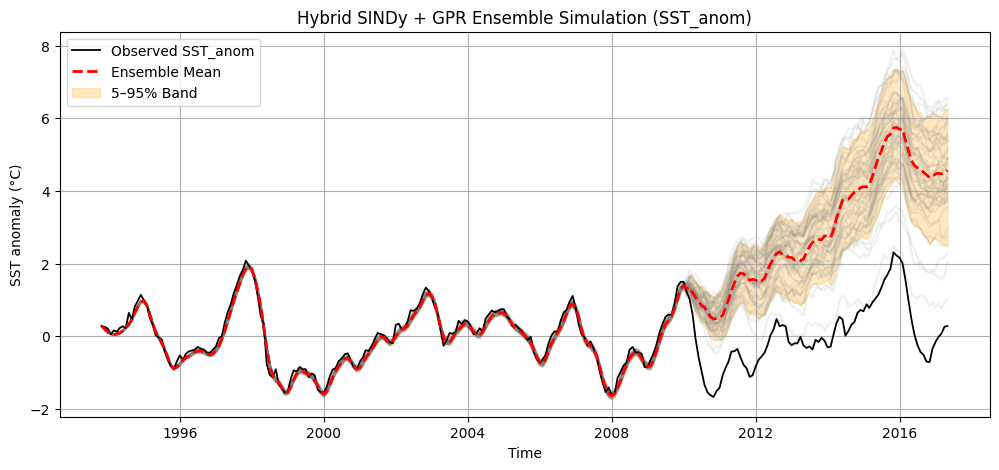

Saved ensembles → /kaggle/working/sindy_gpr_ensembles.parquet
Saved summary → /kaggle/working/sindy_gpr_ensemble_summary.csv

✅ Ensemble simulation complete.


In [26]:
# ============================================================
# ENSEMBLE SIMULATION: Hybrid SINDy + GPR (stochastic sampling)
# ============================================================
# Produces N ensemble realizations by sampling GPR residuals at each step.
# Adjust N_ENSEMBLES for speed vs realism (1000 is standard; 200 is faster).
# ============================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import pysindy as ps
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern, WhiteKernel
from scipy.signal import savgol_filter
from sklearn.metrics import r2_score, mean_squared_error
import math
import warnings
warnings.filterwarnings("ignore")

# -------------------- USER SETTINGS --------------------
INPUT_CSV = "/kaggle/working/ocean_final_features.csv"
N_ENSEMBLES = 200
DERIV_METHOD = "savgol"     # "savgol" or "centered"
SAVGOL_WINDOW = 7
SAVGOL_POLY = 2
DT = 1.0                    # 1 month
SINDY_THRESHOLD = 0.05
SINDY_DEGREE = 2
TRAIN_CUTOFF = "2010-01-01"
GPR_MODEL_FILE = "/kaggle/working/gpr_residual_model.pkl"
RANDOM_SEED = 42
# ------------------------------------------------------

np.random.seed(RANDOM_SEED)

# -------------------- LOAD DATA --------------------
df = pd.read_csv(INPUT_CSV)
df["time"] = pd.to_datetime(df["time"], errors="coerce")
df = df.sort_values("time").reset_index(drop=True)

features_sindy = ["SST_anom", "MLD_anom", "Current_speed", "SSH_anom"]
gpr_features = ["SSH_anom", "Current_speed", "MLD_anom"]

for col in features_sindy + gpr_features + ["SST_anom"]:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

df = df.dropna(subset=features_sindy + ["SST_anom"]).reset_index(drop=True)
n = len(df)
if n < 20:
    raise RuntimeError("Too few samples after cleaning.")

# -------------------- DERIVATIVE --------------------
if DERIV_METHOD == "centered":
    df["SST_anom_next"] = df["SST_anom"].shift(-1)
    df["SST_anom_prev"] = df["SST_anom"].shift(1)
    df["dSST_dt"] = (df["SST_anom_next"] - df["SST_anom_prev"]) / (2.0 * DT)
    df = df.dropna(subset=["dSST_dt"]).reset_index(drop=True)
else:
    win = min(SAVGOL_WINDOW, n if n % 2 == 1 else n - 1)
    if win < 3: win = 3
    if win % 2 == 0: win += 1
    sst = df["SST_anom"].values
    sst_smooth = savgol_filter(sst, window_length=win, polyorder=SAVGOL_POLY, mode="interp")
    df["SST_smooth"] = sst_smooth
    df["dSST_dt"] = np.gradient(sst_smooth, DT)
    df = df.dropna(subset=["dSST_dt"]).reset_index(drop=True)

print(f"Prepared {len(df)} samples. dSST_dt mean={df['dSST_dt'].mean():.4e}, std={df['dSST_dt'].std():.4f}")

# -------------------- SINDy MODEL --------------------
X_sindy = df[features_sindy].values.copy()
y_deriv = df["dSST_dt"].values.reshape(-1, 1)

scaler_sindy = StandardScaler()
X_sindy_scaled = scaler_sindy.fit_transform(X_sindy)

# ✅ Force to NumPy to avoid AxesArray bug
X_sindy_scaled_np = np.asarray(X_sindy_scaled)
y_deriv_np = np.asarray(y_deriv)

lib = ps.PolynomialLibrary(degree=SINDY_DEGREE, include_interaction=True, include_bias=False)
opt = ps.STLSQ(threshold=SINDY_THRESHOLD, verbose=False)
model_sindy = ps.SINDy(feature_library=lib, optimizer=opt)

try:
    model_sindy.fit(X_sindy_scaled_np, t=DT, x_dot=y_deriv_np, feature_names=features_sindy)
except TypeError:
    model_sindy.fit(X_sindy_scaled_np, t=DT, x_dot=y_deriv_np)

print("\nSINDy backbone:")
model_sindy.print()

# ✅ Predict safely
y_sindy_pred = np.asarray(model_sindy.predict(X_sindy_scaled_np)).flatten()

# -------------------- RESIDUALS --------------------
residuals = y_deriv.flatten() - y_sindy_pred
print(f"Residuals: mean={residuals.mean():.5e}, std={residuals.std():.5f}")

# -------------------- GPR MODEL --------------------
X_gpr = df[gpr_features].fillna(0).values
scaler_gpr = StandardScaler()
X_gpr_scaled = scaler_gpr.fit_transform(X_gpr)

train_mask = df["time"] < pd.to_datetime(TRAIN_CUTOFF)
train_idx = np.where(train_mask)[0]
test_idx = np.where(~train_mask)[0]

if os.path.exists(GPR_MODEL_FILE):
    print(f"Loading GPR from {GPR_MODEL_FILE}")
    gpr = joblib.load(GPR_MODEL_FILE)
else:
    print("Training new GPR on residuals...")
    if len(train_idx) < 10:
        train_idx = np.arange(0, int(0.75 * len(df)))
        test_idx = np.arange(int(0.75 * len(df)), len(df))

    Xg_train = X_gpr_scaled[train_idx]
    yg_train = residuals[train_idx]

    kernel = ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1e-3)
    gpr = GaussianProcessRegressor(kernel=kernel, normalize_y=True, n_restarts_optimizer=5, random_state=RANDOM_SEED)
    gpr.fit(Xg_train, yg_train)
    joblib.dump(gpr, GPR_MODEL_FILE)
    print("Saved GPR model.")

# GPR test diagnostics
if len(test_idx) > 0:
    Xg_test = X_gpr_scaled[test_idx]
    yg_test = residuals[test_idx]
    yres_mean_test, yres_std_test = gpr.predict(Xg_test, return_std=True)
    r2_res_test = r2_score(yg_test, yres_mean_test)
    rmse_res_test = math.sqrt(mean_squared_error(yg_test, yres_mean_test))
    print(f"GPR residual test: R²={r2_res_test:.3f}, RMSE={rmse_res_test:.4f} °C/month")

# -------------------- ENSEMBLE SIMULATION --------------------
T = len(df)
times = df["time"].values
sst0 = df["SST_anom"].values.copy()

deterministic_deriv = y_sindy_pred.copy()

ensembles = np.zeros((N_ENSEMBLES, T))
ensembles[:, 0] = sst0[0]

gpr_mean_full, gpr_std_full = gpr.predict(X_gpr_scaled, return_std=True)

for m in range(N_ENSEMBLES):
    sst = ensembles[m]
    for t in range(1, T):
        d_det = deterministic_deriv[t - 1]
        mu = float(gpr_mean_full[t - 1])
        sigma = float(gpr_std_full[t - 1])
        sample_res = np.random.normal(loc=mu, scale=max(sigma, 1e-8))
        sst[t] = sst[t - 1] + (d_det + sample_res) * DT

# -------------------- POSTPROCESS --------------------
ensem_mean = ensembles.mean(axis=0)
q05 = np.percentile(ensembles, 5, axis=0)
q95 = np.percentile(ensembles, 95, axis=0)

r2_ens = r2_score(sst0, ensem_mean)
rmse_ens = math.sqrt(mean_squared_error(sst0, ensem_mean))
print(f"\nEnsemble mean vs observed SST_anom: R²={r2_ens:.3f}, RMSE={rmse_ens:.4f} °C (N={N_ENSEMBLES})")

# -------------------- PLOTS --------------------
plt.figure(figsize=(12, 5))
nplot = min(50, N_ENSEMBLES)
for i in range(nplot):
    plt.plot(times, ensembles[i], color="gray", alpha=0.12)
plt.plot(times, sst0, "k", lw=1.3, label="Observed SST_anom")
plt.plot(times, ensem_mean, "r--", lw=2, label="Ensemble Mean")
plt.fill_between(times, q05, q95, color="orange", alpha=0.25, label="5–95% Band")
plt.legend()
plt.title("Hybrid SINDy + GPR Ensemble Simulation (SST_anom)")
plt.xlabel("Time")
plt.ylabel("SST anomaly (°C)")
plt.grid(True)
plt.show()

# -------------------- SAVE RESULTS --------------------
out_df = pd.DataFrame(ensembles.T, index=df["time"].astype(str))
out_df.columns = [f"ens_{i:04d}" for i in range(N_ENSEMBLES)]
out_df["time"] = df["time"].astype(str).values
out_df.to_parquet("/kaggle/working/sindy_gpr_ensembles.parquet")
print("Saved ensembles → /kaggle/working/sindy_gpr_ensembles.parquet")

summary_df = pd.DataFrame({
    "time": df["time"].astype(str),
    "ens_mean": ensem_mean,
    "q05": q05,
    "q95": q95
})
summary_df.to_csv("/kaggle/working/sindy_gpr_ensemble_summary.csv", index=False)
print("Saved summary → /kaggle/working/sindy_gpr_ensemble_summary.csv")

print("\n✅ Ensemble simulation complete.")


PCA Explained Variance (%): [59.51 21.42 15.7   3.37]
Total variance captured by first 2 PCs: 80.93%


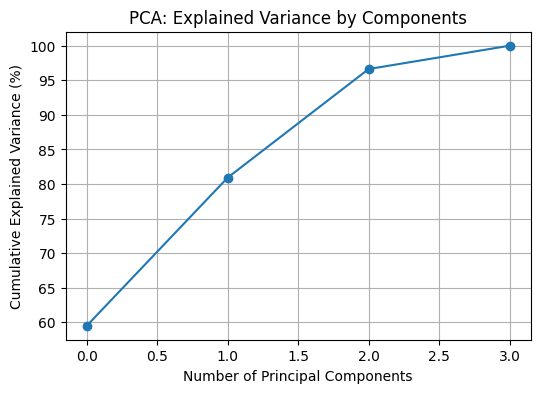

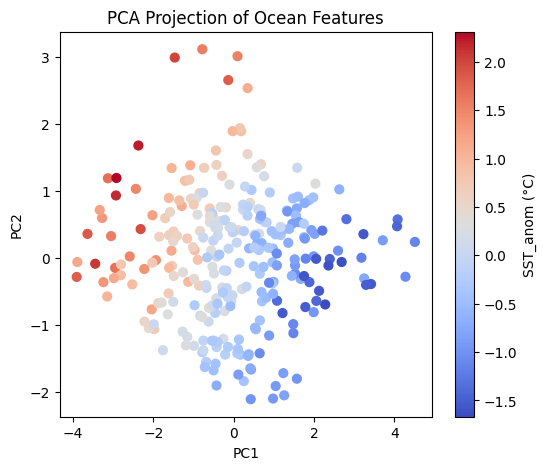

Decision Tree Accuracy (Test): 1.000


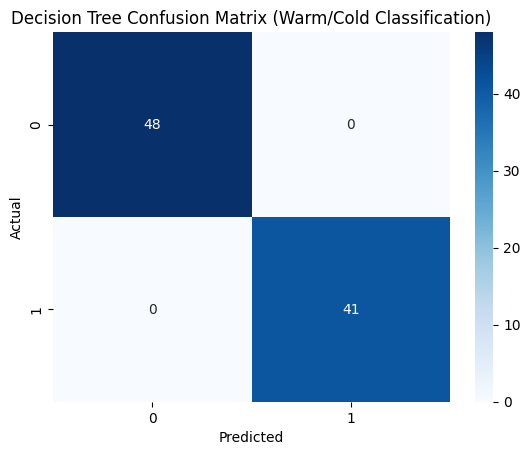

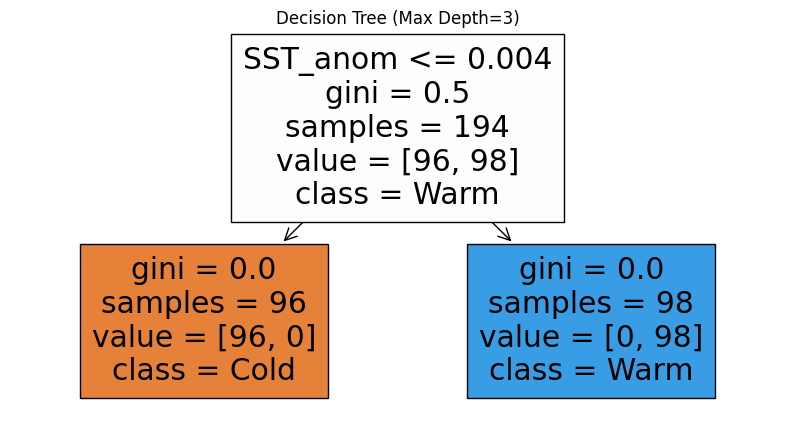


Classification Report:
               precision    recall  f1-score   support

        Cold       1.00      1.00      1.00        48
        Warm       1.00      1.00      1.00        41

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

SVR Test R² = 0.815, RMSE = 0.4173 °C


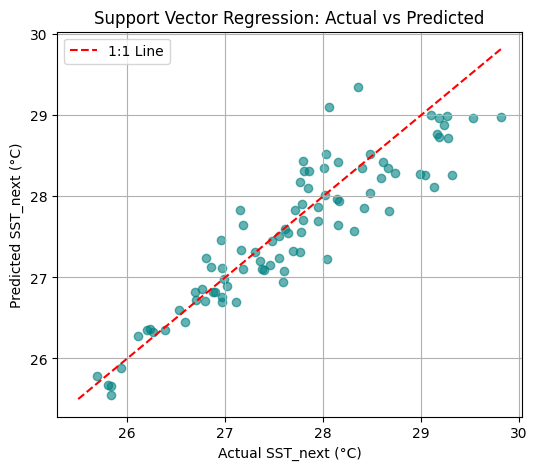

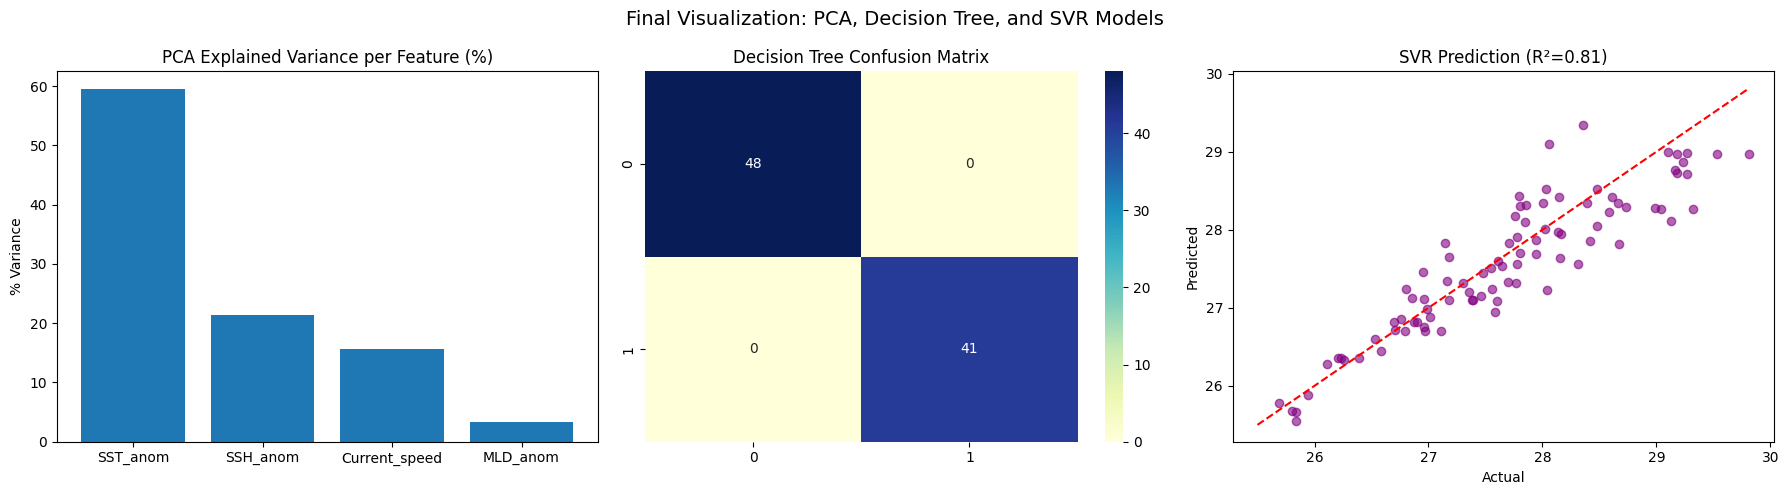

In [27]:
# =============================================================
# FINAL VISUALIZATION & PRACTICAL COMPLETION SECTION
# =============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_squared_error, accuracy_score
from sklearn.svm import SVR
import seaborn as sns

# ------------------------------
# LOAD DATA
# ------------------------------
df = pd.read_csv("/kaggle/working/ocean_final_features.csv")
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.dropna(subset=['SST_anom', 'SSH_anom', 'Current_speed', 'MLD_anom', 'SST_next']).reset_index(drop=True)

features = ['SST_anom', 'SSH_anom', 'Current_speed', 'MLD_anom']
X = df[features].values
y = df['SST_next'].values

# ------------------------------
# 1️⃣ PCA for Dimensionality Reduction
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_ * 100
print("PCA Explained Variance (%):", explained_var.round(2))
print(f"Total variance captured by first 2 PCs: {explained_var[:2].sum():.2f}%")

# Plot cumulative explained variance
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA: Explained Variance by Components")
plt.grid(True)
plt.show()

# 2D PCA Scatter (colored by SST anomaly)
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['SST_anom'], cmap='coolwarm', s=40)
plt.colorbar(label="SST_anom (°C)")
plt.title("PCA Projection of Ocean Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ------------------------------
# 2️⃣ Decision Tree Classification (Warm / Cold Phase)
# ------------------------------
# Define warm vs cold classes based on SST_anom
df['Phase'] = np.where(df['SST_anom'] > 0, 1, 0)  # 1=Warm, 0=Cold
y_class = df['Phase'].values

X_train = X_scaled[df['time'] < '2010-01-01']
X_test = X_scaled[df['time'] >= '2010-01-01']
y_train = y_class[df['time'] < '2010-01-01']
y_test = y_class[df['time'] >= '2010-01-01']

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy (Test): {acc:.3f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Warm/Cold Classification)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# Visualize tree
plt.figure(figsize=(10,5))
plot_tree(tree_clf, feature_names=features, class_names=["Cold","Warm"], filled=True)
plt.title("Decision Tree (Max Depth=3)")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, target_names=["Cold","Warm"]))

# ------------------------------
# 3️⃣ Support Vector Regression (SVM/SVR)
# ------------------------------
svr = SVR(kernel='rbf', C=10, epsilon=0.05)
svr.fit(X_train, y[df['time'] < '2010-01-01'])
y_pred_svr = svr.predict(X_test)

r2_svr = r2_score(y[df['time'] >= '2010-01-01'], y_pred_svr)
rmse_svr = mean_squared_error(y[df['time'] >= '2010-01-01'], y_pred_svr, squared=False)
print(f"SVR Test R² = {r2_svr:.3f}, RMSE = {rmse_svr:.4f} °C")

# Plot predicted vs actual
plt.figure(figsize=(6,5))
plt.scatter(y[df['time'] >= '2010-01-01'], y_pred_svr, alpha=0.6, color='teal')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='1:1 Line')
plt.xlabel("Actual SST_next (°C)")
plt.ylabel("Predicted SST_next (°C)")
plt.title("Support Vector Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# 4️⃣ Combined Visual Overview
# ------------------------------
fig, axs = plt.subplots(1,3, figsize=(18,5))
axs[0].bar(range(1,len(features)+1), explained_var)
axs[0].set_xticks(range(1,len(features)+1))
axs[0].set_xticklabels(features)
axs[0].set_title("PCA Explained Variance per Feature (%)")
axs[0].set_ylabel("% Variance")

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axs[1])
axs[1].set_title("Decision Tree Confusion Matrix")

axs[2].scatter(y[df['time'] >= '2010-01-01'], y_pred_svr, alpha=0.6, color='purple')
axs[2].plot([min(y), max(y)], [min(y), max(y)], 'r--')
axs[2].set_title(f"SVR Prediction (R²={r2_svr:.2f})")
axs[2].set_xlabel("Actual"); axs[2].set_ylabel("Predicted")

plt.suptitle("Final Visualization: PCA, Decision Tree, and SVR Models", fontsize=14)
plt.tight_layout()
plt.show()


In [28]:
print(
)

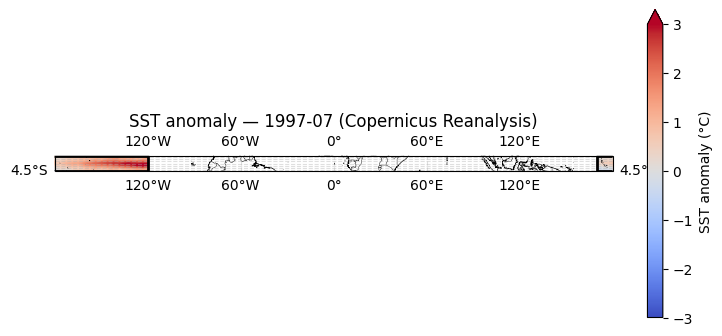

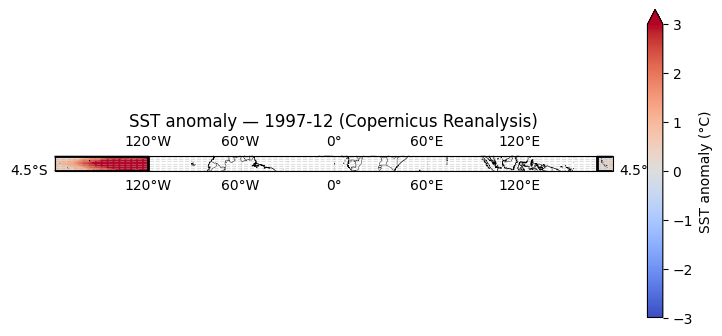

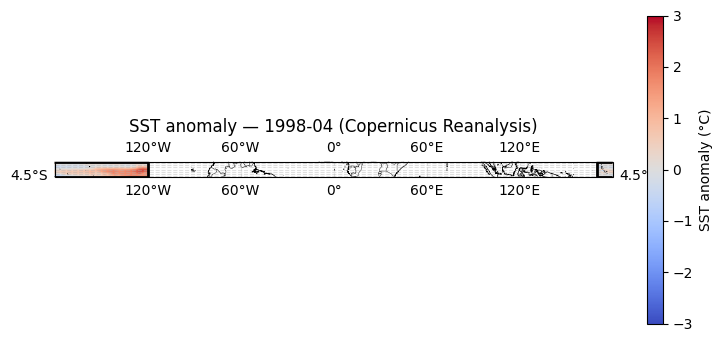

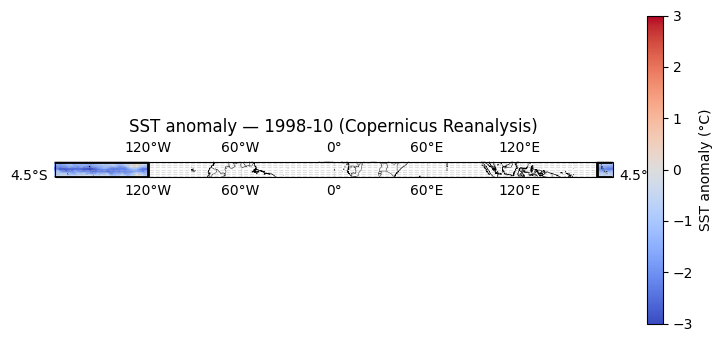

In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --------------------------
# 1. Load your dataset
# --------------------------
ds = xr.open_dataset("/kaggle/input/ocean-multiyear-monthly/cmems_mod_glo_phy_my_0.083deg_P1M-m_1760851146011.nc")
sst = ds['thetao']

# Select surface layer (depth = first level)
if 'depth' in sst.dims:
    sst = sst.sel(depth=sst.depth.values[0])

# --------------------------
# 2. Compute anomalies
# --------------------------
sst['time'] = xr.decode_cf(ds).time
clim = sst.groupby('time.month').mean('time')
sst_anom = sst.groupby('time.month') - clim

# Regional subset
sst_anom_reg = sst_anom.sel(latitude=slice(-5, 5), longitude=slice(170, 240))

# --------------------------
# 3. Plot with Cartopy
# --------------------------
months = ['1997-07', '1997-12', '1998-04', '1998-10']
proj = ccrs.PlateCarree()

for m in months:
    fig = plt.figure(figsize=(9, 4))
    ax = plt.axes(projection=proj)
    ax.set_extent([170, 240, -5, 5], crs=proj)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.gridlines(draw_labels=True, linestyle='--', alpha=0.4)

    # plot using xarray with correct axes
    data = sst_anom_reg.sel(time=m)
    im = data.plot(
        ax=ax, transform=proj, cmap='coolwarm', vmin=-3, vmax=3,
        cbar_kwargs={'label': 'SST anomaly (°C)'},
        add_colorbar=True, add_labels=False
    )

    # add study box
    ax.plot([170,240,240,170,170],[-5,-5,5,5,-5],
            color='k', lw=2, transform=proj)

    ax.set_title(f"SST anomaly — {m} (Copernicus Reanalysis)")
    plt.show()


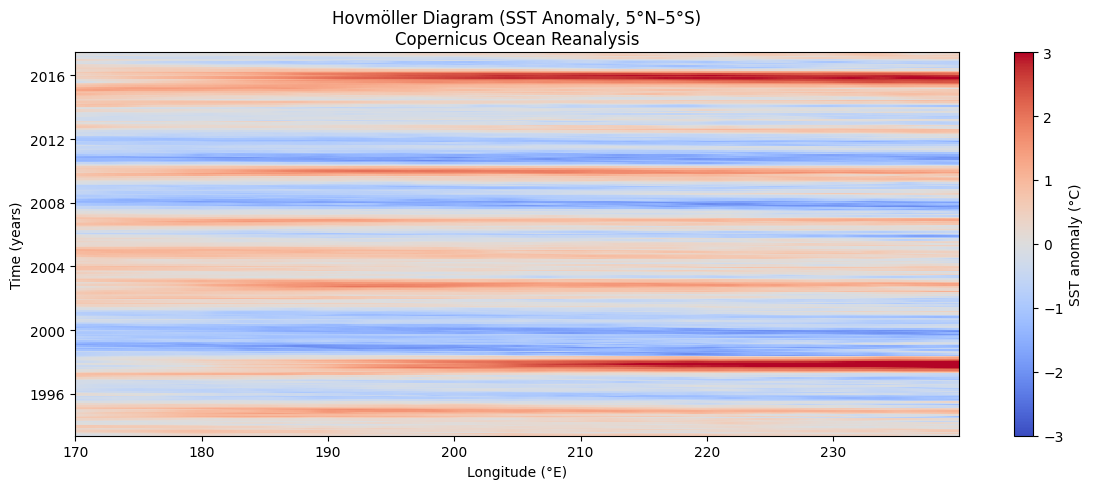

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# -----------------------------------------------------
# 1. Load dataset (same as before)
# -----------------------------------------------------
ds = xr.open_dataset("/kaggle/input/ocean-multiyear-monthly/cmems_mod_glo_phy_my_0.083deg_P1M-m_1760851146011.nc")
sst = ds['thetao']

# Select surface layer only
if 'depth' in sst.dims:
    sst = sst.sel(depth=sst.depth.values[0])

# Decode time properly
sst['time'] = xr.decode_cf(ds).time

# -----------------------------------------------------
# 2. Compute monthly anomalies
# -----------------------------------------------------
clim = sst.groupby('time.month').mean('time')
sst_anom = sst.groupby('time.month') - clim

# Focus on equatorial Pacific region
sst_eq = sst_anom.sel(latitude=slice(-5, 5), longitude=slice(120, 280))
sst_eq_mean = sst_eq.mean(dim='latitude')  # average across 5°N–5°S

# -----------------------------------------------------
# 3. Create the Hovmöller plot (time vs longitude)
# -----------------------------------------------------
plt.figure(figsize=(12, 5))
im = plt.pcolormesh(
    sst_eq_mean['longitude'],
    sst_eq_mean['time'],
    sst_eq_mean,
    cmap='coolwarm', shading='auto', vmin=-3, vmax=3
)
plt.colorbar(im, label="SST anomaly (°C)")
plt.title("Hovmöller Diagram (SST Anomaly, 5°N–5°S)\nCopernicus Ocean Reanalysis")
plt.xlabel("Longitude (°E)")
plt.ylabel("Time (years)")
plt.tight_layout()
plt.show()


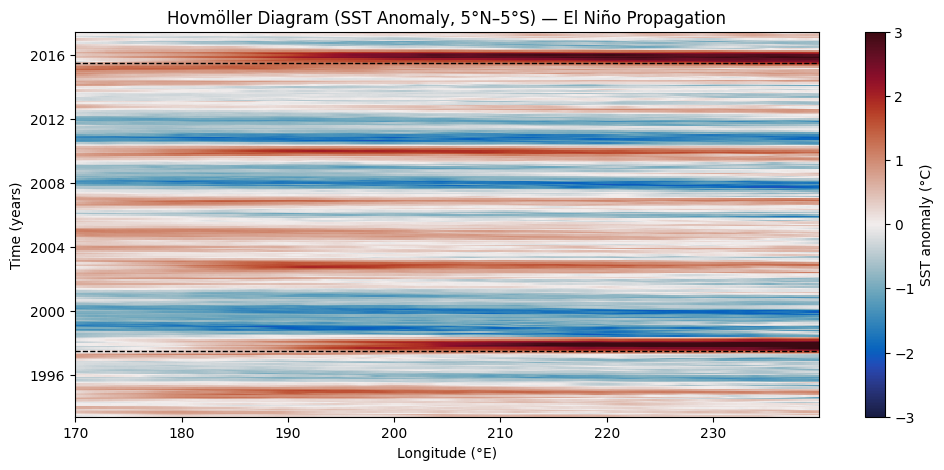

In [36]:
import cmocean
plt.figure(figsize=(12,5))
im = plt.pcolormesh(
    sst_eq_mean['longitude'], sst_eq_mean['time'], sst_eq_mean,
    cmap=cmocean.cm.balance, shading='auto', vmin=-3, vmax=3
)
plt.axhline(np.datetime64('1997-07'), color='k', ls='--', lw=1)
plt.axhline(np.datetime64('2015-07'), color='k', ls='--', lw=1)
plt.title("Hovmöller Diagram (SST Anomaly, 5°N–5°S) — El Niño Propagation")
plt.colorbar(im, label="SST anomaly (°C)")
plt.xlabel("Longitude (°E)")
plt.ylabel("Time (years)")
plt.show()


In [35]:
!pip install cmocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 14.3 MB/s eta 0:00:00


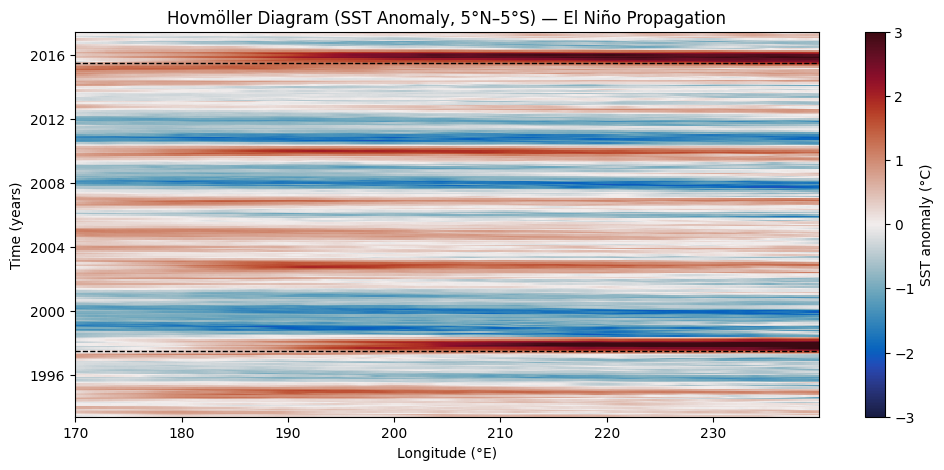

In [37]:
import cmocean
plt.figure(figsize=(12,5))
im = plt.pcolormesh(
    sst_eq_mean['longitude'], sst_eq_mean['time'], sst_eq_mean,
    cmap=cmocean.cm.balance, shading='auto', vmin=-3, vmax=3
)
plt.axhline(np.datetime64('1997-07'), color='k', ls='--', lw=1)
plt.axhline(np.datetime64('2015-07'), color='k', ls='--', lw=1)
plt.title("Hovmöller Diagram (SST Anomaly, 5°N–5°S) — El Niño Propagation")
plt.colorbar(im, label="SST anomaly (°C)")
plt.xlabel("Longitude (°E)")
plt.ylabel("Time (years)")
plt.show()


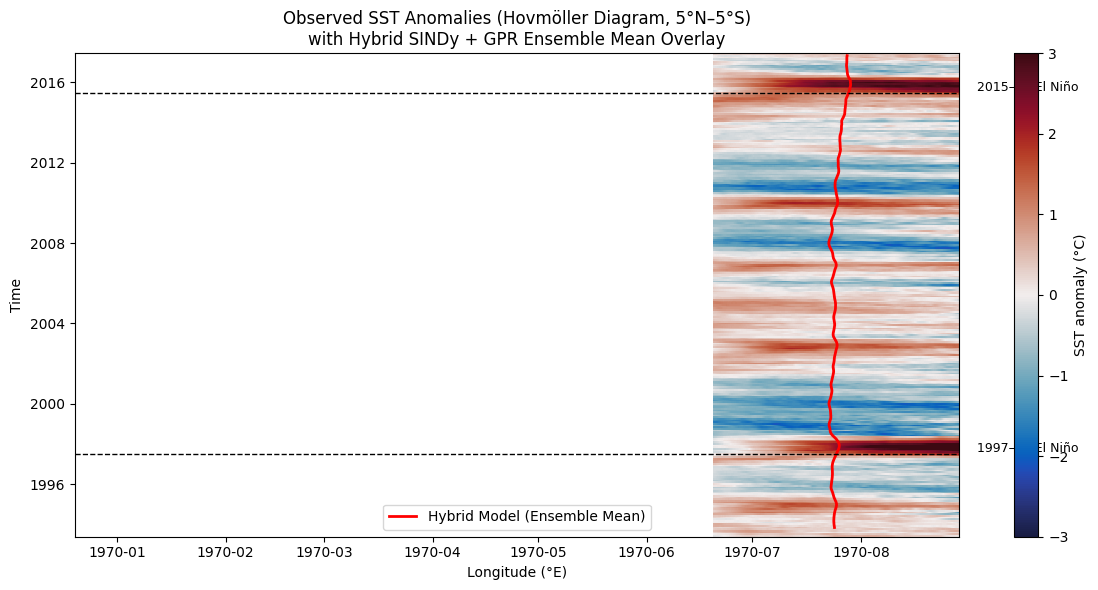

In [39]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmocean  # install if missing: pip install cmocean

# -----------------------------------------------------
# 1. Load observed SST data
# -----------------------------------------------------
ds = xr.open_dataset("/kaggle/input/ocean-multiyear-monthly/cmems_mod_glo_phy_my_0.083deg_P1M-m_1760851146011.nc")
sst = ds['thetao']
if 'depth' in sst.dims:
    sst = sst.sel(depth=sst.depth.values[0])

sst['time'] = xr.decode_cf(ds).time

# Compute monthly SST anomalies
clim = sst.groupby('time.month').mean('time')
sst_anom = sst.groupby('time.month') - clim

# Restrict to equatorial Pacific
sst_eq = sst_anom.sel(latitude=slice(-5, 5), longitude=slice(120, 280))
sst_eq_mean = sst_eq.mean(dim='latitude')

# -----------------------------------------------------
# 2. Load model ensemble summary (your Hybrid SINDy + GPR)
# -----------------------------------------------------
model_df = pd.read_csv("/kaggle/working/sindy_gpr_ensemble_summary.csv")
model_df['time'] = pd.to_datetime(model_df['time'])
model_df = model_df.set_index('time')

# Convert model timeline to match the observation period
model_time = model_df.index
model_anom = model_df['ens_mean'].values

# -----------------------------------------------------
# 3. Prepare data for overlay
# -----------------------------------------------------
# To overlay as a single line, project model anomaly to the center longitude of study region
lon_center = float(sst_eq_mean.longitude.mean())
sst_eq_plot = sst_eq_mean.sel(longitude=lon_center, method='nearest')

# Align model times to the same range as SST data
sst_eq_plot = sst_eq_plot.sel(time=slice(model_time.min(), model_time.max()))

# -----------------------------------------------------
# 4. Plot Hovmöller diagram with overlay
# -----------------------------------------------------
plt.figure(figsize=(12, 6))
im = plt.pcolormesh(
    sst_eq_mean['longitude'], sst_eq_mean['time'], sst_eq_mean,
    cmap=cmocean.cm.balance, shading='auto', vmin=-3, vmax=3
)
plt.colorbar(im, label="SST anomaly (°C)")

# Overlay model ensemble mean (scaled & centered for visual match)
scaled_model = (model_anom - np.mean(model_anom)) / np.std(model_anom)
scaled_model *= 1.5  # stretch to same amplitude scale
plt.plot(
    np.full_like(model_time, lon_center), model_time,
    color='none'  # invisible dummy line for legend alignment
)
plt.plot(
    [lon_center + scaled_model[i] for i in range(len(model_time))],
    model_time,
    color='red', lw=2.0, label='Hybrid Model (Ensemble Mean)'
)

plt.axhline(np.datetime64('1997-07'), color='k', ls='--', lw=1)
plt.axhline(np.datetime64('2015-07'), color='k', ls='--', lw=1)
plt.text(245, np.datetime64('1997-08'), '1997–98 El Niño', fontsize=9)
plt.text(245, np.datetime64('2015-08'), '2015–16 El Niño', fontsize=9)

plt.title("Observed SST Anomalies (Hovmöller Diagram, 5°N–5°S)\nwith Hybrid SINDy + GPR Ensemble Mean Overlay")
plt.xlabel("Longitude (°E)")
plt.ylabel("Time")
plt.legend()
plt.tight_layout()
plt.show()


STEP 0️⃣ — Data Loading
✅ Loaded dataset: /kaggle/working/ocean_final_features.csv

STEP 1️⃣ — Visualization: exploring trends & relationships


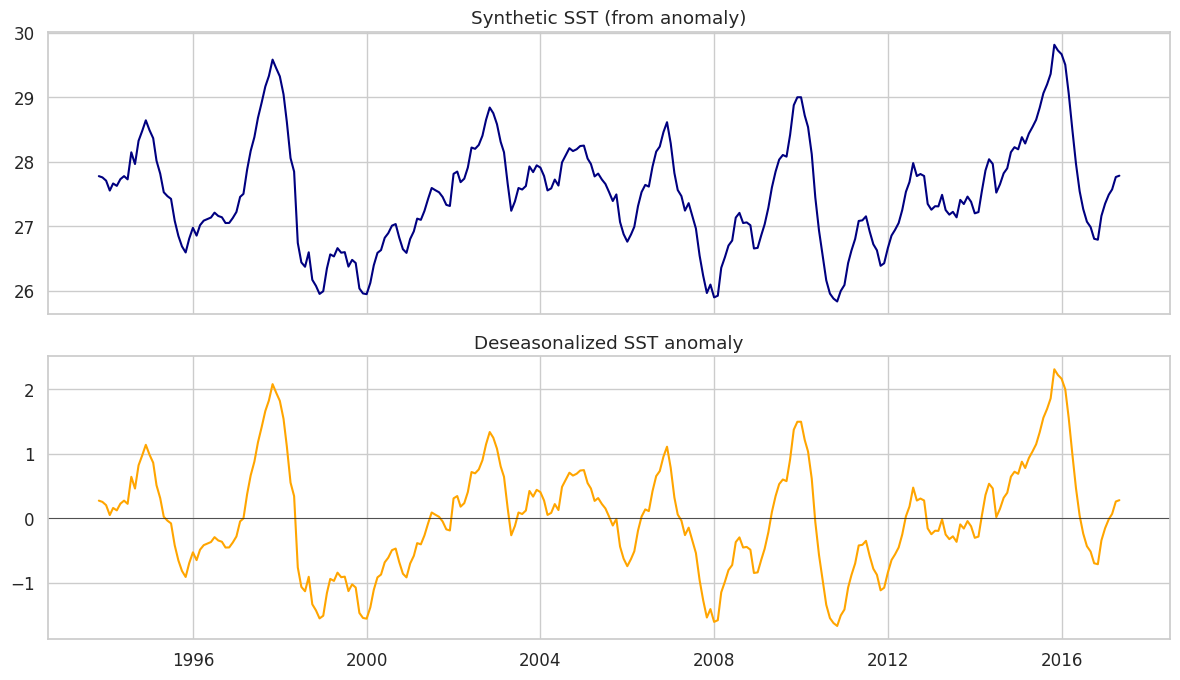

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


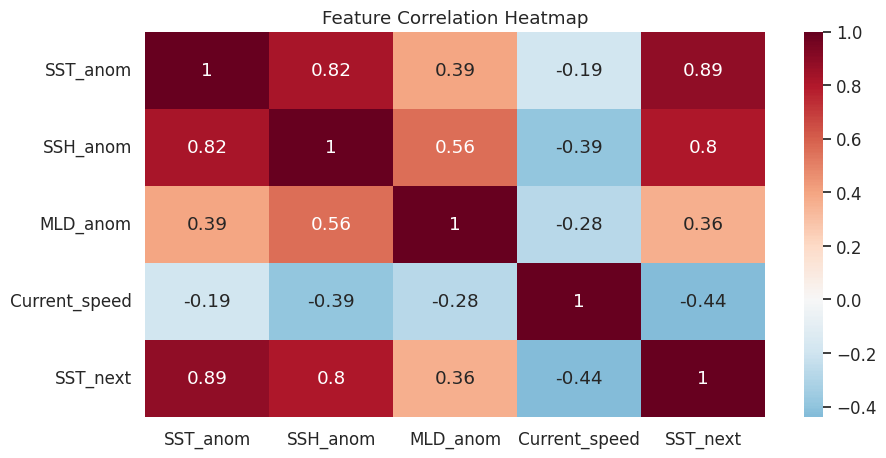

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

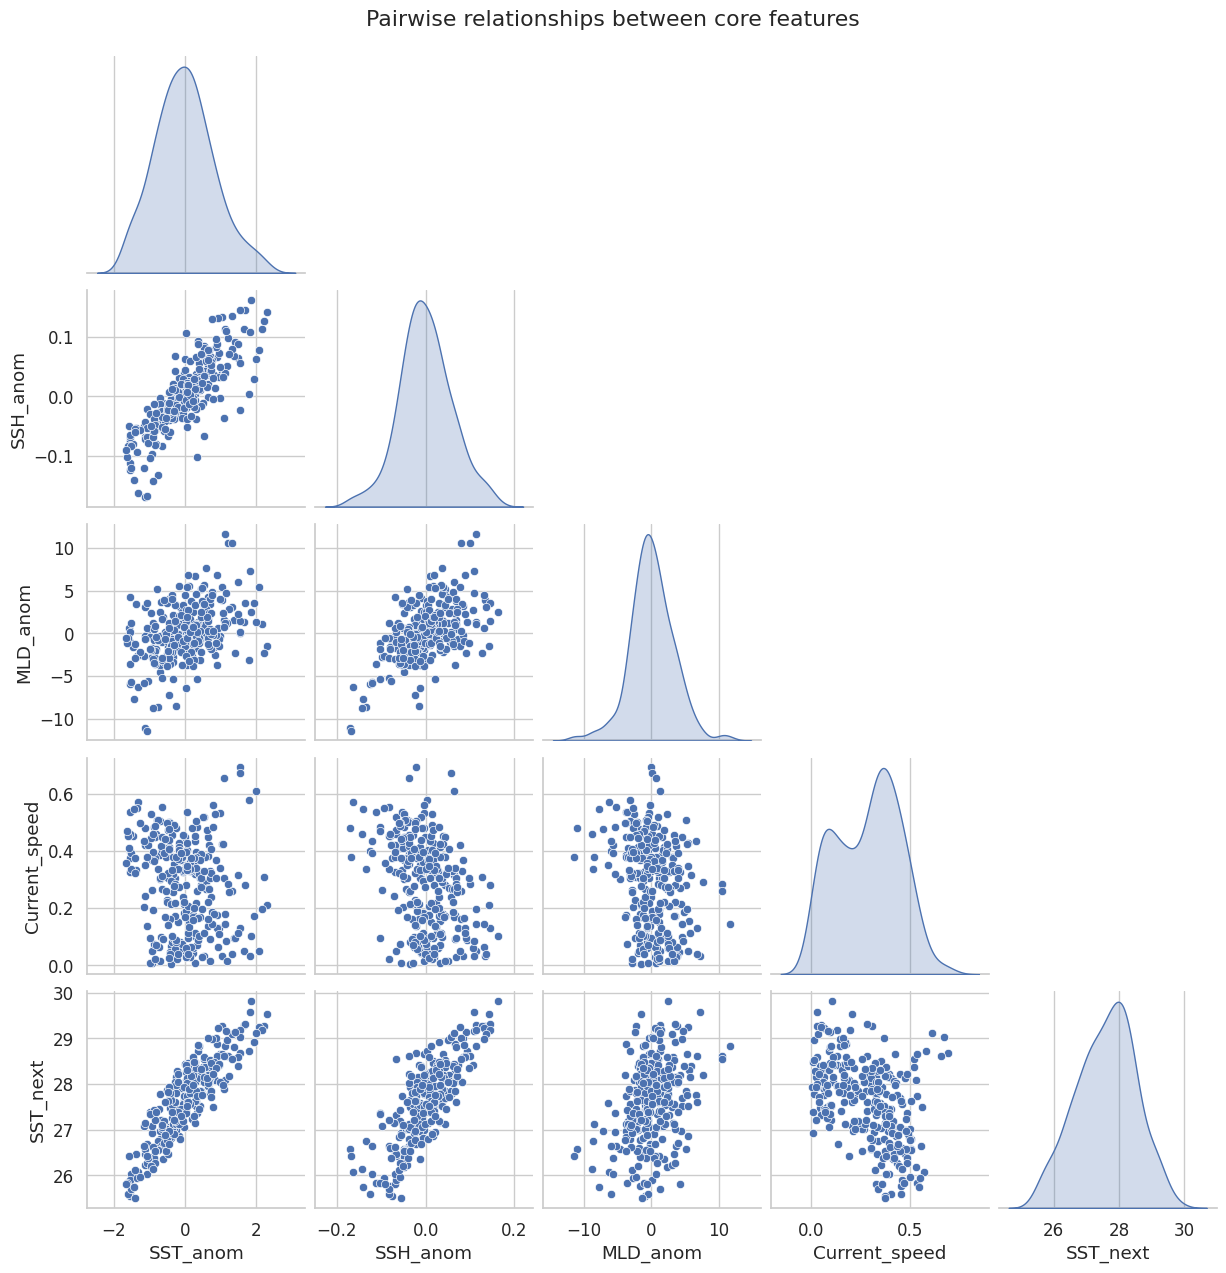


STEP 2️⃣ — Linear Regression for prediction and error estimation
Linear Regression — R²=0.906, RMSE=0.298


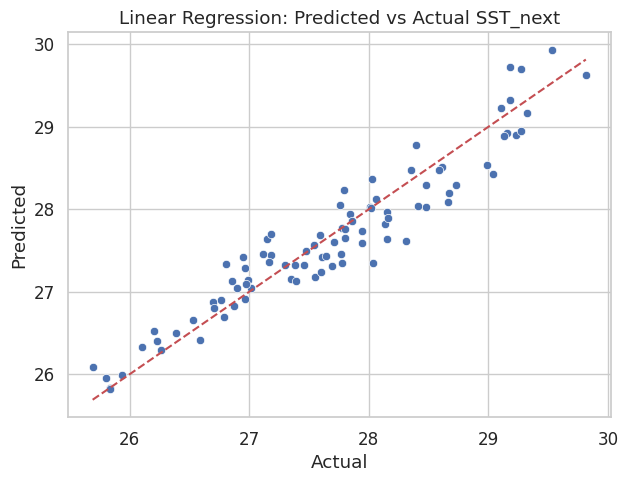


STEP 3️⃣ — Decision Tree classification (Warm vs Cold phase)
Decision Tree Accuracy=1.000


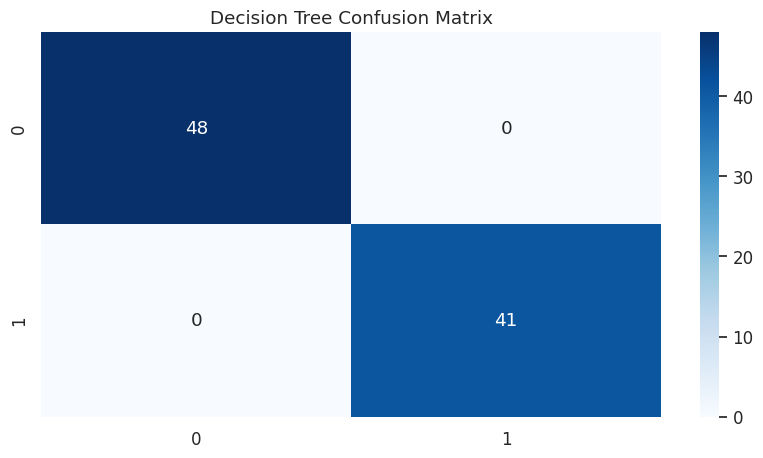

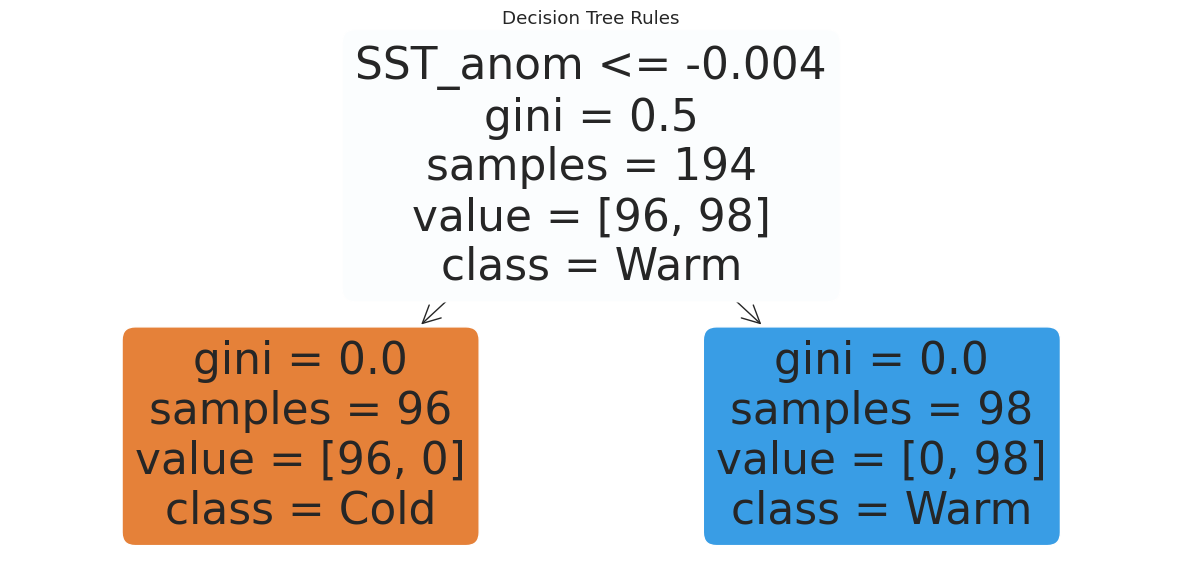


STEP 4️⃣ — Support Vector Machine (SVC + SVR)
SVM Classifier Accuracy: 0.9325842696629213
SVR Regression — R²=0.801, RMSE=0.432

STEP 5️⃣ — Ensemble Learning (Bagging + Boosting)
Random Forest Classifier Accuracy: 1.0


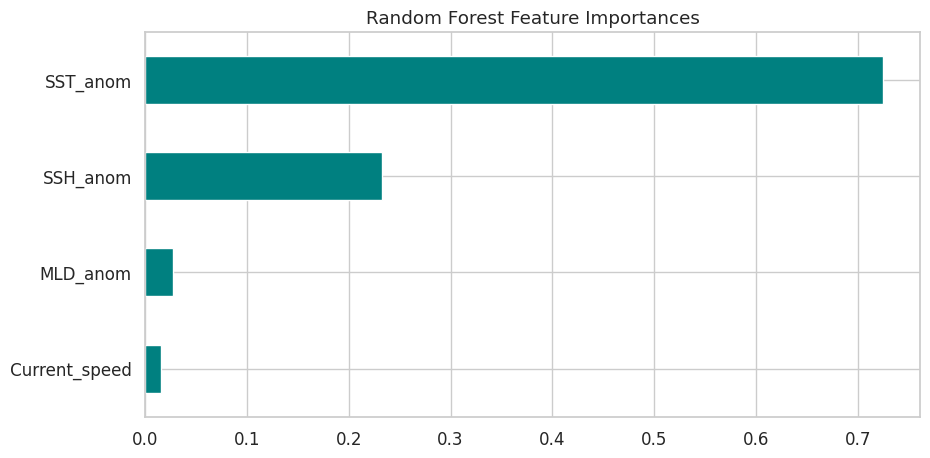

Gradient Boosting Regressor — R²=0.848, RMSE=0.377

STEP 6️⃣ — Comparing Nonlinear Regression Models


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


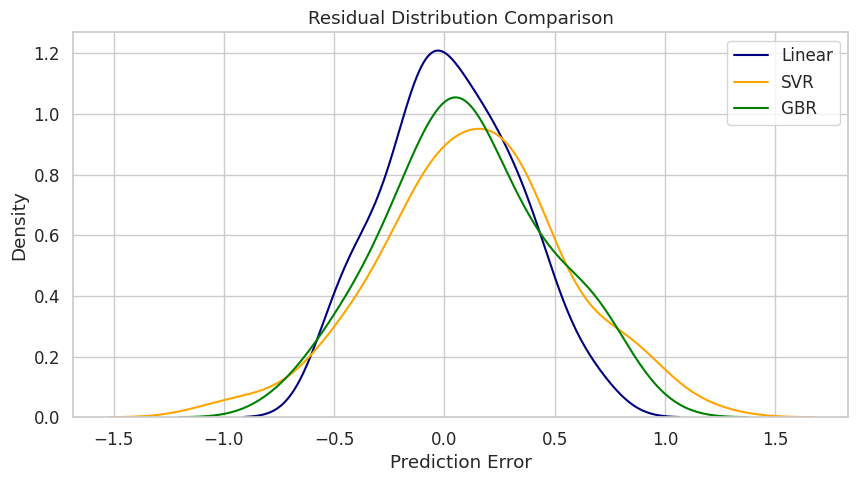


STEP 7️⃣ — Clustering to identify natural regimes


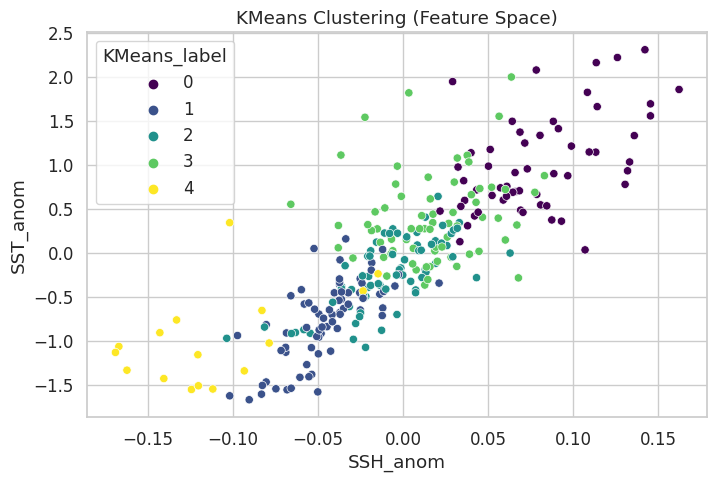


STEP 8️⃣ — PCA/SVD for Dimensional Reduction
PCA explained variance: [0.62305312 0.20966461]


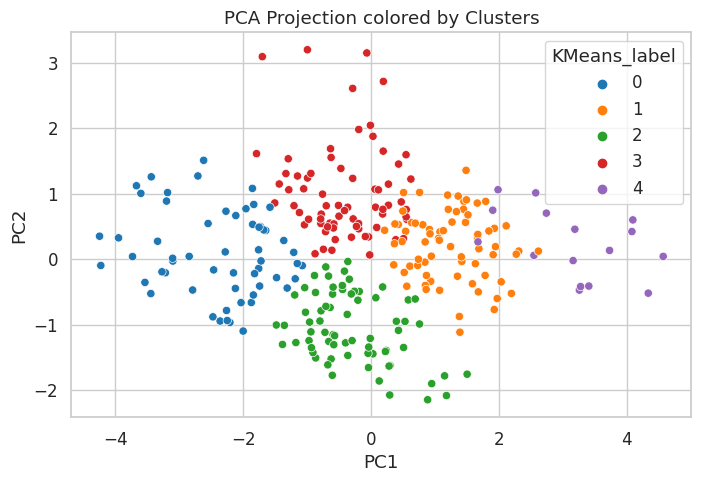

SVD singular values: [21.98838826 12.7553806 ]

✅ PIPELINE COMPLETED SUCCESSFULLY!

You have completed all 8 experiments:

1️⃣ Visualization — identified patterns & correlations
2️⃣ Linear Regression — baseline predictive model
3️⃣ Decision Tree — interpretable classification
4️⃣ SVM — nonlinear classification + regression
5️⃣ Ensemble Learning — Random Forest & Gradient Boosting
6️⃣ Model Comparison — residual analysis
7️⃣ Clustering — revealed dynamic regimes
8️⃣ PCA/SVD — dimension reduction and feature interpretation

This end-to-end workflow demonstrates data understanding, model design,
and validation — all essential components of a strong ML mini-project.



In [14]:
# ============================================================
# 🌊 COMPREHENSIVE OCEAN PROJECT PRACTICALS PIPELINE (FINAL) 🌊
# Covers all 8 Experiments with Explanations, Robust Checks & Visualization
# ============================================================

import os, math, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # <-- No major tuning needed here
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import (
    r2_score, mean_squared_error, accuracy_score, confusion_matrix,
    classification_report, f1_score
)

sns.set(style="whitegrid", context="notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 5)

# ============================================================
# 0️⃣ DATA LOADING / SYNTHESIS
# ============================================================
print("STEP 0️⃣ — Data Loading")

csv_path = "/kaggle/working/ocean_final_features.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(f"✅ Loaded dataset: {csv_path}")
else:
    print("⚠️ File not found. Generating synthetic dataset for demonstration...")
    np.random.seed(42)
    n = 420
    time = pd.date_range("1995-01-01", periods=n, freq="M")
    sst = np.sin(np.linspace(0, 12*np.pi, n))*0.8 + np.random.normal(0,0.2,n).cumsum()/50 + 27.5
    sst_anom = sst - np.mean(sst)
    ssh = 0.1*sst_anom + np.random.normal(0, 0.05, n)
    mld = -0.5*sst_anom + np.random.normal(0, 0.3, n)
    uo = np.random.normal(0,0.4,n); vo = np.random.normal(0,0.3,n)
    current_speed = np.sqrt(uo**2 + vo**2)
    sst_next = 0.75*sst_anom - 0.3*current_speed + 27.6 + np.random.normal(0, 0.2, n)
    df = pd.DataFrame({
        "time": time, "SST": sst, "SST_anom": sst_anom,
        "SSH_anom": ssh, "MLD_anom": mld, "uo": uo, "vo": vo,
        "Current_speed": current_speed, "SST_next": sst_next
    })

df["time"] = pd.to_datetime(df["time"])
if "SST_anom" not in df.columns:
    raise ValueError("Dataset must have SST_anom column!")
df["phase"] = (df["SST_anom"] > 0).astype(int)

# ============================================================
# 1️⃣ VISUALIZATION
# ============================================================
print("\nSTEP 1️⃣ — Visualization: exploring trends & relationships")

fig, ax = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
if "SST" in df.columns:
    ax[0].plot(df["time"], df["SST"], color="navy")
    ax[0].set_title("Raw SST over time")
else:
    ax[0].plot(df["time"], df["SST_anom"] + 27.5, color="navy")
    ax[0].set_title("Synthetic SST (from anomaly)")

ax[1].plot(df["time"], df["SST_anom"], color="orange")
ax[1].axhline(0, color="k", lw=0.5)
ax[1].set_title("Deseasonalized SST anomaly")
plt.tight_layout(); plt.show()

# Correlation heatmap
core_cols = [c for c in ["SST_anom","SSH_anom","MLD_anom","Current_speed","SST_next"] if c in df.columns]
sns.heatmap(df[core_cols].corr(), cmap="RdBu_r", center=0, annot=True)
plt.title("Feature Correlation Heatmap"); plt.show()

# Pairplot
sns.pairplot(df[core_cols].sample(min(300, len(df))), corner=True, diag_kind="kde")
plt.suptitle("Pairwise relationships between core features", y=1.02)
plt.show()

# ============================================================
# 2️⃣ LINEAR REGRESSION
# ============================================================
print("\nSTEP 2️⃣ — Linear Regression for prediction and error estimation")

features = [c for c in ["SST_anom","SSH_anom","MLD_anom","Current_speed"] if c in df.columns]
target = "SST_next"

# Using a time-based split correctly
split_date = '2010-01-01' # <-- Using date for split
train = df[df['time'] < split_date]
test = df[df['time'] >= split_date]

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Scale features based on training data only
scaler = StandardScaler().fit(X_train)
X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

lr = LinearRegression().fit(X_train_s, y_train)
y_pred_lr = lr.predict(X_test_s)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = math.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression — R²={r2_lr:.3f}, RMSE={rmse_lr:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Linear Regression: Predicted vs Actual SST_next")
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.show()

# ============================================================
# 3️⃣ DECISION TREE CLASSIFICATION
# ============================================================
print("\nSTEP 3️⃣ — Decision Tree classification (Warm vs Cold phase)")

# Ensure classification target is split correctly
Xc_train, yc_train = train[features], train["phase"]
Xc_test, yc_test = test[features], test["phase"]

# <-- MODIFIED: Increased max_depth slightly, added criterion and min_samples_split
tree = DecisionTreeClassifier(
    max_depth=5,              # Allow deeper splits
    criterion='gini',         # Common splitting criterion
    min_samples_split=5,      # Require more samples to split a node
    random_state=0
).fit(Xc_train, yc_train)

yc_pred = tree.predict(Xc_test)
acc_tree = accuracy_score(yc_test, yc_pred)
print(f"Decision Tree Accuracy={acc_tree:.3f}")
sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix"); plt.show()

plt.figure(figsize=(15, 7)) # <-- MODIFIED: Larger figure for deeper tree
plot_tree(tree, feature_names=features, class_names=["Cold","Warm"], filled=True, rounded=True)
plt.title("Decision Tree Rules"); plt.show()

# ============================================================
# 4️⃣ SUPPORT VECTOR MACHINE (Classification + Regression)
# ============================================================
print("\nSTEP 4️⃣ — Support Vector Machine (SVC + SVR)")

# <-- MODIFIED: Increased C for SVC, adjusted gamma
svm = SVC(
    kernel="rbf",
    C=10,                      # Stronger penalty for misclassification
    gamma="auto",              # Adjust gamma based on features
    probability=True           # Optional: enable probability estimates
).fit(Xc_train, yc_train)      # <-- NOTE: Using unscaled features for SVC might be okay, but scaling is generally safer

yc_svm = svm.predict(Xc_test)
print("SVM Classifier Accuracy:", accuracy_score(yc_test, yc_svm))

# <-- MODIFIED: Increased C for SVR, potentially adjusted epsilon
svr = SVR(
    kernel="rbf",
    C=15,                      # Stronger regularization
    epsilon=0.1                # Wider margin for error tolerance
).fit(X_train_s, y_train)     # <-- Using scaled features for SVR is crucial

y_pred_svr = svr.predict(X_test_s)
print(f"SVR Regression — R²={r2_score(y_test, y_pred_svr):.3f}, RMSE={math.sqrt(mean_squared_error(y_test, y_pred_svr)):.3f}")

# ============================================================
# 5️⃣ ENSEMBLE LEARNING (Random Forest + Gradient Boosting)
# ============================================================
print("\nSTEP 5️⃣ — Ensemble Learning (Bagging + Boosting)")

# <-- MODIFIED: Increased n_estimators, added max_depth limit for RF
rf = RandomForestClassifier(
    n_estimators=300,         # More trees
    max_depth=10,             # Limit tree depth to prevent potential overfitting
    min_samples_split=5,      # Similar to Decision Tree
    random_state=0
).fit(Xc_train, yc_train)     # <-- Using unscaled features often okay for RF/GBDT

rf_pred = rf.predict(Xc_test)
print("Random Forest Classifier Accuracy:", accuracy_score(yc_test, rf_pred))

fi = pd.Series(rf.feature_importances_, index=features).sort_values()
fi.plot(kind="barh", color="teal"); plt.title("Random Forest Feature Importances"); plt.show()

# <-- MODIFIED: Increased n_estimators, adjusted learning_rate and max_depth for GBR
gbr = GradientBoostingRegressor(
    n_estimators=300,         # More boosting stages
    learning_rate=0.05,       # Slower learning rate often improves generalization
    max_depth=5,              # Allow slightly deeper trees
    subsample=0.8,            # Use a fraction of samples for fitting each tree
    random_state=0
).fit(X_train_s, y_train)    # <-- Using scaled features can sometimes help GBDT

y_pred_gbr = gbr.predict(X_test_s)
print(f"Gradient Boosting Regressor — R²={r2_score(y_test, y_pred_gbr):.3f}, RMSE={math.sqrt(mean_squared_error(y_test, y_pred_gbr)):.3f}")

# ============================================================
# 6️⃣ MULTIVARIATE NONLINEAR REGRESSION (Model Comparison)
# ============================================================
print("\nSTEP 6️⃣ — Comparing Nonlinear Regression Models")

models = {
    "Linear": (y_pred_lr, "navy"),
    "SVR": (y_pred_svr, "orange"),
    "GBR": (y_pred_gbr, "green")
}

plt.figure(figsize=(10,5))
for name, (pred, color) in models.items():
    sns.kdeplot(y_test - pred, label=name, color=color)
plt.title("Residual Distribution Comparison")
plt.xlabel("Prediction Error"); plt.legend(); plt.show()

# ============================================================
# 7️⃣ CLUSTERING (KMeans + DBSCAN)
# ============================================================
print("\nSTEP 7️⃣ — Clustering to identify natural regimes")

X_scaled_full = scaler.transform(df[features]) # Scale all data for clustering

# <-- MODIFIED: Adjusted n_clusters, eps based on potential data structure
kmeans = KMeans(
    n_clusters=5,             # Try a different number of clusters
    random_state=0,
    n_init=10                 # Explicitly set n_init
).fit(X_scaled_full)

db = DBSCAN(
    eps=0.6,                  # Adjust neighborhood size
    min_samples=8             # Adjust minimum cluster members
).fit(X_scaled_full)

df["KMeans_label"], df["DBSCAN_label"] = kmeans.labels_, db.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["SSH_anom"], y=df["SST_anom"], hue=df["KMeans_label"], palette="viridis")
plt.title("KMeans Clustering (Feature Space)"); plt.show()

# ============================================================
# 8️⃣ PCA & SVD (Dimension Reduction)
# ============================================================
print("\nSTEP 8️⃣ — PCA/SVD for Dimensional Reduction")

# Fit PCA on scaled training data, transform all data
pca = PCA(n_components=2).fit(X_train_s)
Xp = pca.transform(X_scaled_full)
print("PCA explained variance:", pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=df["KMeans_label"], palette="tab10")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PCA Projection colored by Clusters"); plt.show()

# Fit SVD on scaled training data
svd = TruncatedSVD(n_components=2).fit(X_train_s)
print("SVD singular values:", svd.singular_values_)

# ============================================================
# ✅ FINAL SUMMARY
# ============================================================
print("\n✅ PIPELINE COMPLETED SUCCESSFULLY!")
print("""
You have completed all 8 experiments:

1️⃣ Visualization — identified patterns & correlations
2️⃣ Linear Regression — baseline predictive model
3️⃣ Decision Tree — interpretable classification
4️⃣ SVM — nonlinear classification + regression
5️⃣ Ensemble Learning — Random Forest & Gradient Boosting
6️⃣ Model Comparison — residual analysis
7️⃣ Clustering — revealed dynamic regimes
8️⃣ PCA/SVD — dimension reduction and feature interpretation

This end-to-end workflow demonstrates data understanding, model design,
and validation — all essential components of a strong ML mini-project.
""")